# **AVANCE 1** 

#### Carga y transformación de los datos

In [1]:
! pip freeze > requirements.txt  # creamos un archivo llamado requirements.txt que contiene una lista de todos los paquetes de Python instalados y sus versiones.

In [2]:
#carga de librerias que son necesarias a continuacion:
import pandas as pd                    #para análisis de datos que proporciona estructuras de datos y herramientas para manejar datos en forma de tablas (df) y series temporales.
import numpy as np                     # para el cálculo numérico en Python. 
import matplotlib.pyplot as plt        # interfaz de trazado de gráficos en 2D basada en la biblioteca matplotlib.
import seaborn as sns                  # visualización de datos
import os                              # para interactuar con el sistema operativo.
import matplotlib.image as mpimg       # para leer y mostrar imagenes

## Expansión Estratégica de Biogenesys con Python

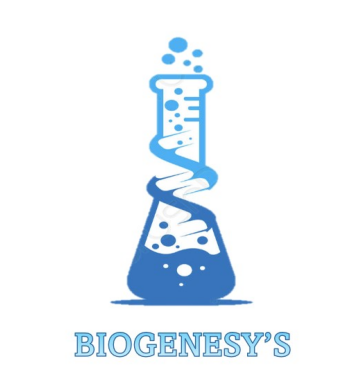

In [3]:
# Cargar la imagen del laboratorio 
img = mpimg.imread('LogoBiogenesys.jpeg')
plt.imshow(img)  # Mostrar la imagen
plt.axis('off')  # Opcional, para ocultar los ejes
plt.show()

In [4]:
#CARGAMOS ARCHIVO CSV:
file_path = "data_latinoamerica.csv"
data = pd.read_csv(file_path)              #CARGAR ARCHIVO CSV:

In [6]:
data.head()        # Mostrar las primeras filas del DataFrame

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [7]:
np.shape(data)     # muestra la forma del DataFrame filas,columnas

(12216057, 50)

In [8]:
# seleccionamos los paises con los que vamos a trabajar
paises_seleccionados=['Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil', 'Colombia' ]

## Filtramos el DF para incluir solo las filas cuyo valor en la columna 'country_name' esté en la lista de países seleccionados:
data_latinoamerica=data[data['country_name'].isin(paises_seleccionados)]

In [9]:
np.shape(data_latinoamerica)  #forma del DataFrame, número de filas y columnas que contiene.

(11970289, 50)

In [10]:
#identificamos las columnas en el DataFrame data_latinoamerica que tienen más de 4,000,000 valores nulos:
data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum()>4000000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


In [11]:
# filtramos de la columna location key solo quedarme con las nombradas[AR, CL, CO, MX, PE, BR]. 
data_latinoamerica_paises=data_latinoamerica[data_latinoamerica['location_key'].isin(['AR', 'CL', 'CO','MX','PE','BR'])]

In [12]:
#Filtramos los datos en fechas mayores a 2021-01-01 

data_latinoamerica_paises_Fecha=data_latinoamerica_paises[data_latinoamerica_paises['date']> '2021-01-01']

In [13]:
# Contamos valores nulos y los imprimimos

valores_nulos_fecha=data_latinoamerica_paises_Fecha.isnull().sum()[data_latinoamerica_paises_Fecha.isnull().sum()>0]
print(valores_nulos_fecha)
print(np.shape(data_latinoamerica_paises_Fecha))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


In [14]:
# Usar un bucle para completar los valores nulos de cada columna con el valor de esa columna PROMEDIO  por C/ país
for pais in paises_seleccionados:
    data_latinoamerica_paises_Fecha['new_confirmed'] = data_latinoamerica_paises_Fecha['new_confirmed'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['new_confirmed'].mean())
    data_latinoamerica_paises_Fecha['new_deceased'] = data_latinoamerica_paises_Fecha['new_deceased'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['new_deceased'].mean())
    data_latinoamerica_paises_Fecha['cumulative_confirmed'] = data_latinoamerica_paises_Fecha['cumulative_confirmed'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['cumulative_confirmed'].mean())
    data_latinoamerica_paises_Fecha['cumulative_deceased'] = data_latinoamerica_paises_Fecha['cumulative_deceased'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['cumulative_deceased'].mean())
    data_latinoamerica_paises_Fecha['cumulative_vaccine_doses_administered'] = data_latinoamerica_paises_Fecha['cumulative_vaccine_doses_administered'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['cumulative_vaccine_doses_administered'].mean())
    data_latinoamerica_paises_Fecha['average_temperature_celsius'] = data_latinoamerica_paises_Fecha['average_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['average_temperature_celsius'].mean())
    data_latinoamerica_paises_Fecha['minimum_temperature_celsius'] = data_latinoamerica_paises_Fecha['minimum_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['minimum_temperature_celsius'].mean())   
    data_latinoamerica_paises_Fecha['maximum_temperature_celsius'] = data_latinoamerica_paises_Fecha['maximum_temperature_celsius'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['maximum_temperature_celsius'].mean())    
    data_latinoamerica_paises_Fecha['rainfall_mm'] = data_latinoamerica_paises_Fecha['rainfall_mm'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['rainfall_mm'].mean())
    data_latinoamerica_paises_Fecha['relative_humidity'] = data_latinoamerica_paises_Fecha['relative_humidity'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['relative_humidity'].mean())
    # data_latinoamerica_paises_Fecha['new_recovered'] = data_latinoamerica_paises_Fecha['new_recovered'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['new_recovered'].mean())
    # data_latinoamerica_paises_Fecha['cumulative_recovered'] = data_latinoamerica_paises_Fecha['cumulative_recovered'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['cumulative_recovered'].mean())

# Llenar NaN con el valor de 0 en la columna new_recovered, cumulative_recovered, cumulative_vaccine_doses_administered para hacer análisis de estos datos.
data_latinoamerica_paises_Fecha['new_recovered'] = data_latinoamerica_paises_Fecha['new_recovered'].fillna(0)
data_latinoamerica_paises_Fecha['cumulative_recovered'] = data_latinoamerica_paises_Fecha['cumulative_recovered'].fillna(0)
data_latinoamerica_paises_Fecha['cumulative_vaccine_doses_administered'] = data_latinoamerica_paises_Fecha['cumulative_vaccine_doses_administered'].fillna(0)

C:\Users\KIM\AppData\Local\Temp\ipykernel_16640\955749514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_Fecha['new_confirmed'] = data_latinoamerica_paises_Fecha['new_confirmed'].fillna(data_latinoamerica_paises_Fecha[data_latinoamerica_paises_Fecha['country_name']==pais]['new_confirmed'].mean())
C:\Users\KIM\AppData\Local\Temp\ipykernel_16640\955749514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_Fecha['new_deceased'] = data_latinoamerica_pais

In [15]:
#guardamos los datos "DatosFinalesFiltrado.csv": Es el nombre del archivo CSV que se va a crear
# index = False: indica que no se debe incluir el índice del DataFrame 
data_latinoamerica_paises_Fecha.to_csv("DatosFinalesFiltrado.csv", index=False)  

PermissionError: [Errno 13] Permission denied: 'DatosFinalesFiltrado.csv'

In [ ]:
# Se exporta el DataFrame modificado a un archivo CSV separado por ','
data_latinoamerica_paises = pd.read_csv("DatosFinalesFiltrado.csv", sep=',')

# **AVANCE 2**

## Análisis Exploratorio – Visualización
Profundizamos en el análisis exploratorio de datos para extraer insights valiosos que nos orienten en la planificación estratégica de la expansión de laboratorios farmacéuticos.

In [ ]:
# .describe() NOS MUESTRA EL CONTEO y DESCRIPCION DE NUESTROS DATOS 
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('-------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
-------------------
date
count           3744
unique           624
top       2022-09-01
freq               6
Name: date, dtype: object
-------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
-------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
-------------------
new_confirmed
count      3744.000000
mean      13930.531008
std       24205.550042
min        -573.000000
25%        1536.750000
50%        5227.000000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
-------------------
new_deceased
count     3744.000000
mean       276.363237
std        507.133193
min          0.000000
25%         26.000000
50%        101.000000
75%        311.000000
max      11447.000000
Name: new_deceased, d

In [ ]:
paises_seleccionados=['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil']

##### Ponemos como indice la columna "Date" para poder hacer analisis a lo largo del tiempo 

In [ ]:

# Convertir 'date' a tipo datetime
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])

# Establecer 'date' como el índice usando .set_index
data_latinoamerica_paises.set_index('date', inplace=True)   #inplace = True nos asegura que la operación se realice directamente en el DataFrame existente


##### Crear matriz de correlacion/ HEATMAP para ver si existe alguna relacion entre las variables para un analisis posterior

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

<function matplotlib.pyplot.show(close=None, block=None)>

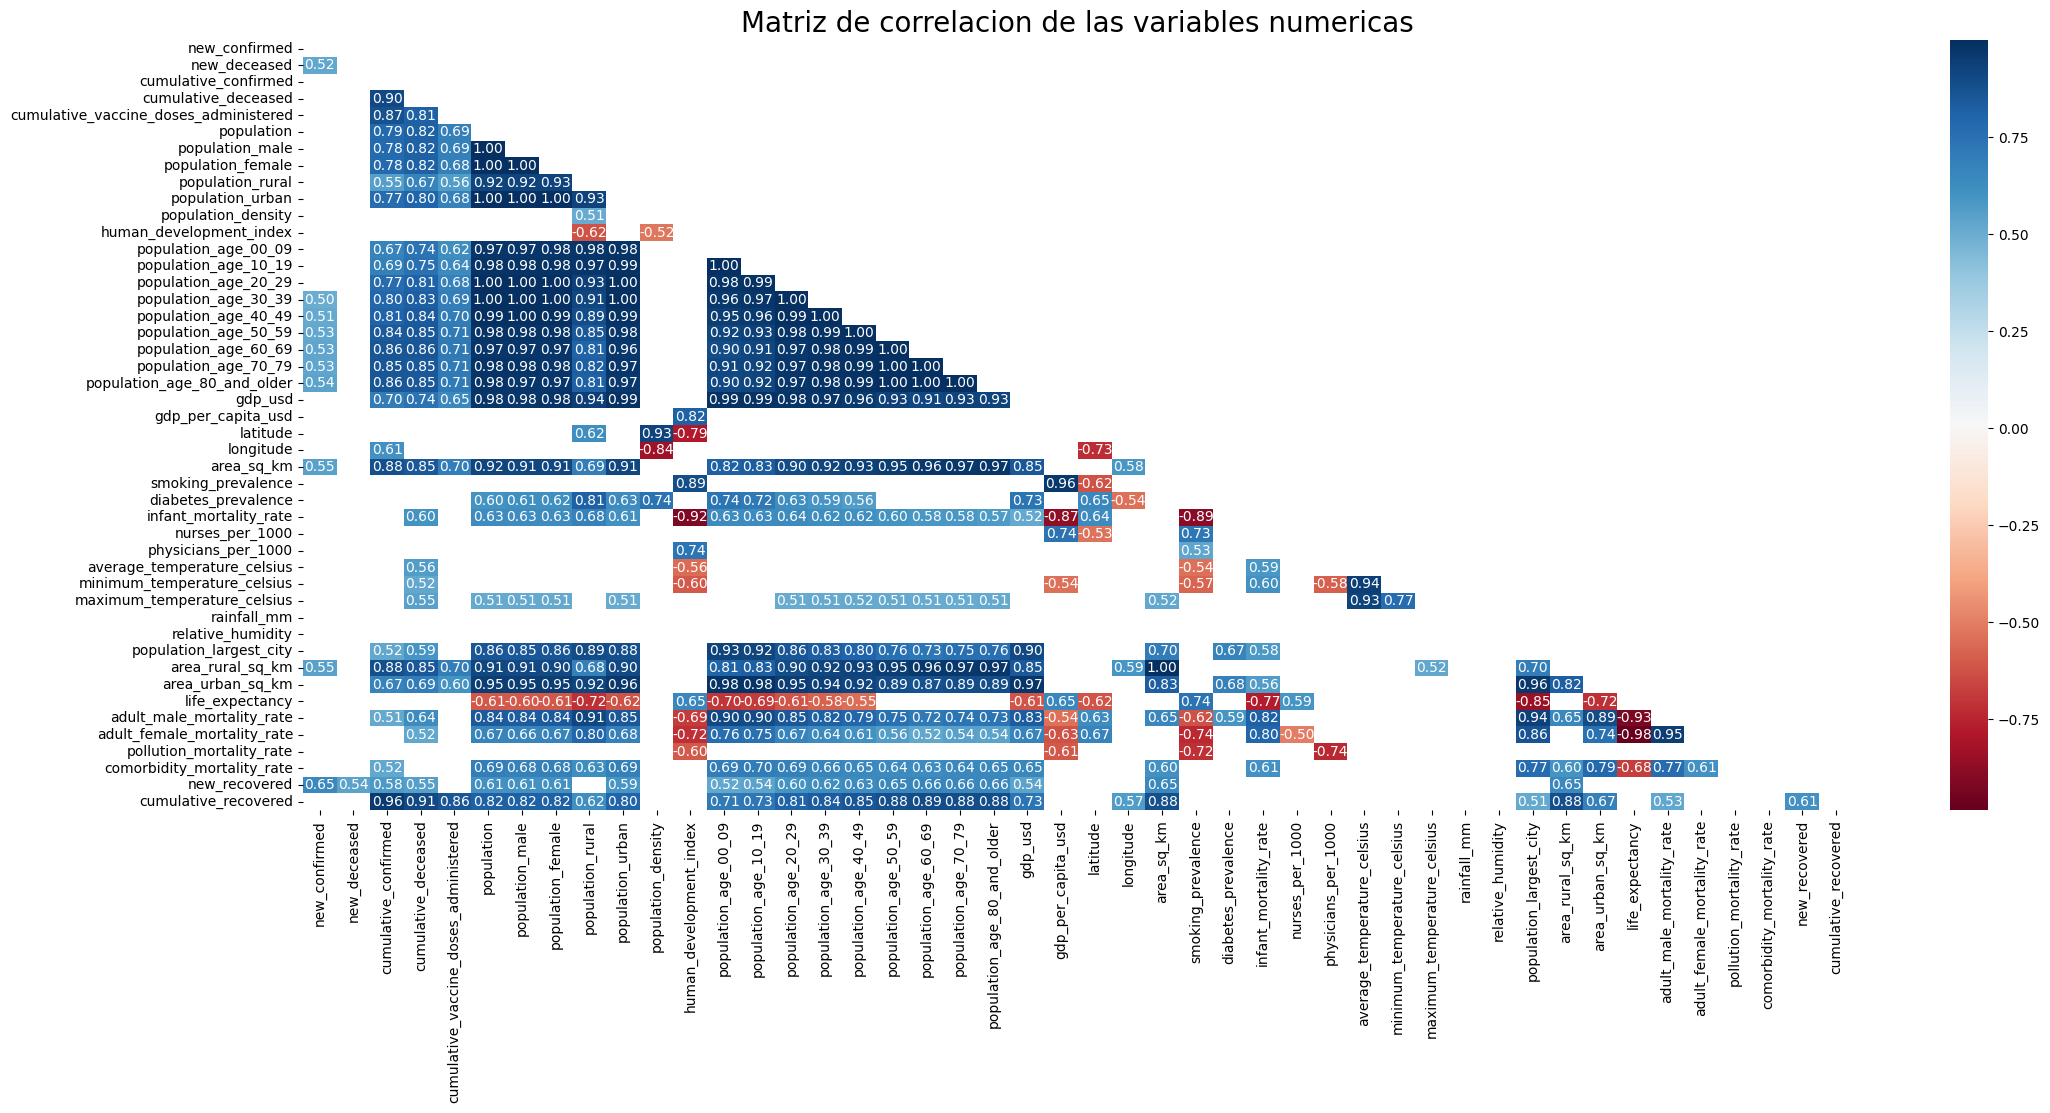

In [ ]:
#se crea matriz de correlacion de las variables numericas 
numeric_columns = data_latinoamerica_paises.select_dtypes(include=['float64', 'int64']).columns    #filtramos variables numericas con select_dtypes() : float y enteros en este caso 
correlation_matrix = data_latinoamerica_paises[numeric_columns].corr()          #seleccionamos solo las columnas numericas del df

#aqui se crea una mascara para el triangulo superior, Q NO SE MUESTRE
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

#mostramos valores sup a 0.5 es decir que hay una correlacion fuerte, sin embargo tb se puede mostrar valores negativos
correlation_matrix=correlation_matrix[abs(correlation_matrix) > abs(0.5) ]

#se crea la grafica 
plt.figure(figsize=(25,10))
heatmap = sns.heatmap(     #función de Seaborn se utiliza para crear el mapa de calor.
    correlation_matrix, 
    mask=mask,              #ocultar parte sup del heatmap
    annot=True,               #Añade los valores de correlación dentro de las celdas del mapa de calor.
    cmap='RdBu',            #paleta de colores
    fmt=".2f")                  # 2 decimales

plt.title('Matriz de correlacion de las variables numericas', fontsize=20)
plt.show

En el grafico anterior se presentan las variables con > correlacion, para poder indentificarlas ma rapido se definio un umbral cuyo valor sea >0.5  y se graficaron en un heatmap. 
Procederemos a realizar una revision grafica de la mayoria de las columnas para ver como se comprotan los datos, para la primer aproximacion usaremos barplots usando un ciclo for y la libreria seaborn. 

Rojo oscuro: correlacion positiva entre 2 variables (es decir q si una aumenta la otra tb)
Azul: correlacion negativa (si una variable aumenta la otra tiende a disminuir)
Blanco: baja o nula

In [ ]:
blue_palette = ["#0000FF", "#000099", "#000066", "#000033", "#000000"]

El siguiente codigo crea gráficos de barras para todas las columnas numéricas en el DataFrame data_latinoamerica_paises excepto aquellas que están en la lista de exclusión. 
Cada gráfico muestra los valores de una columna específica X país, utilizando una paleta de colores verde.

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


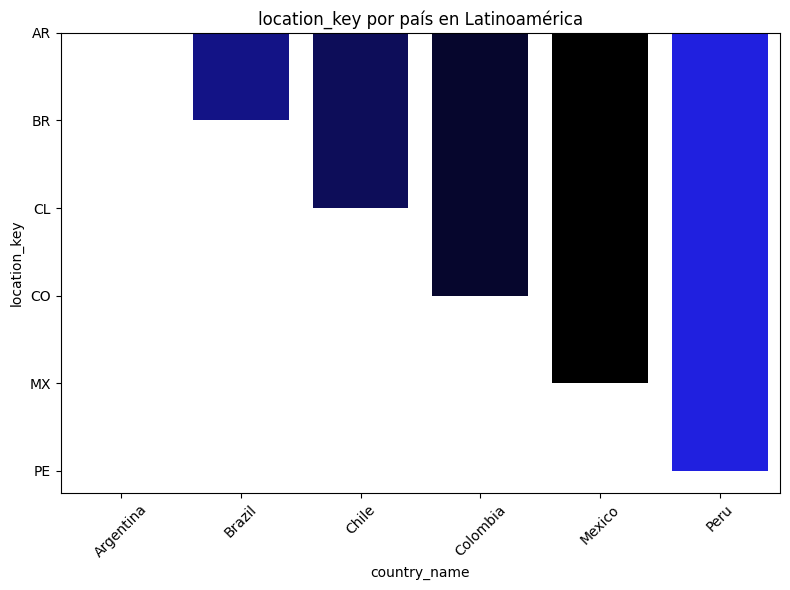

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


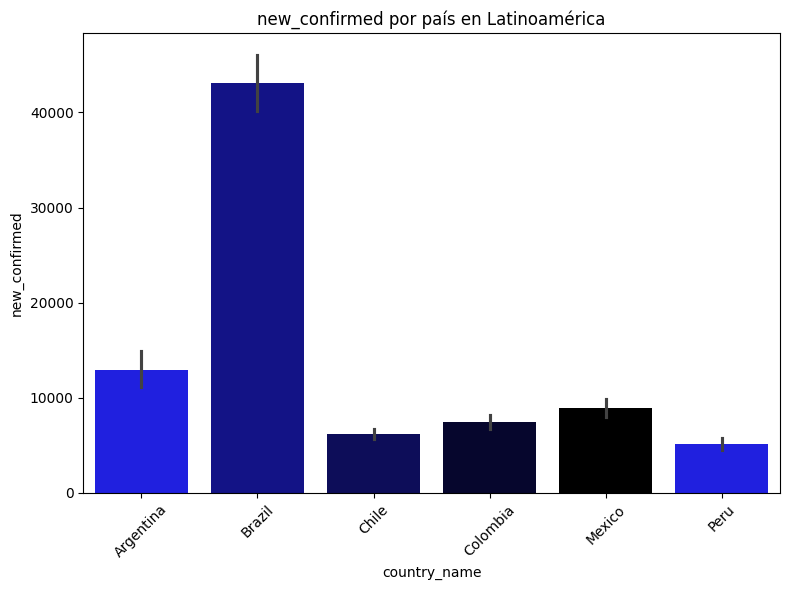

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


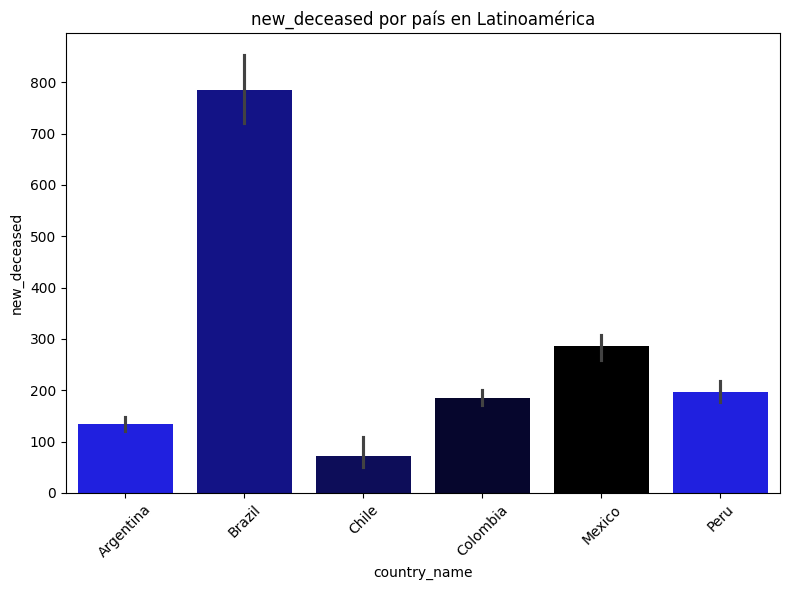

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


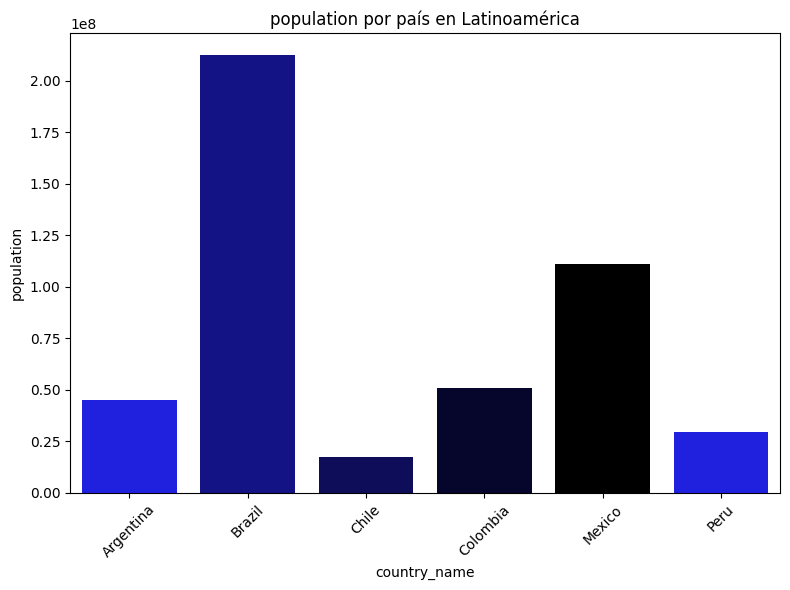

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


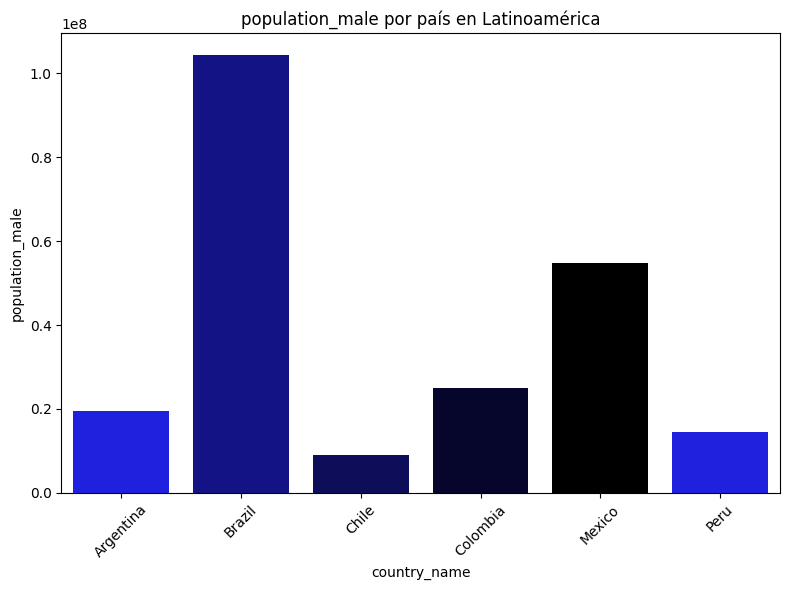

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


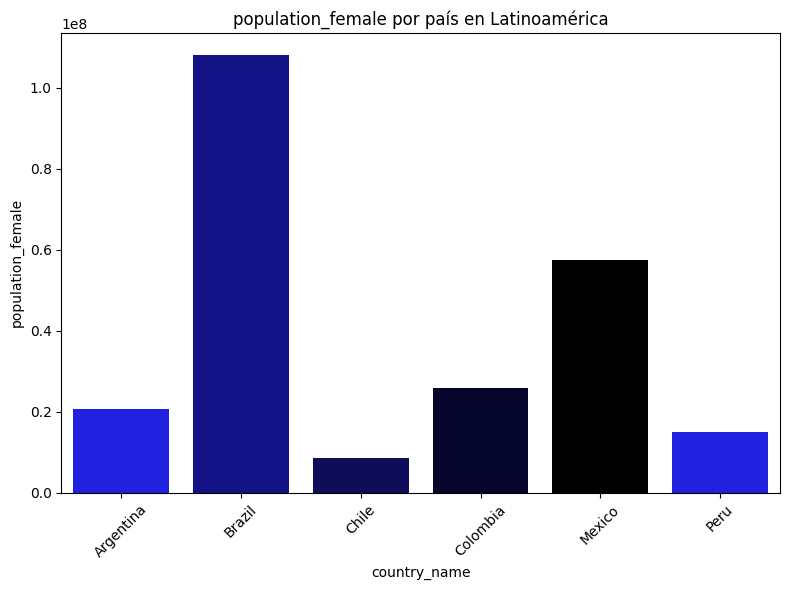

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


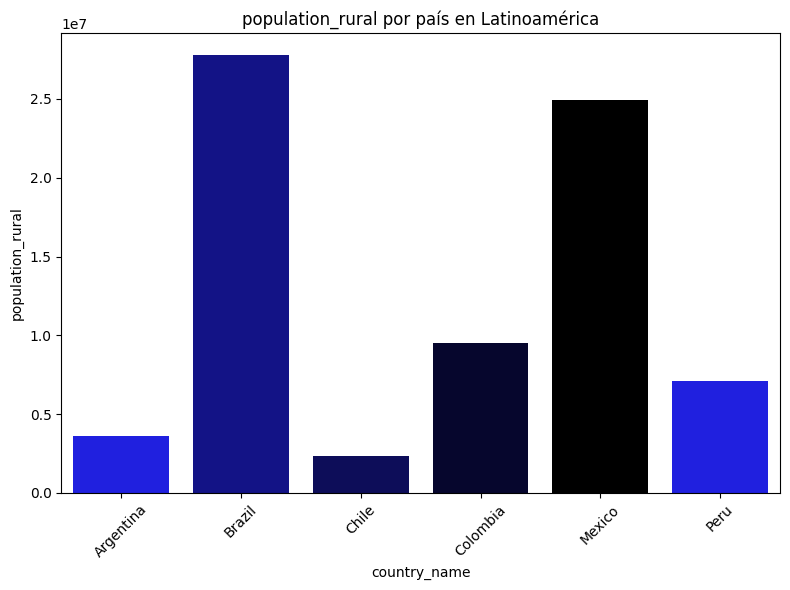

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


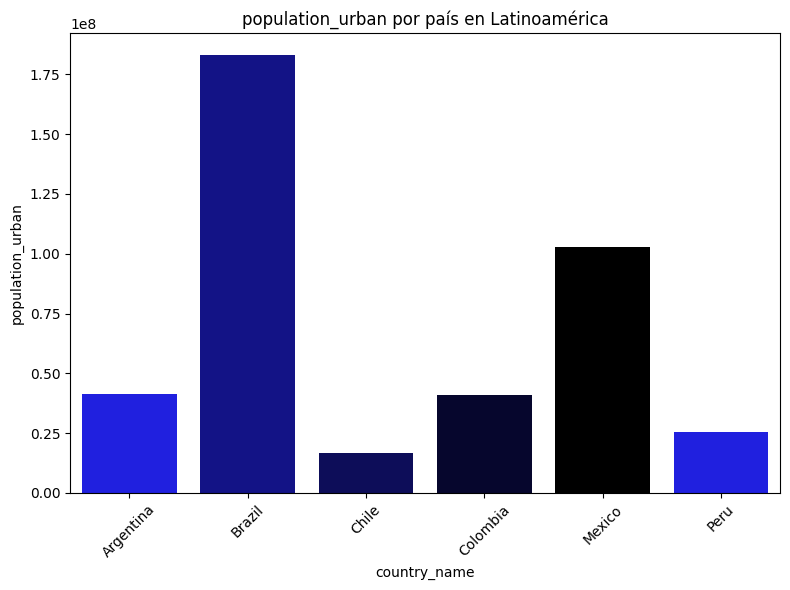

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


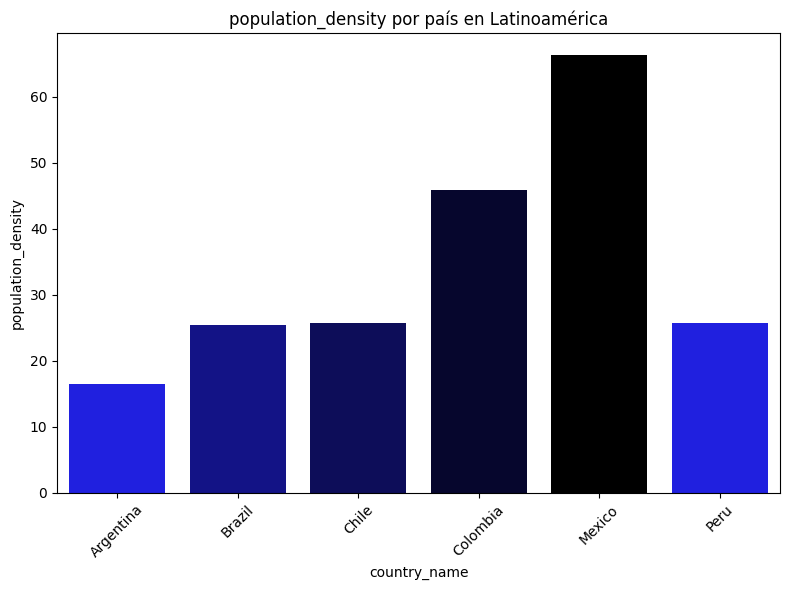

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


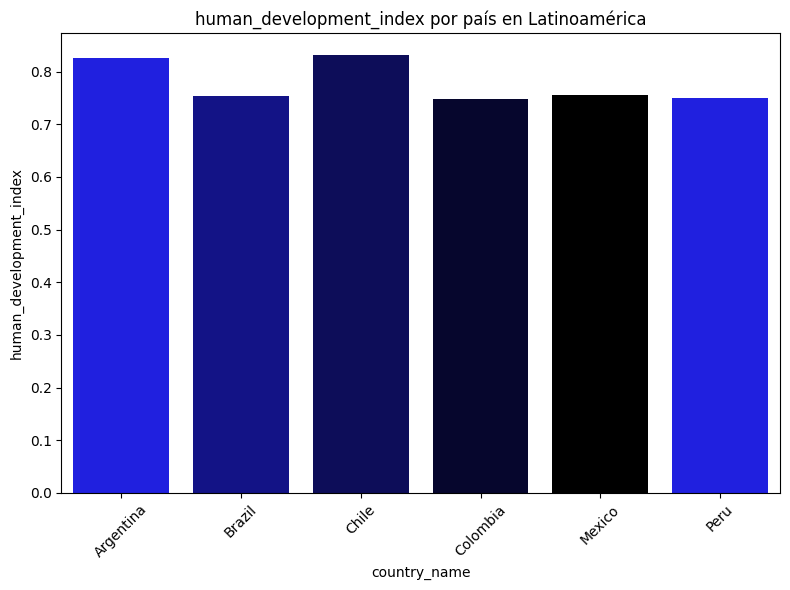

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


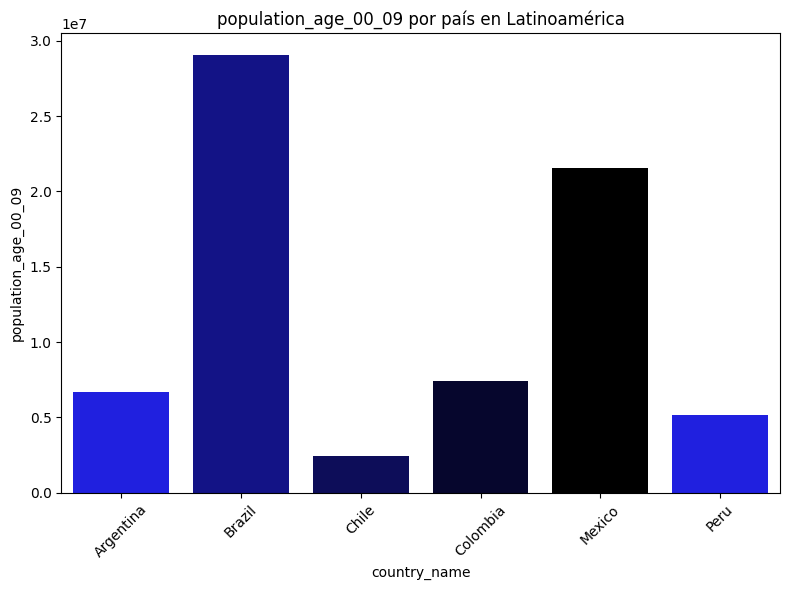

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


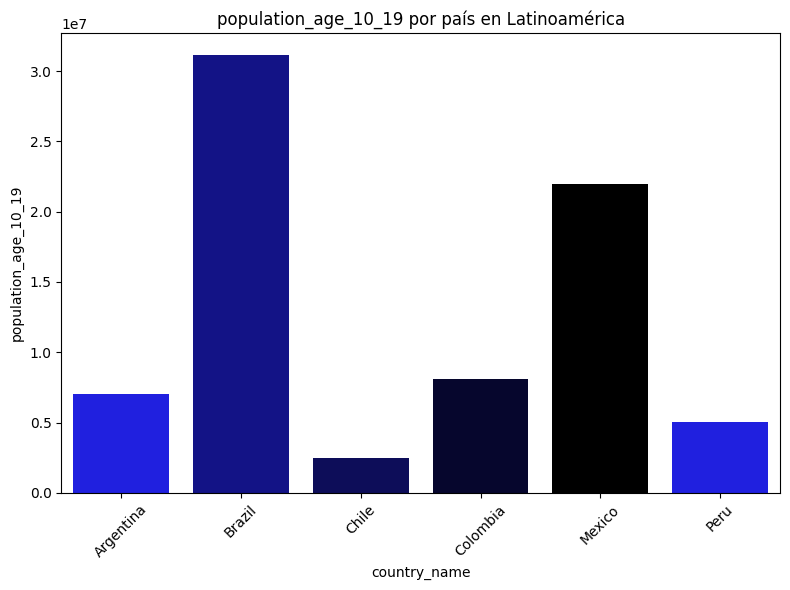

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


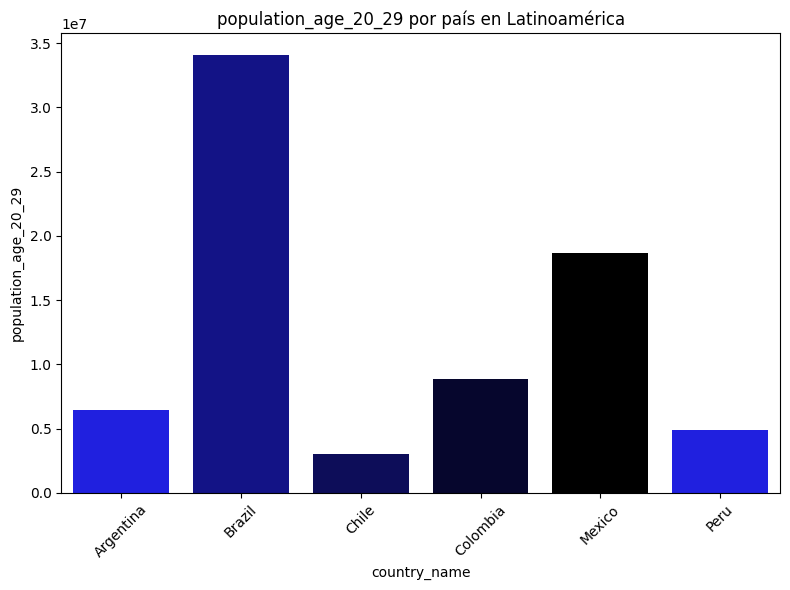

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


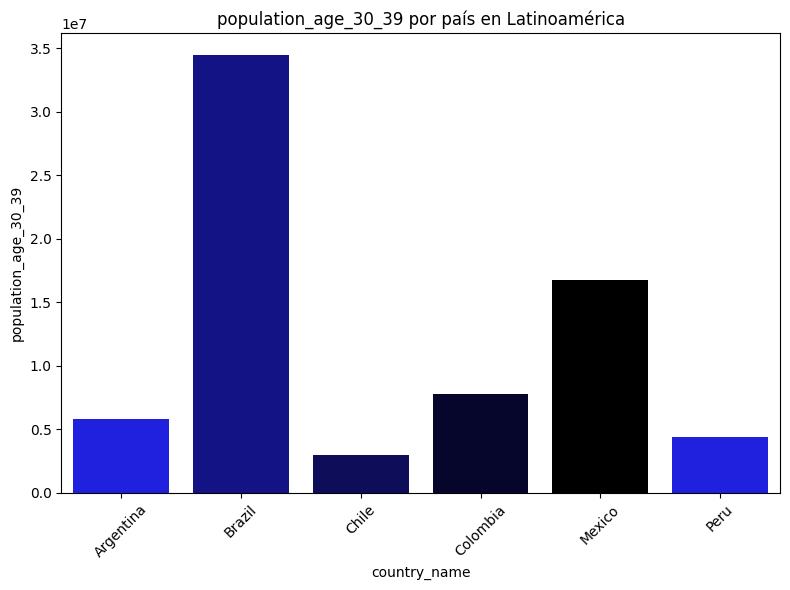

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


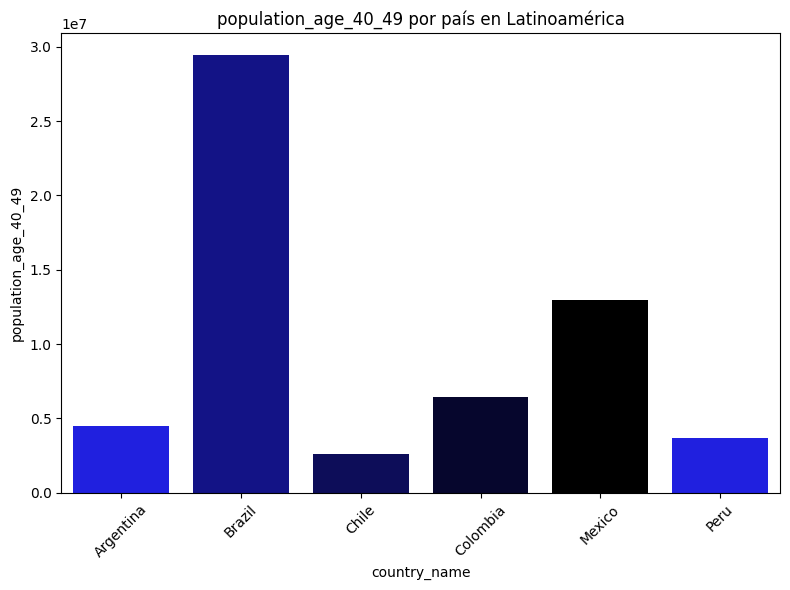

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


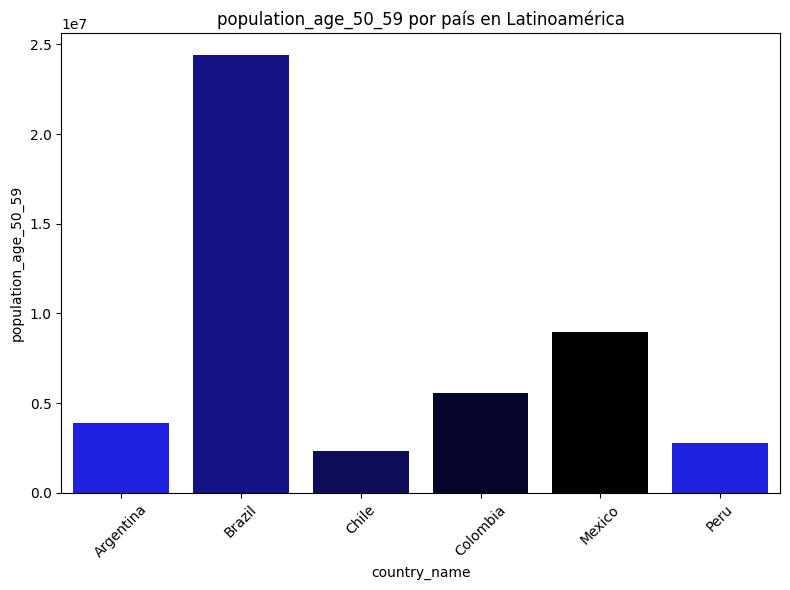

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


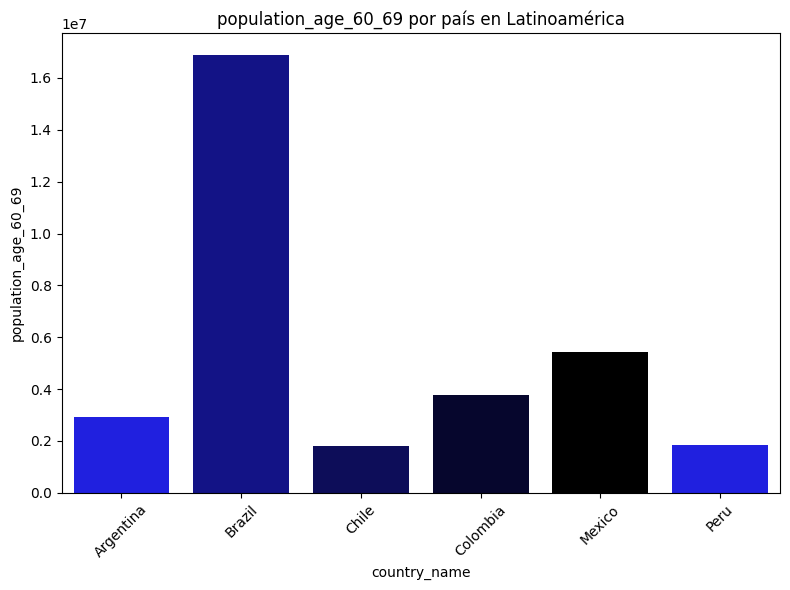

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


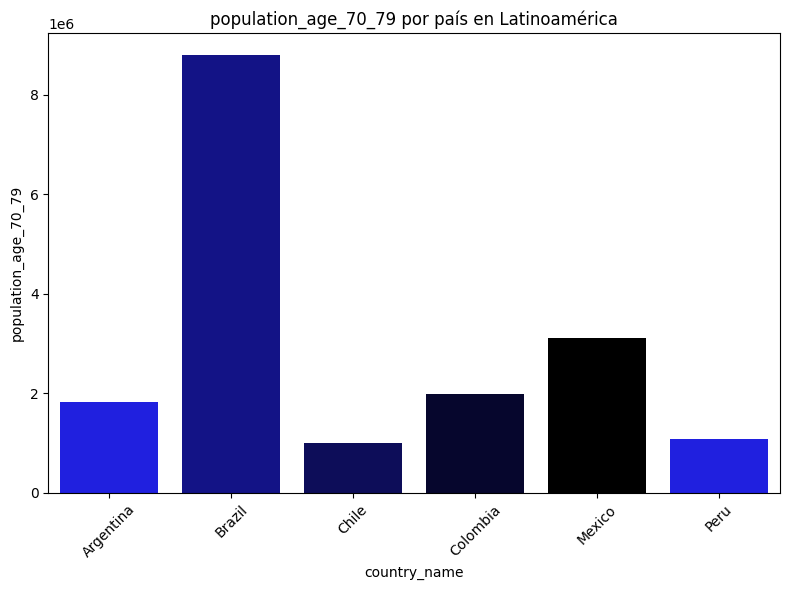

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


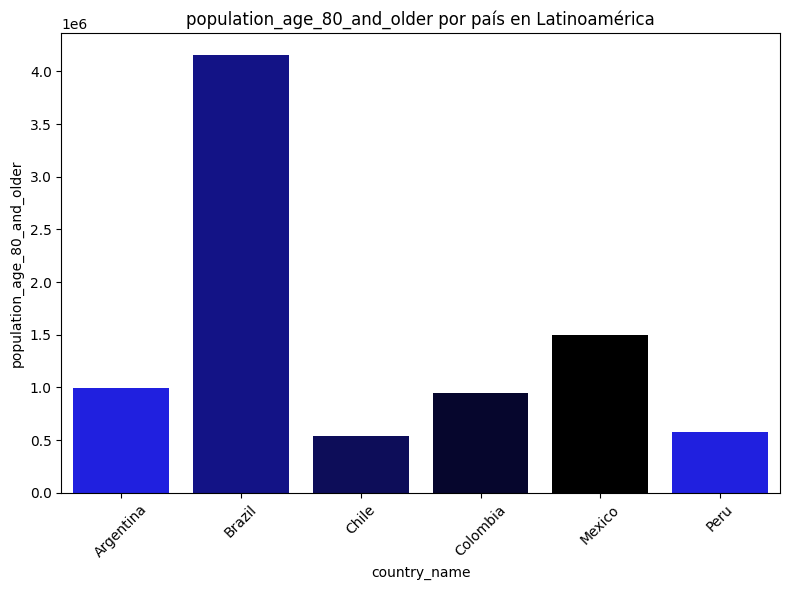

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


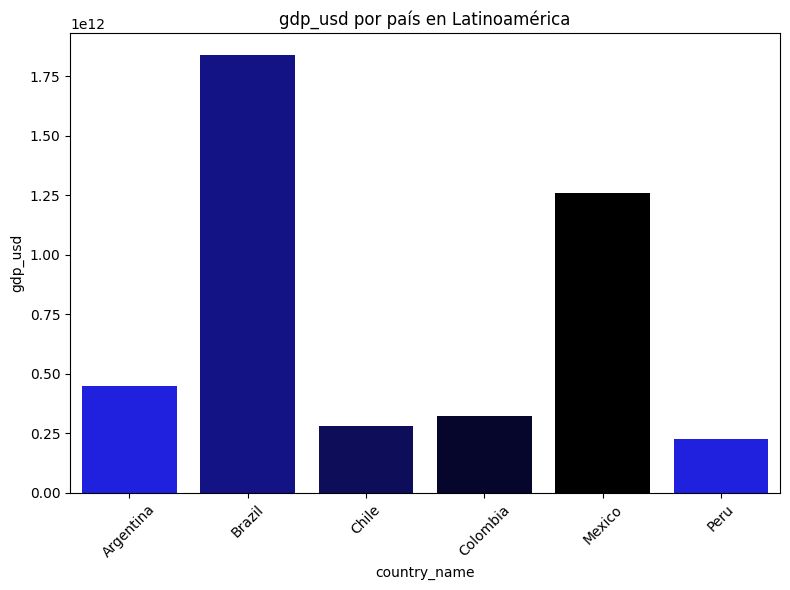

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


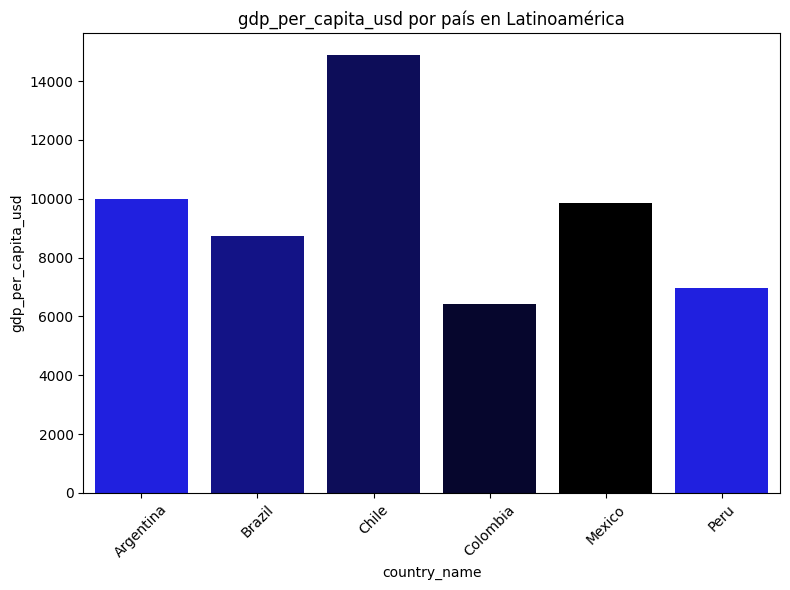

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


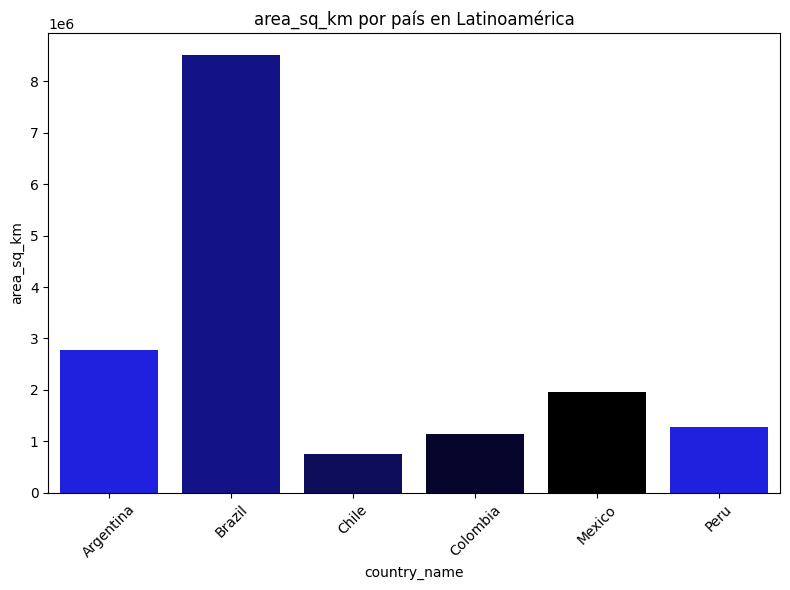

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


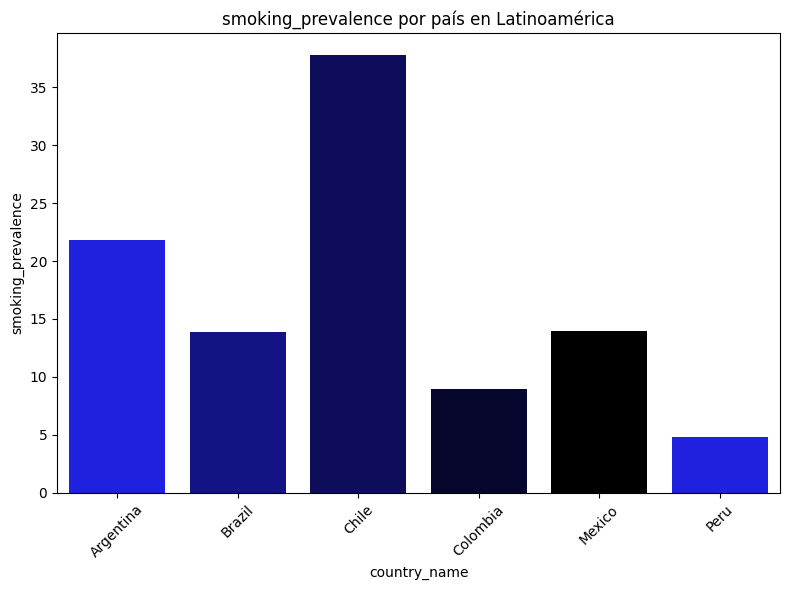

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


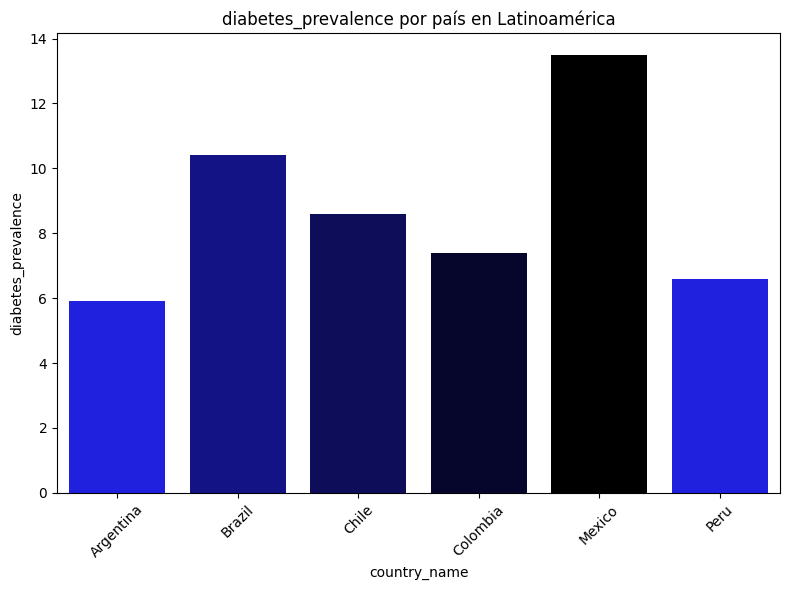

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


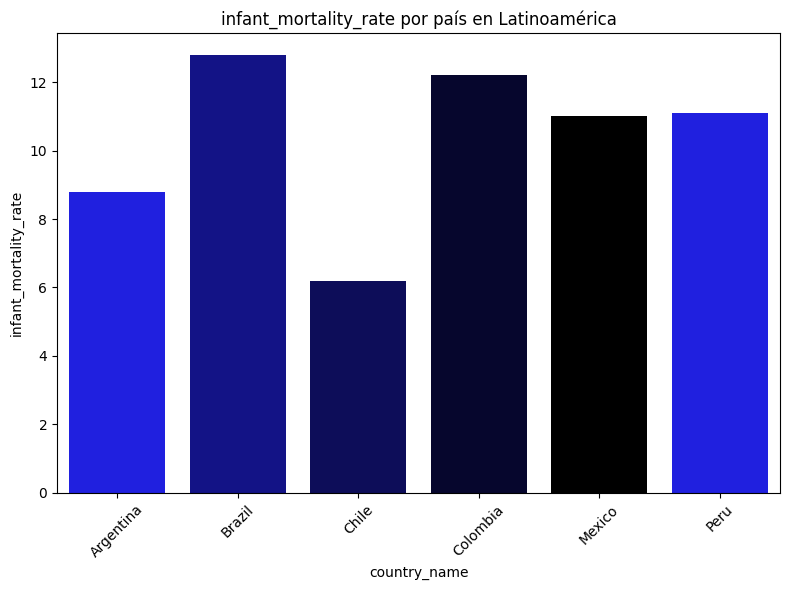

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


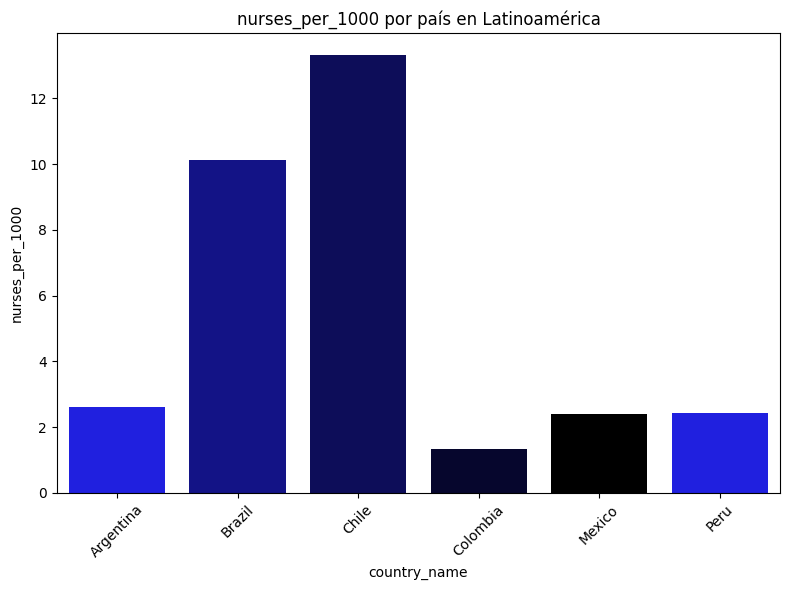

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


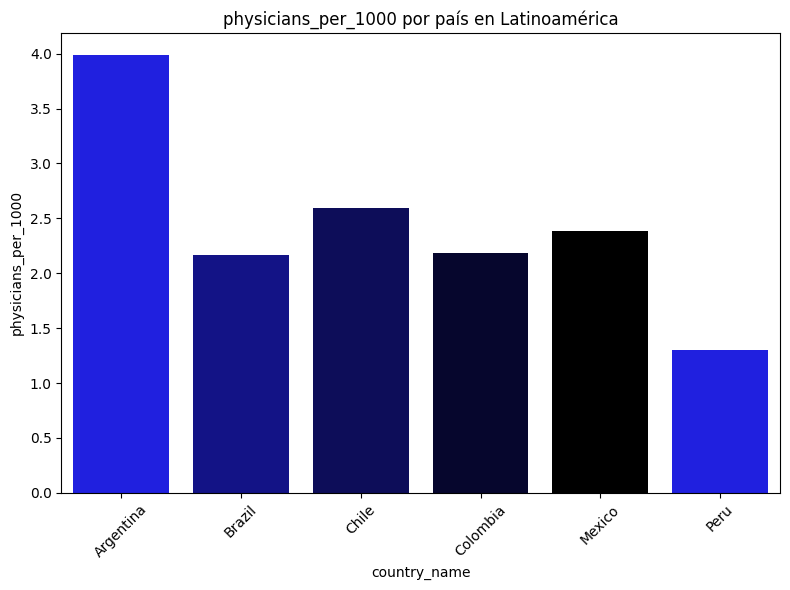

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


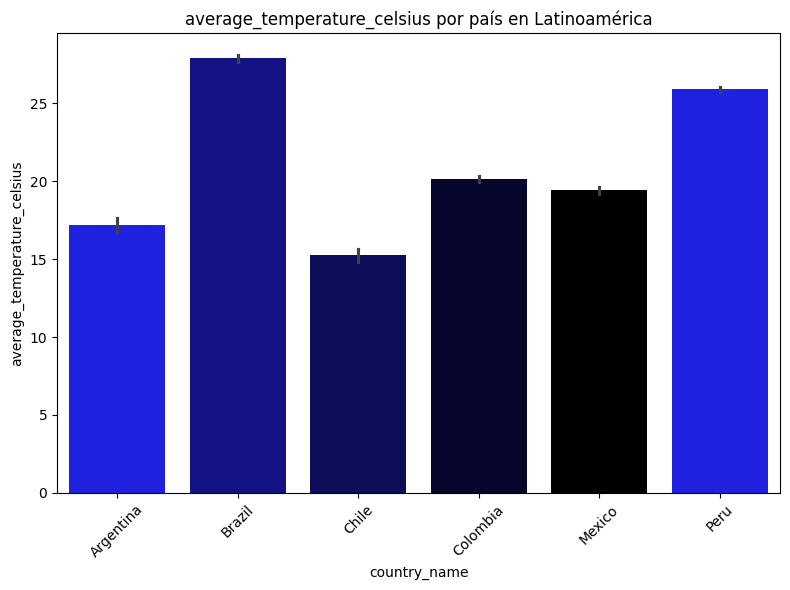

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


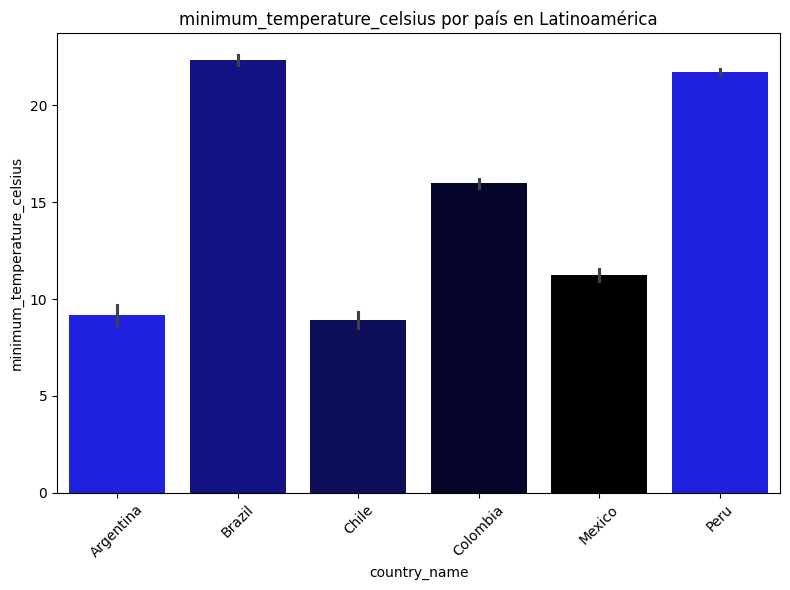

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


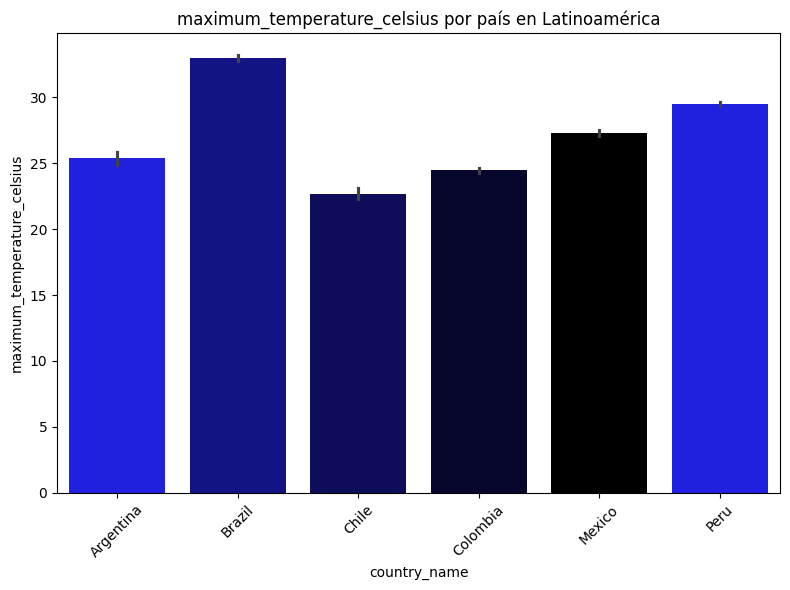

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


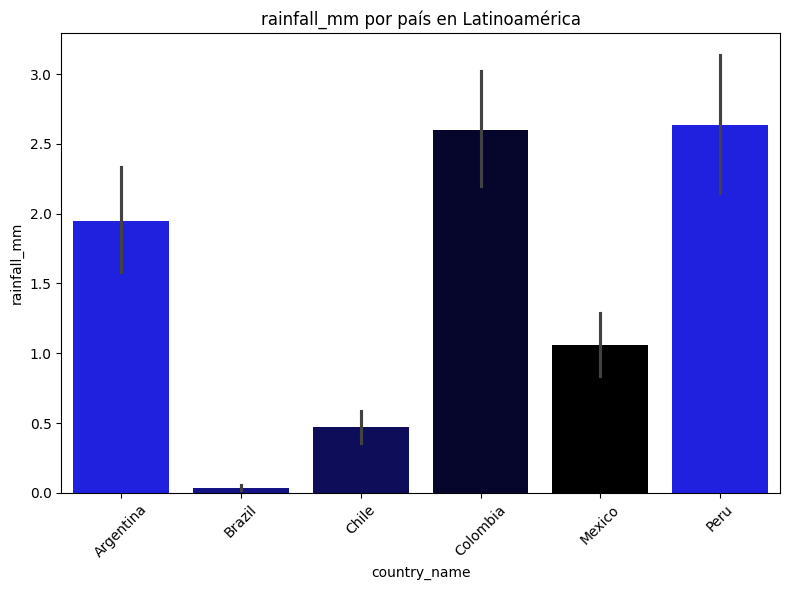

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


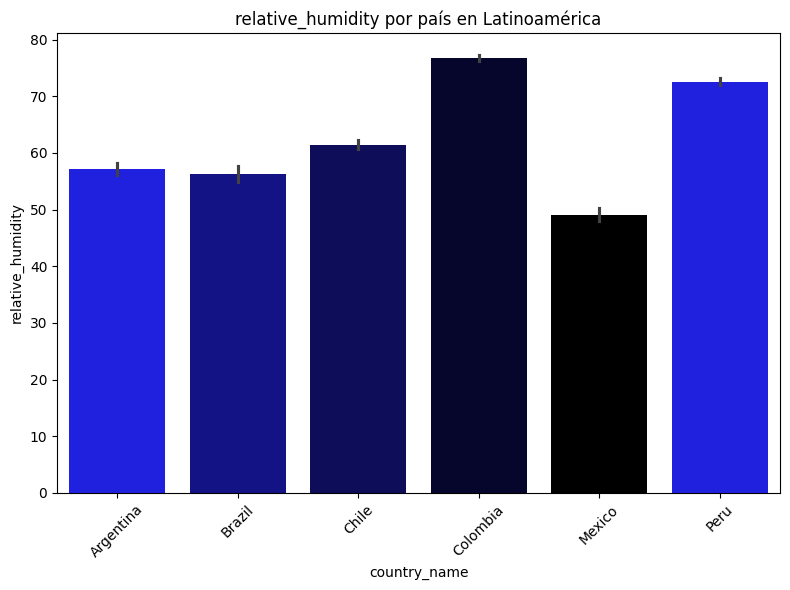

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


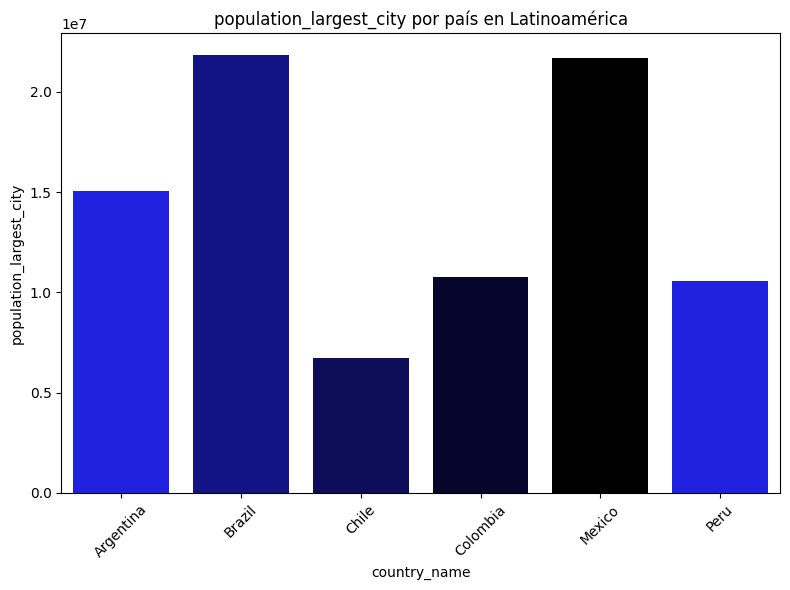

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


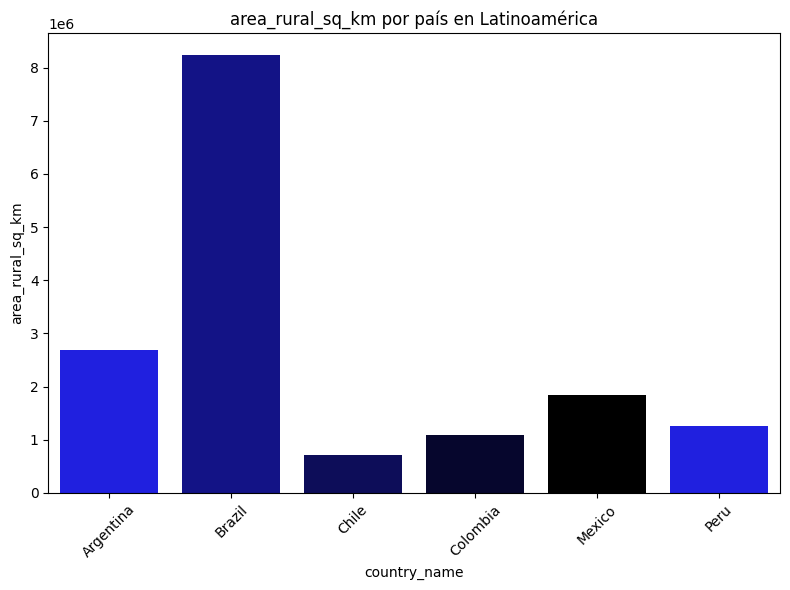

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


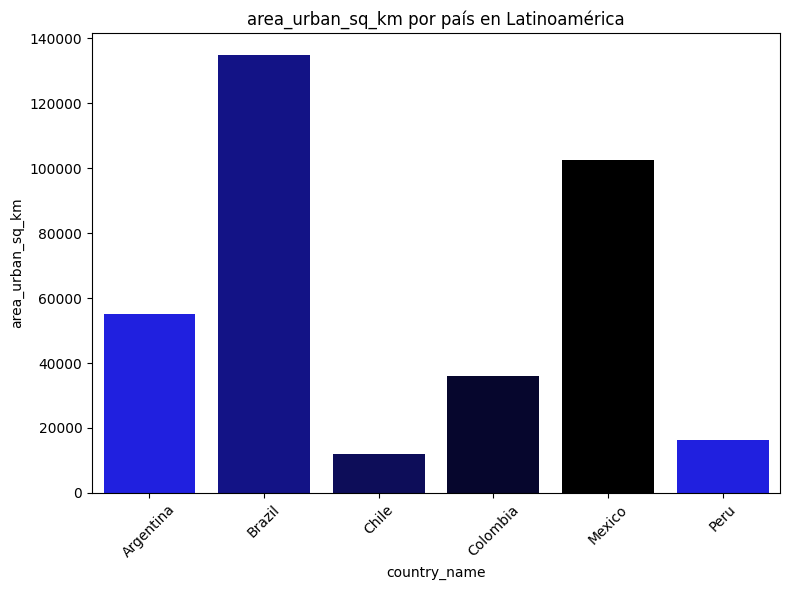

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


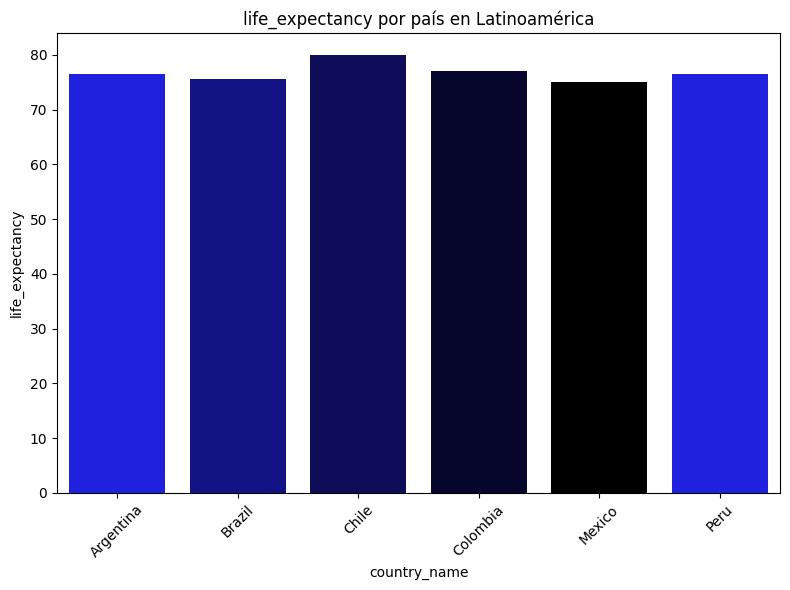

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


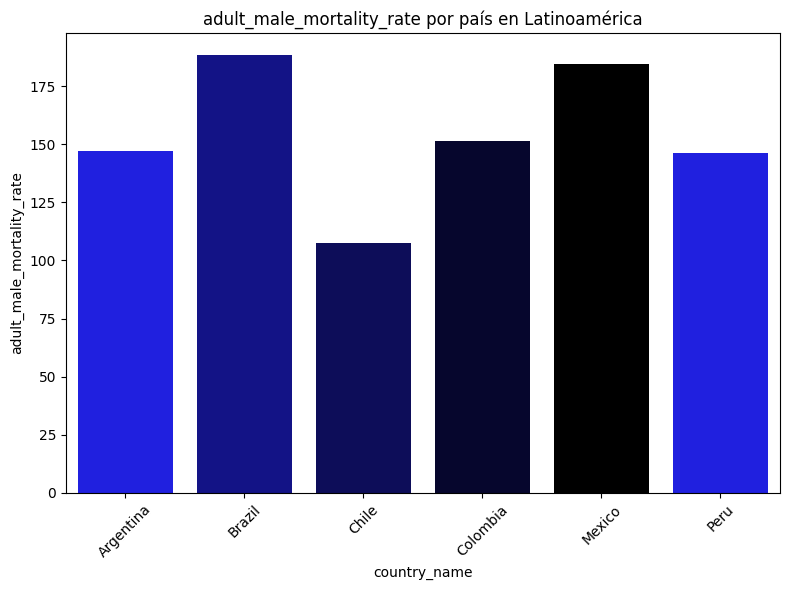

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


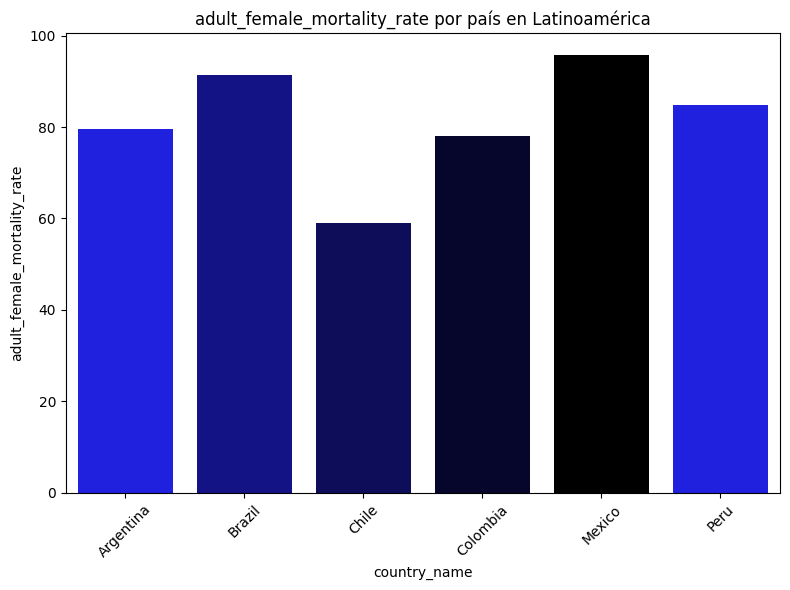

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


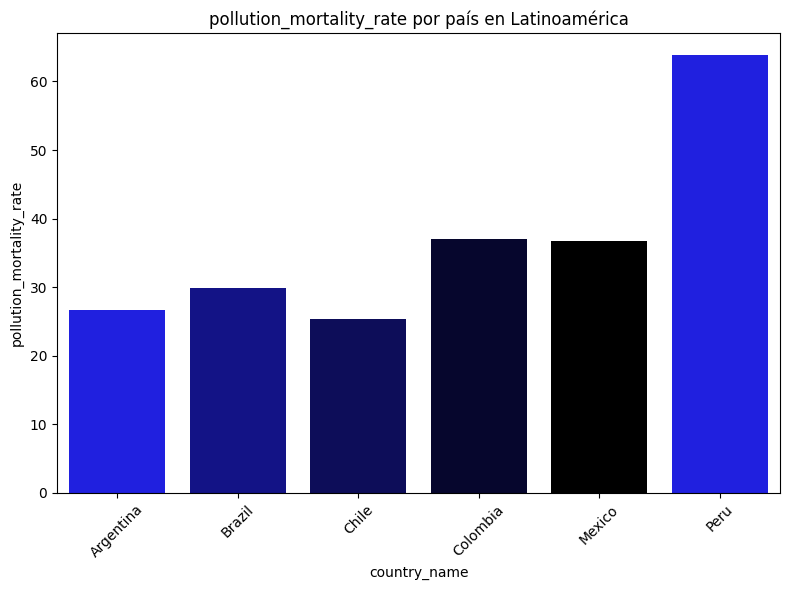

C:\Users\KIM\AppData\Local\Temp\ipykernel_23372\3789701773.py:8: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(                #CREAMOS GRAFICO DE BARRAS


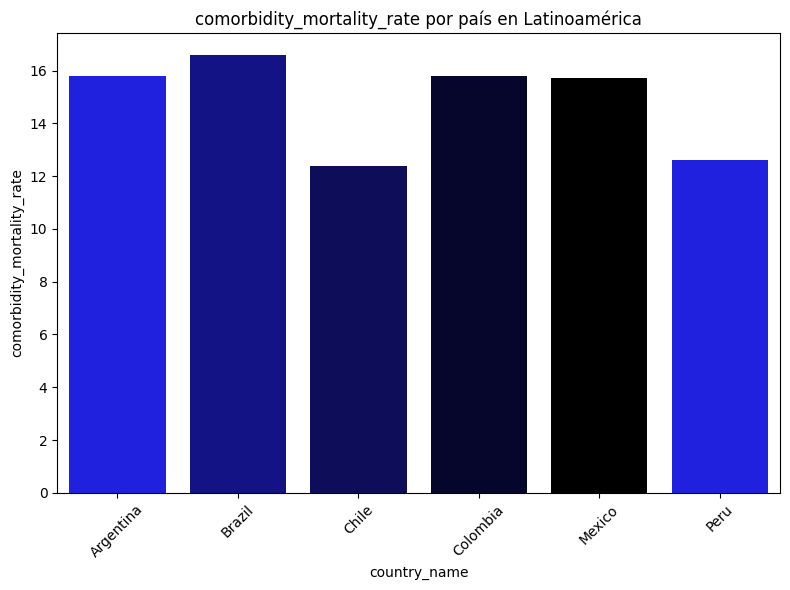

In [ ]:
for i in data_latinoamerica_paises.columns:
    if i not in ['location key', 'date', 'country_code', 'country_name', 'latitude', 'longitude',
                 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered',
                 'cumulative_vaccine_doses_administered', 'new_recovered']:
        
        fig, ax = plt.subplots(figsize=(8, 6))  # Ajusta el tamaño de la figura según sea necesario
        
        sns.barplot(                #CREAMOS GRAFICO DE BARRAS
            x='country_name',
            y=i,
            data=data_latinoamerica_paises,
            ax=ax,
            hue='country_name',
            palette=blue_palette # Aplica la paleta de colores verde
        )
        
        plt.title(f'{i} por país en Latinoamérica')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

Se repite el proceso con un ciclo for pero ahora vamos a realizar histogramas para ver la distribución de algunos de los datos.

El siguiente código proporcionado crea histogramas de las variables numéricas en el DataFrame data_latinoamerica_paises para las columnas listadas en lista_columnas_6, excepto algunas que están explícitamente excluidas. 

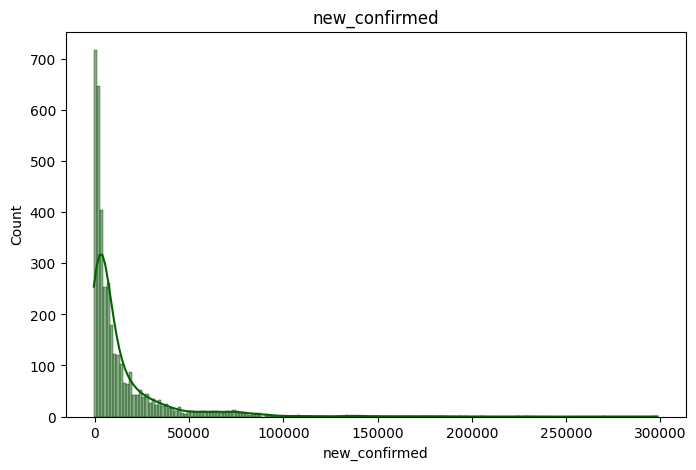

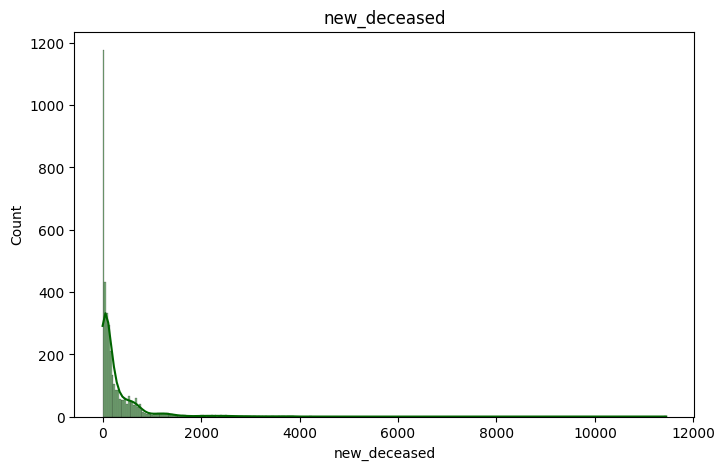

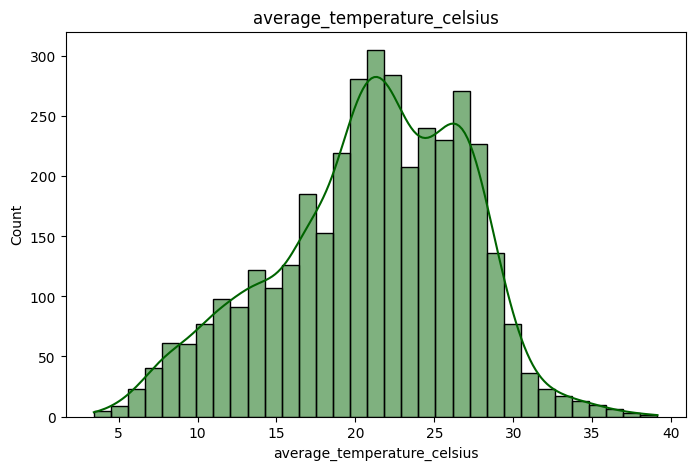

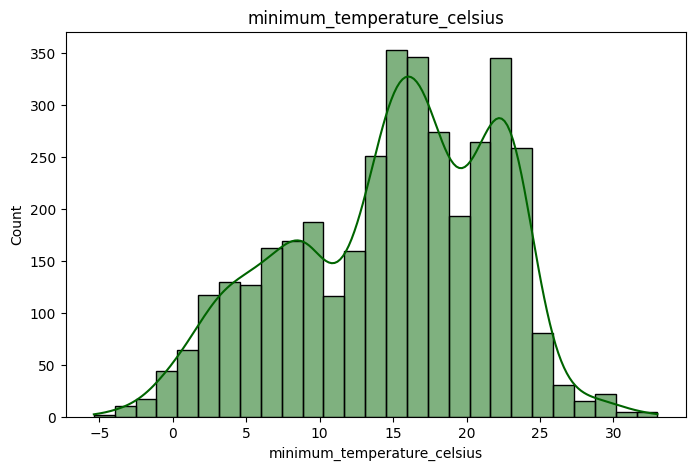

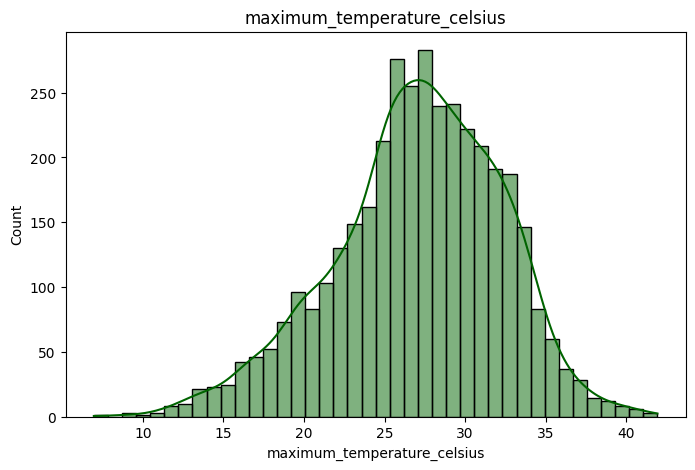

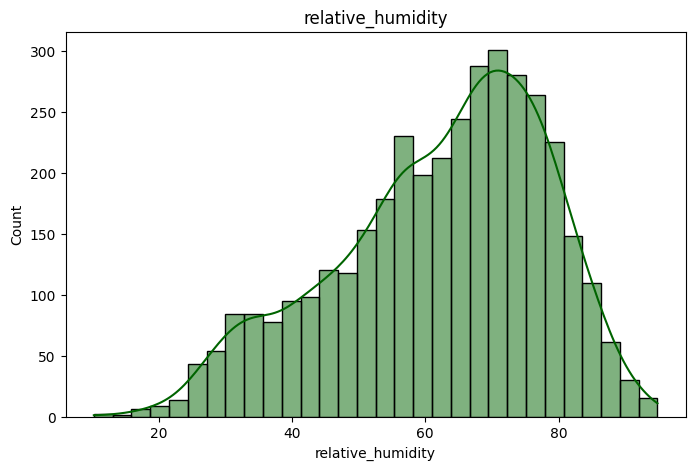

In [ ]:
lista_columnas_6=['new_confirmed','new_deceased','cumulative_confirmed','cumulative_deceased',
                  'cumulative_vaccine_doses_administered','average_temperature_celsius','minimum_temperature_celsius',
                  'maximum_temperature_celsius','relative_humidity']
# Crear histogramas de las variables numéricas
for i in data_latinoamerica_paises[lista_columnas_6]:
    if i not in ['location_key','date','country_code','country_name','latitude','longitude','cumulative_confirmed','cumulative_deceased',
                 'cumulative_recovered','cumulative_vaccine_doses_administered']:
        fig, ax = plt.subplots(figsize=(8,5))
        sns.histplot(
            data_latinoamerica_paises[i], color="darkgreen", # Set color to darkgreen
            kde=True)
        plt.title(i)
        plt.show()

Procederemos a realizar un análisis enfocados en algunas variables específicas, en este caso vamos a analizar la variable average_temperature y la variable new_confirmed, con el fin de tratar de entender el comportamiento de los casos respecto a la temperatura.

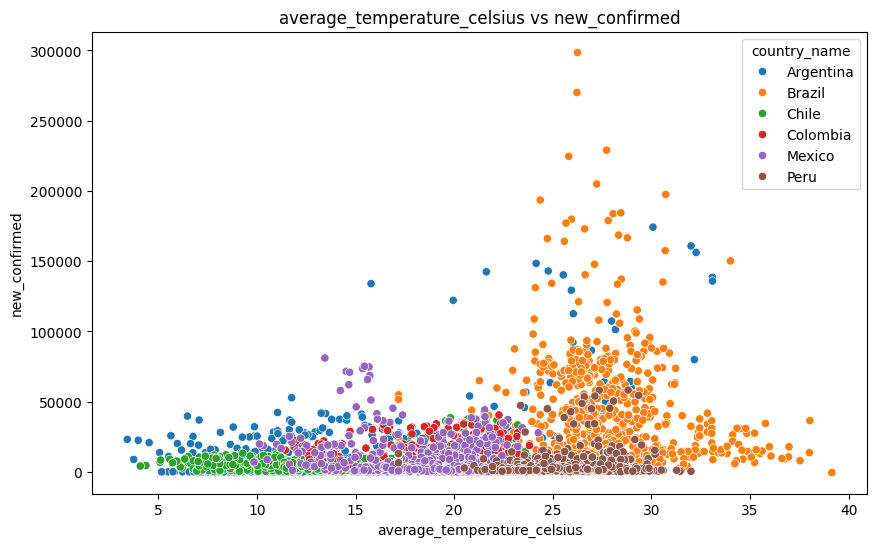

In [ ]:
# Grafica de average_temperature_celsius vs new_confirmed
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(                        #crear grafico de dispersion
    x='average_temperature_celsius',    
    y='new_confirmed', 
    data=data_latinoamerica_paises, 
    hue='country_name')        # # Cambia el color de los puntos según el país
plt.title('average_temperature_celsius vs new_confirmed')
plt.show()

Se ha podido observar que en algunos países la temperatura no influye en la cantidad de casos confirmados, sin embargo en otros países si se puede observar una relación entre la temperatura y la cantidad de casos confirmados.
Como vimos que la temperatura tiene alguna relación con los casos confirmados, vamos a realizar un análisis de la temperatura promedio con la cantidad de muertes.

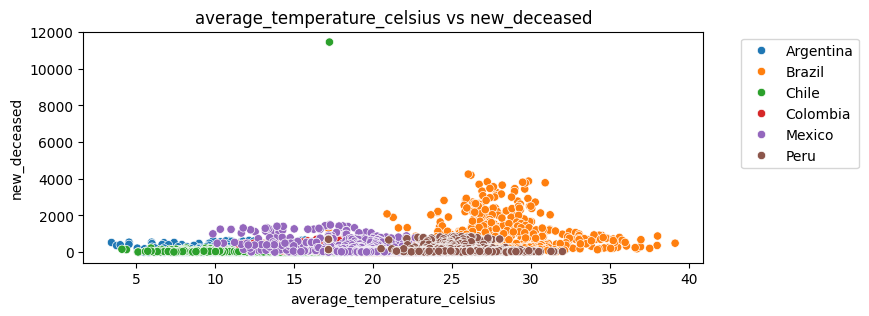

In [ ]:
# Grafica scatterplot de temperatura promedio / cantidad muertes (2 VAR):

fig, ax = plt.subplots(figsize=(8, 3))
sns.scatterplot(
    x='average_temperature_celsius', 
    y='new_deceased', 
    data=data_latinoamerica_paises, 
    hue='country_name')
plt.title('average_temperature_celsius vs new_deceased')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

En la gráfica anterior se ve un comportamiento similar al de los casos confirmados, en algunos países la temperatura no influye en la cantidad de muertes, sin embargo en otros países si se puede observar una relación entre la temperatura y la cantidad de muertes.

Ahora si veamos como se comportan las variables en un estudio longitudinal, es decir a lo largo del tiempo.

Por lo tanto, se hace una primera aproximación y observaremos las dosis administradas por mes en todos los países.

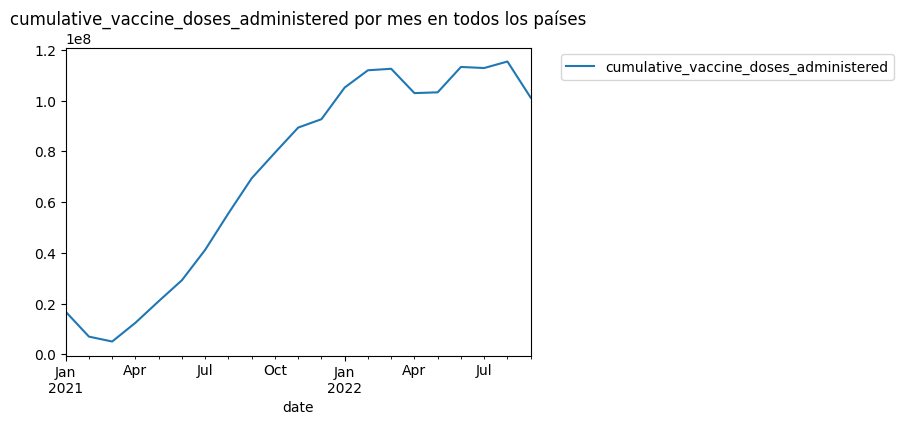

In [ ]:
# Grafica de valores medios de todos los países cumulative_vaccine_doses_administered con plot de PANDAS
fig, ax = plt.subplots(figsize=(6, 4))
# a continuacion agrupa datos por mes // . mean (Calcula la media de los valores para cada intervalo de tiempo, asegurado que solo se calculen medias para columnas numéricas. )
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('cumulative_vaccine_doses_administered por mes en todos los países'),
plt.show()

En la anterior gráfica se puede observar que la cantidad de dosis administradas en los países seleccionados: Argentina, Brasil, Chile, Colombia, México y Perú ha ido aumentando a lo largo del tiempo, recordemos que es un análisis general y no se ha hecho un análisis detallado.

Como la anterior gráfica no nos da mucha información, vamos a realizar un análisis más detallado de las dosis administradas por mes en cada país.

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
#usamos for para iniciar un bucle e iterar sobre cada país en la lista
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
    #agrupa datos x mes (debe haber indice de fecha para esto) y Calcula la media de las columnas numéricas para cada intervalo de tiempo y se grafica
plt.title('Evolución de dosis administradas por mes de cada país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()
Si realizamos un análisis más detallado de las dosis administradas por mes en cada país, podemos observar que en algunos países la cantidad de dosis administradas 
ha ido aumentando a lo largo del tiempo, sin embargo en otros países la cantidad de dosis administradas ha ido disminuyendo. Esto puede ser debido a muchos factores, 
como la cantidad de vacunas disponibles, la cantidad de personas que se han vacunado, entre otros.

SyntaxError: invalid syntax (1951066129.py, line 10)

Si realizamos un análisis más detallado de las dosis administradas por mes en cada país, podemos observar que en algunos países la cantidad de dosis administradas
ha ido aumentando a lo largo del tiempo, sin embargo en otros países la cantidad de dosis administradas ha ido disminuyendo. Esto puede ser debido a muchos factores,
como la cantidad de vacunas disponibles, la cantidad de personas que se han vacunado, entre otros.

VEREMOS A CONTINUACION LAS MUERTES ACUMULADAS POR PAIS:

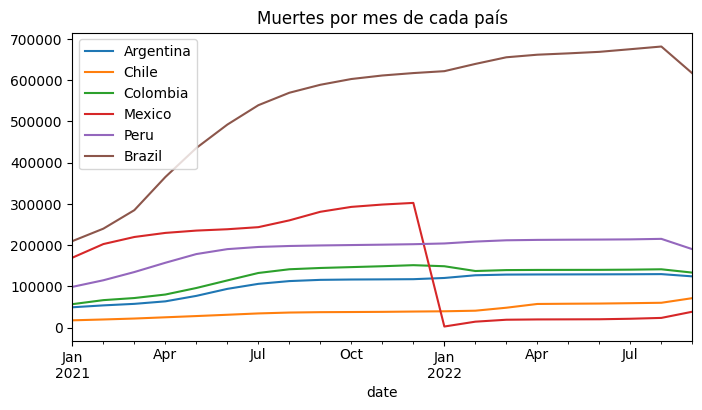

In [ ]:
#GRAFICAMOS MUERTES POR MES/PAIS
#Utilizando el plot de PANDAS, usamos for para ver por pais las muertes acumuladas: 
fig, ax = plt.subplots(figsize=(8, 4))   #crea figura y ejes

for pais in paises_seleccionados:        #Inicia un bucle que itera sobre cada país en la lista 
    data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == pais].resample('ME').mean(numeric_only=True)['cumulative_deceased'].plot()
plt.title('Muertes por mes de cada país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

El país que más muertes ha tenido es Brasil, seguido de México, Colombia, Argentina, Perú y Chile. Sin embargo, esto no quiere decir que estos países sean los que peor han
manejado la pandemia, ya que hay que tener en cuenta la cantidad de habitantes además de otros factores y cantidad de datos que tenemos.

La disminución de casos en México puede ser una perdida de datos o una disminución real de casos, esto se puede analizar en un estudio posterior.

CASOS CONFIRMADOS POR MES POR CADA PAIS : 

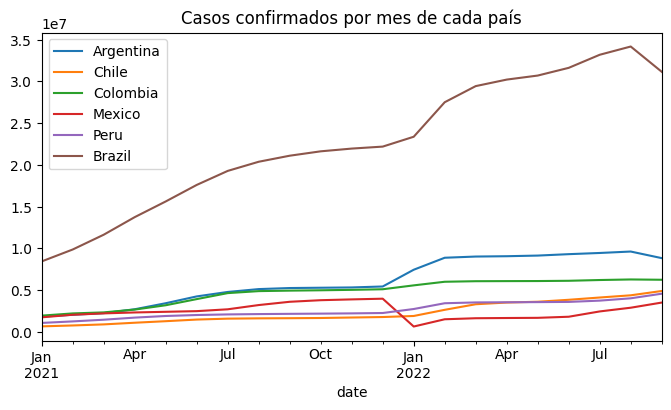

In [ ]:
#GRAFICAMOS CASOS CONFIRMADOS POR MES/PAIS
fig, ax = plt.subplots(figsize=(8, 4))

for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == pais].resample('ME').mean(numeric_only=True)['cumulative_confirmed'].plot()
plt.title('Casos confirmados por mes de cada país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

El país que más casos confirmados ha tenido es Brasil, seguido de México, Argentina, Colombia, Chile y Perú. Esto no quiere decir que manejaron peor la pandemia, 
ya que hay que tener en cuenta la cantidad de habitantes de cada país además de otros factores y cantidad de datos que tenemos.

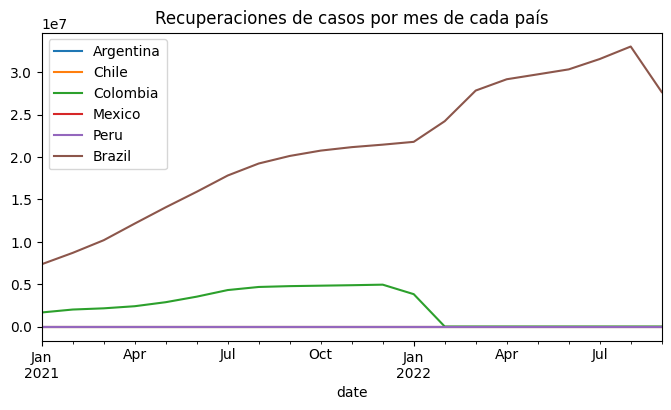

In [ ]:
#GRAFICAMOS RECUPERACIONES DE CASOS POR MES DE CADA PAIS:
fig, ax = plt.subplots(figsize=(8, 4))

for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot()
plt.title('Recuperaciones de casos por mes de cada país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

El país que mejor se recupero ha sido Brasil, sin embargo esto como lo dijimos viene relacionado a la cantidad de personas y vacunas disponibles.

NUMEROS DE CASOS NUEVOS ENTRE LOS PAISES DE AMERICA LATINA

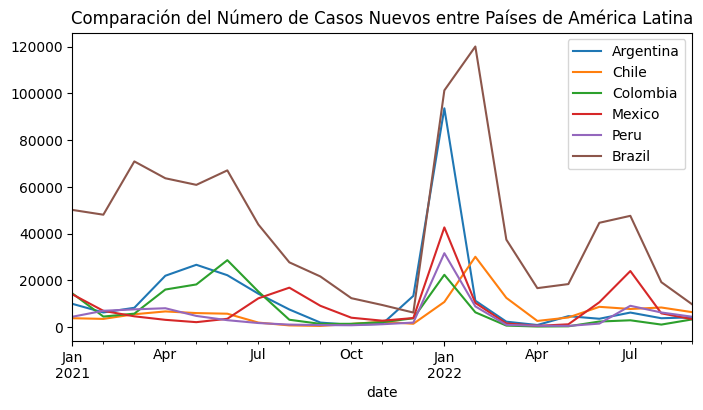

In [ ]:
#COMPARACION DE NUMERO DE CASOS NUEVOS ENTRE LOS PAISES SELECCIONADOS
fig, ax = plt.subplots(figsize=(8, 4))

for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name'] == pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()
plt.title('Comparación del Número de Casos Nuevos entre Países de América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

De los países que mejor manejó la pandemia fue Chile, seguido de Perú, Argentina, Colombia, México y Brasil, se puede observar que la cantidad de muertes y casos
confirmados es menor en estos países además de no ser tan desproporcionada la cantidad de vacunas administradas.

DISTRIBUCION DE DOSIS ACUMULADAS POR PAIS

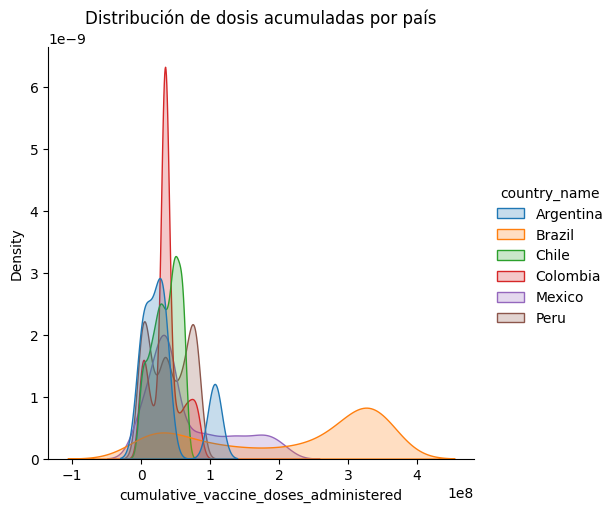

In [ ]:
#GRAFICAMOS LA DISTRIUCION DE DOSIS ACUMULADAS POR PAIS USANDO SEABORN
sns.displot(                        #función de Seaborn para crear gráficos de distribución. 
    data_latinoamerica_paises, 
    x="cumulative_vaccine_doses_administered", 
    hue="country_name", 
    kind="kde",      #TIPO DE GRAFICO LINEAS SUAVES KDE 
    fill=True)
plt.title('Distribución de dosis acumuladas por país')
plt.show()

De los países que peor manejaron la pandemia fue Brasil, seguido de México, Colombia, Argentina, Perú y Chile, se puede observar que la cantidad de muertes y casos
confirmados es mayor en estos países además de ser desproporcionada la cantidad de vacunas administradas.

MEDIANA DE TEMPERATURA POR PAIS:

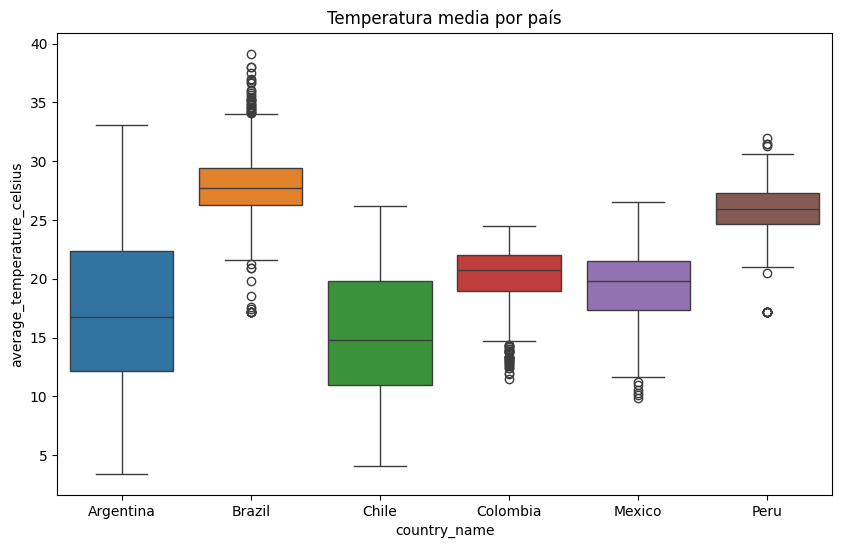

In [ ]:
# Creamos Diagrama de Cajas (Boxplot) utilizada para mostrar la distribución 
# de un conjunto de datos numéricos a través de sus cuartiles. 
# con Seaborn: average_temperature_celsius vs new_confirmed por pais 
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(
    x='country_name', 
    y='average_temperature_celsius', 
    data=data_latinoamerica_paises, 
    hue='country_name')             #color diferente por pais
plt.title('Temperatura media por país') 
plt.show()

Aunque Chile tiene rangos diferentes de temperatura y eso podría haber afectado la cantidad de casos confirmados y muertes, se puede observar que Chile ha manejado 
mejor la pandemia que los demás países.

Esto poco a poco nos ha llevado a concluir que los países donde los centros serán donde hay más casos confirmados y muertes, ya que es donde se necesita más ayuda.

Pese a nuestro anterior análisis, no podemos tomar una decisión definitiva, ya que no hemos hecho un análisis detallado de los datos, por lo que se recomienda 
hacer un análisis más detallado y en estudio de los datos para poder tomar una decisión más acertada. Seguiremos viendo cómo se comportan las variables de a través de violinplots.

El código a continuacion realiza un análisis visual de la distribución de variables numéricas en diferentes países utilizando diagramas de cajas (violin plots). 
Primero, selecciona las columnas con más de 6 valores únicos y crea un nuevo DataFrame con esas columnas y country_name. Luego, para cada variable numérica relevante,
genera un violin plot para mostrar la distribución de esa variable en los distintos países:

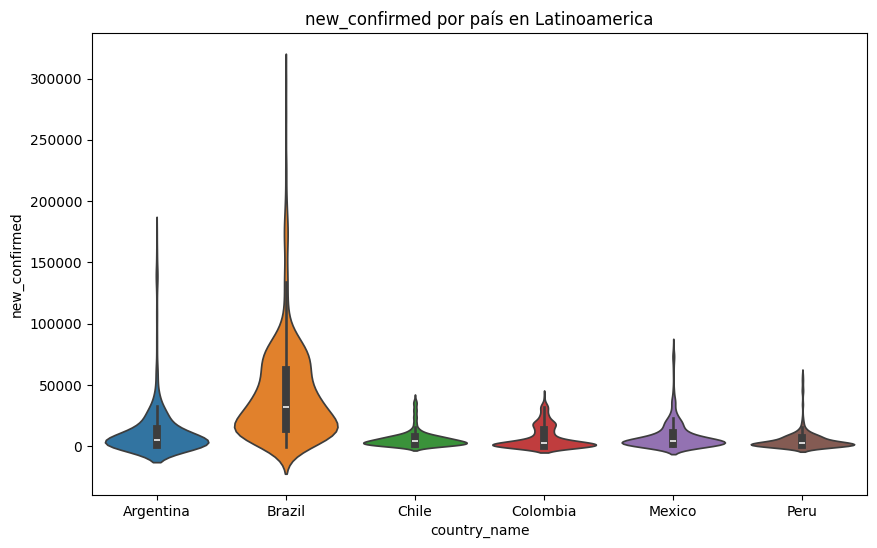

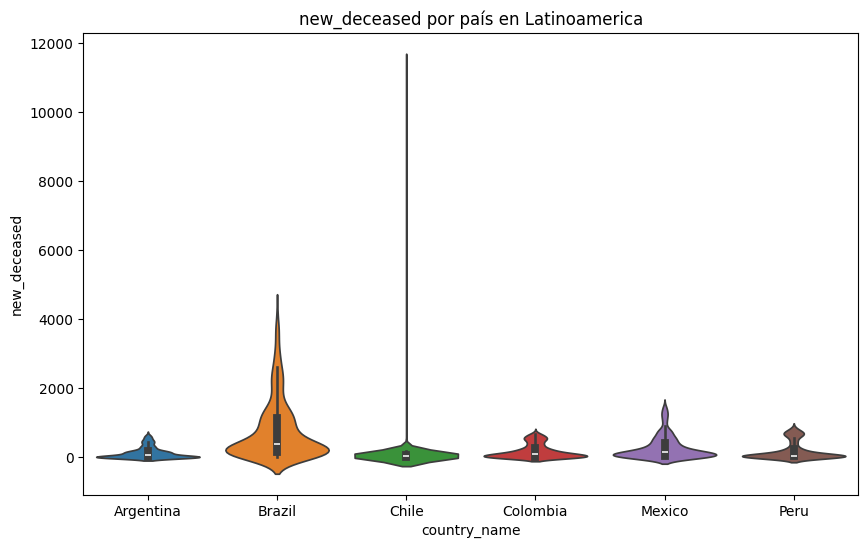

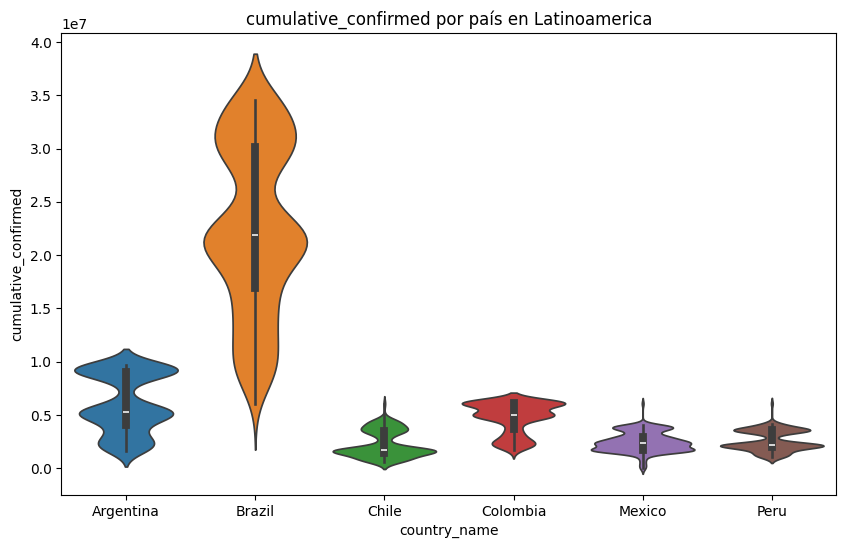

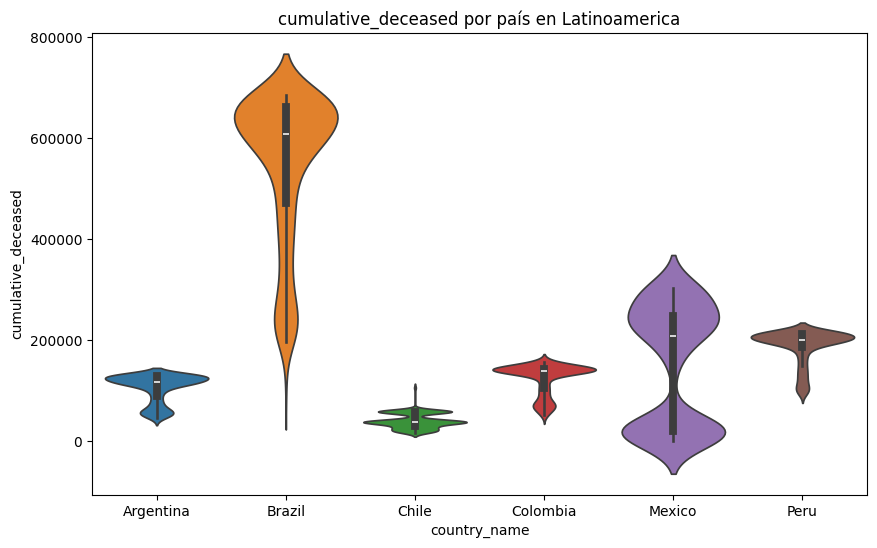

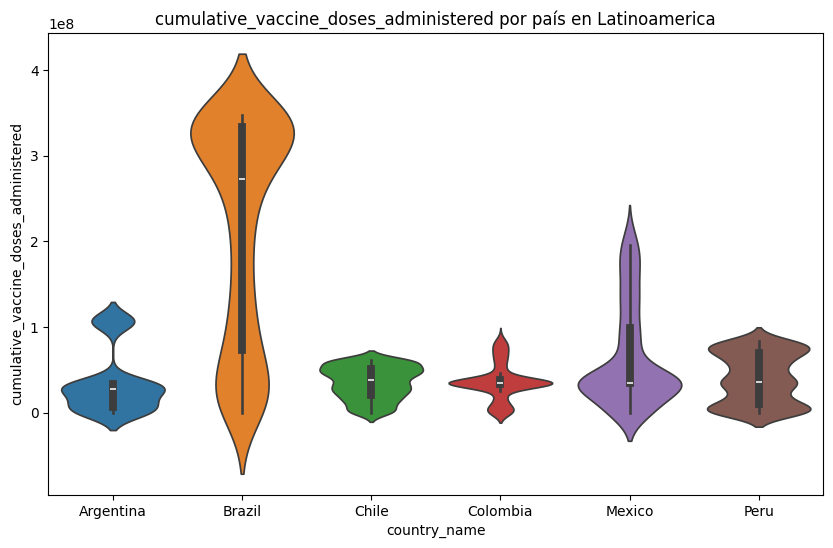

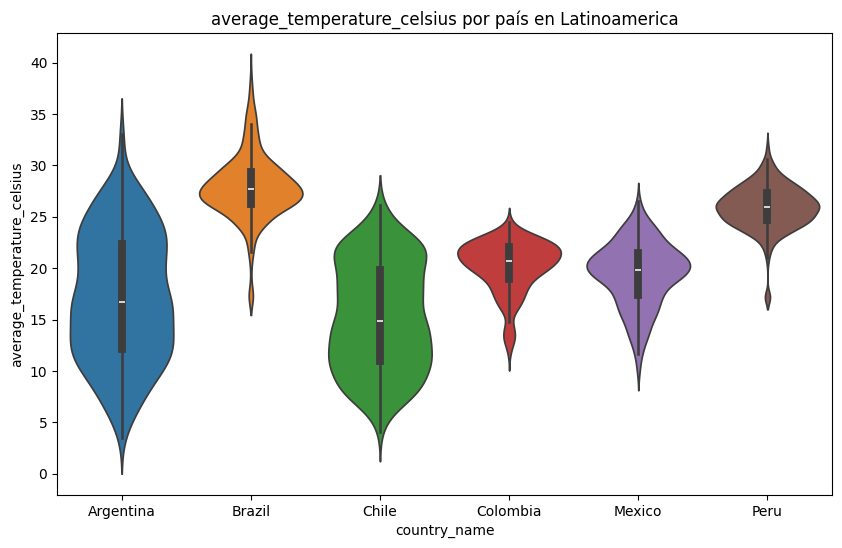

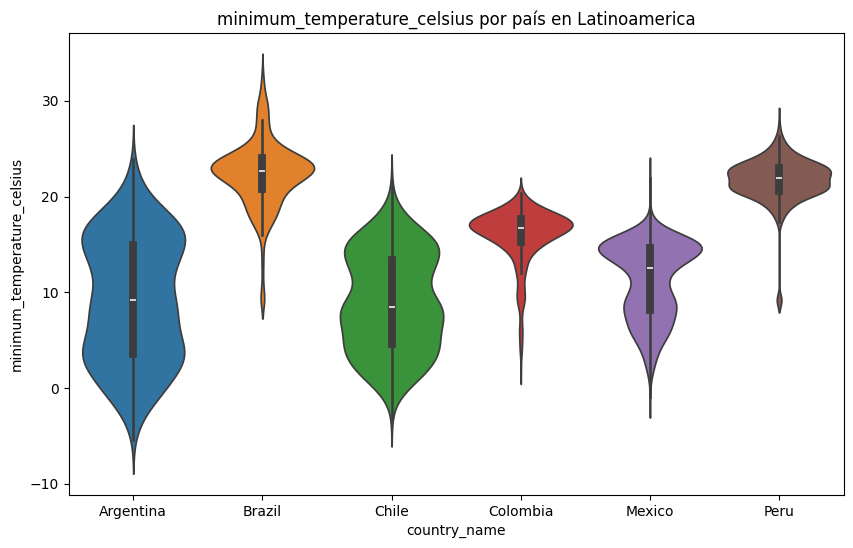

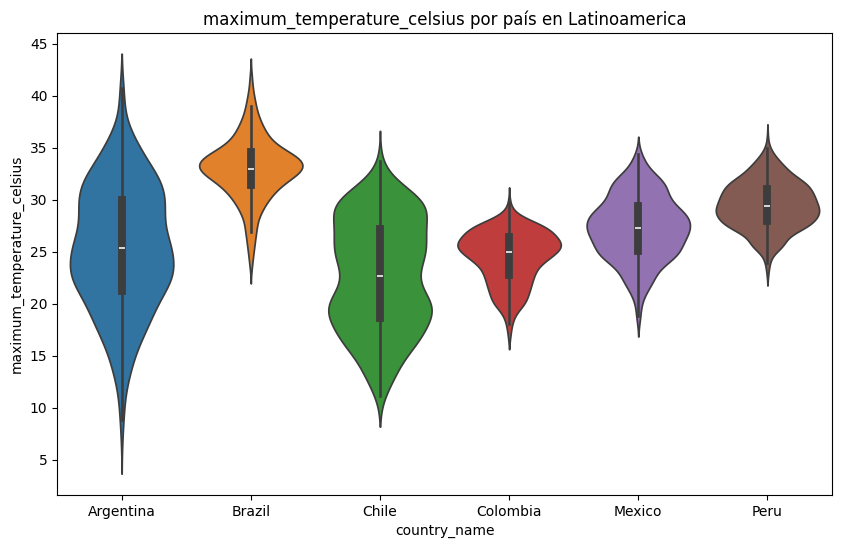

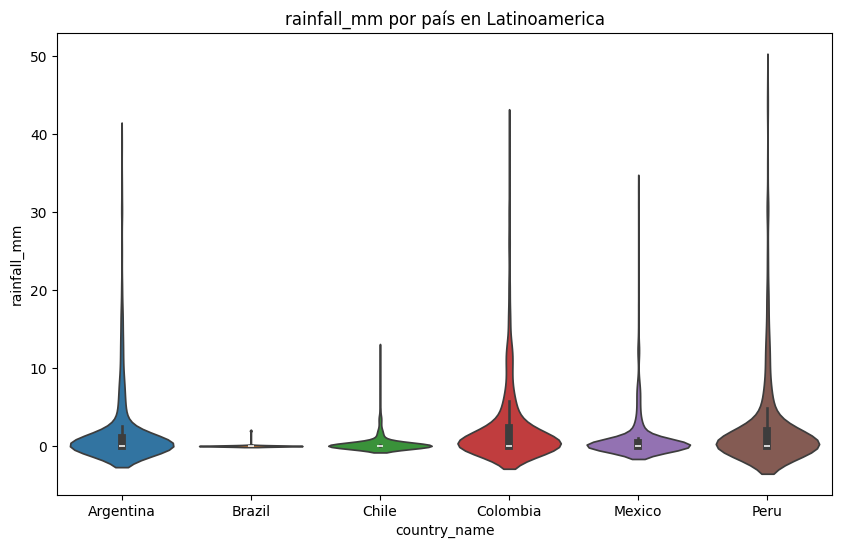

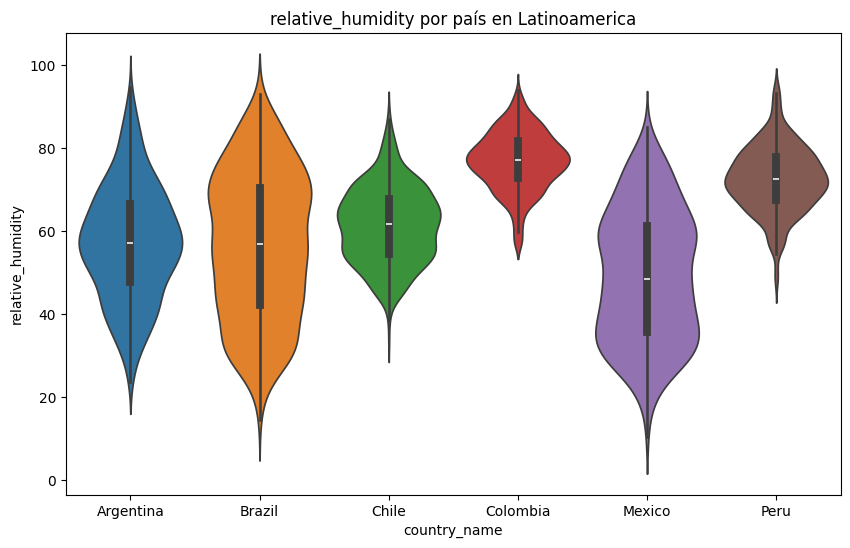

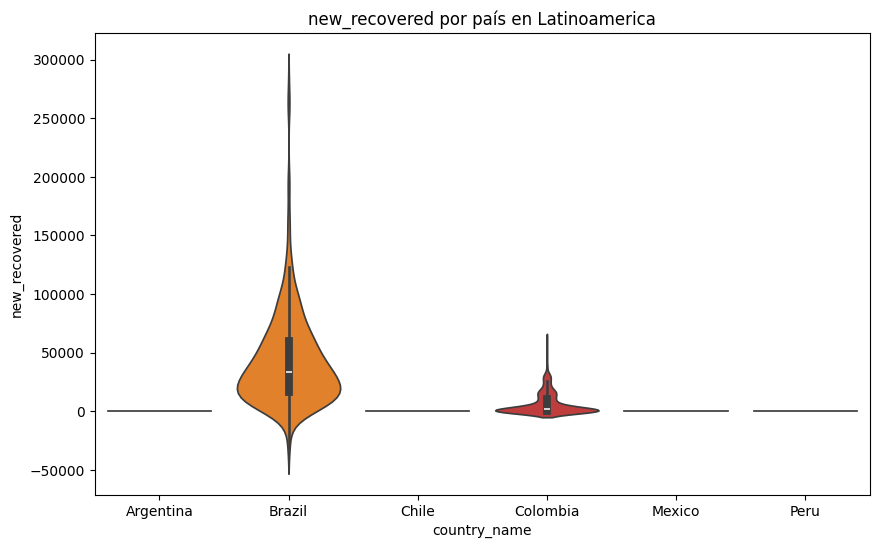

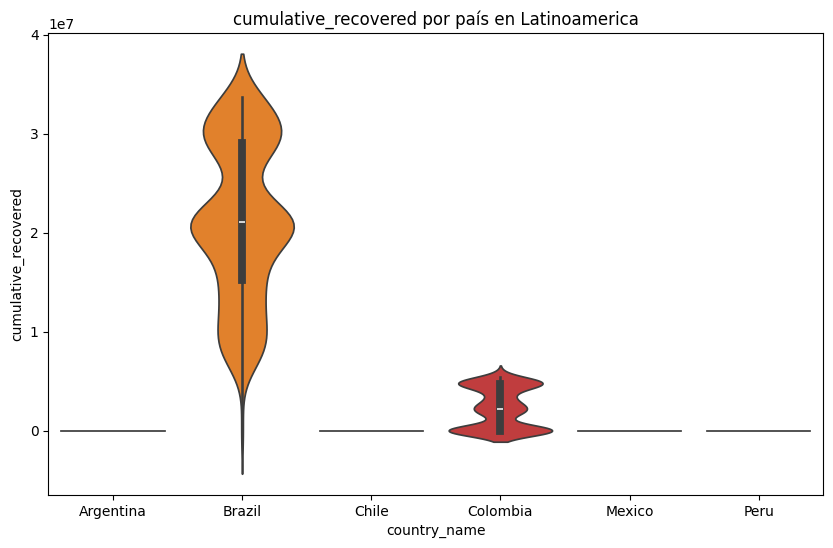

In [ ]:
# Se crea un dataframe con las columnas mayores a 6 porque son las que tienen valores diferentes para cada país.

columnas_mayores_6=[]     # Crea una lista vacía para almacenar los nombres de las columnas que tienen más de 6 valores únicos.

for i in data_latinoamerica_paises.columns:
    if i not in ['location_key','date','country_code','latitude','longitude']:    #excluye estas columnas
        if data_latinoamerica_paises[i].nunique()>6:      #Comprueba si la columna tiene más de 6 valores únicos.
            columnas_mayores_6.append(i)          #Si la columna cumple con el criterio, se agrega a la lista 
            
#agregar a columnas_mayores_6 la columna country_name para poder hacer análisis por país.
columnas_mayores_6.append('country_name')

# Se crea un dataframe con las columnas mayores a 6
data_latinoamerica_paises_mayores_6=data_latinoamerica_paises[columnas_mayores_6]

# VIOLINPLOT en todos los paises para variables numericas
for i in data_latinoamerica_paises_mayores_6.columns:
    if i not in ['location_key','date','country_code','latitude','longitude','country_name']:
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.violinplot(
            x='country_name', 
            y=i, 
            data=data_latinoamerica_paises_mayores_6,
            hue='country_name')
        plt.title(f'{i} por país en Latinoamerica')
        plt.show()

Procedamos a analizar la distribución de la población por grupos de edad en los países seleccionados, para tratar de entender como se comporta la población en cada 
país y en un futuro poder tomar decisiones más acertadas.

DISTRIBUCION DE LA POBLACION POR GRUPOS DE EDAD: 

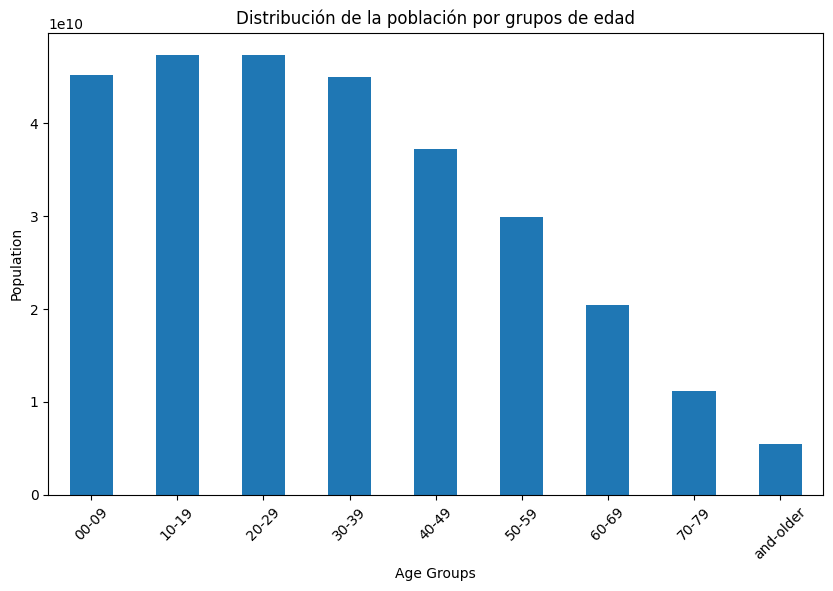

In [ ]:
# GRAFICAMOS la distribucion de la poblacion por GRUPOS DE EDAD:
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = data_latinoamerica_paises[age_columns].sum()

plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', stacked=True)
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Distribución de la población por grupos de edad')
plt.xticks(range(len(age_columns)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_columns], rotation=45)
plt.show()

Esta gráfica es interesante porque nos permite ver la población por grupos de edad en cada país, lo que nos puede ayudar a entender cómo se comporta la población y también 
nos genera la idea de que podríamos graficar la cantidad de vacunas por cada grupo etáreo.

In [ ]:
# Grupo etareo mas vacunado
data_latinoamerica_paises['population_age_00_19']=data_latinoamerica_paises['population_age_00_09']+data_latinoamerica_paises['population_age_10_19']
data_latinoamerica_paises['population_age_20_39']=data_latinoamerica_paises['population_age_20_29']+data_latinoamerica_paises['population_age_30_39']
data_latinoamerica_paises['population_age_40_59']=data_latinoamerica_paises['population_age_40_49']+data_latinoamerica_paises['population_age_50_59']
data_latinoamerica_paises['population_age_60_79']=data_latinoamerica_paises['population_age_60_69']+data_latinoamerica_paises['population_age_70_79']
data_latinoamerica_paises['population_age_80_and_older']=data_latinoamerica_paises['population_age_80_and_older']

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_00_19']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_20_39']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_40_59']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_60_79']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_80_and_older']/data_latinoamerica_paises['population']

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].fillna(0)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].fillna(0)

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].astype(int)
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].astype(int)
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].astype(int)
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].astype(int)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].astype(int)

data_latinoamerica_paises['population_age_00_19_vacunados'].sum()
data_latinoamerica_paises['population_age_20_39_vacunados'].sum()
data_latinoamerica_paises['population_age_40_59_vacunados'].sum()
data_latinoamerica_paises['population_age_60_79_vacunados'].sum()
data_latinoamerica_paises['population_age_80_and_older_vacunados'].sum()

np.int64(5225001611)

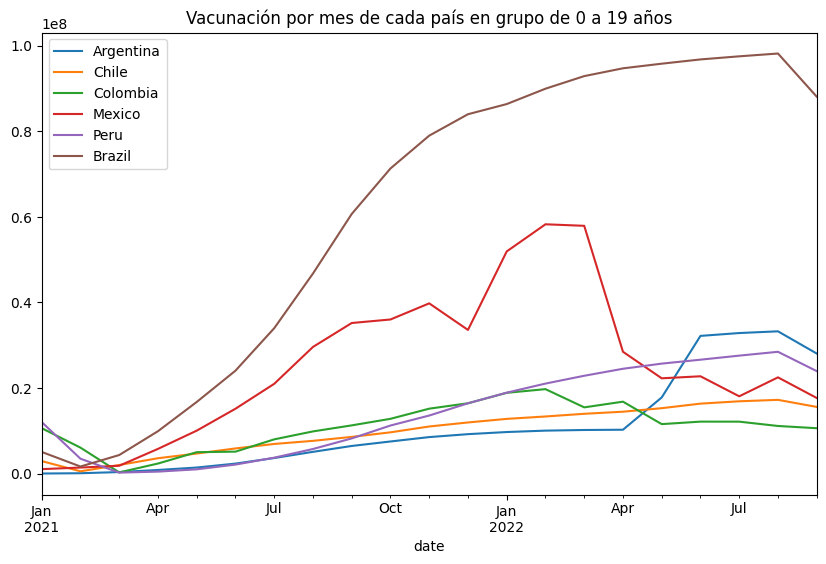

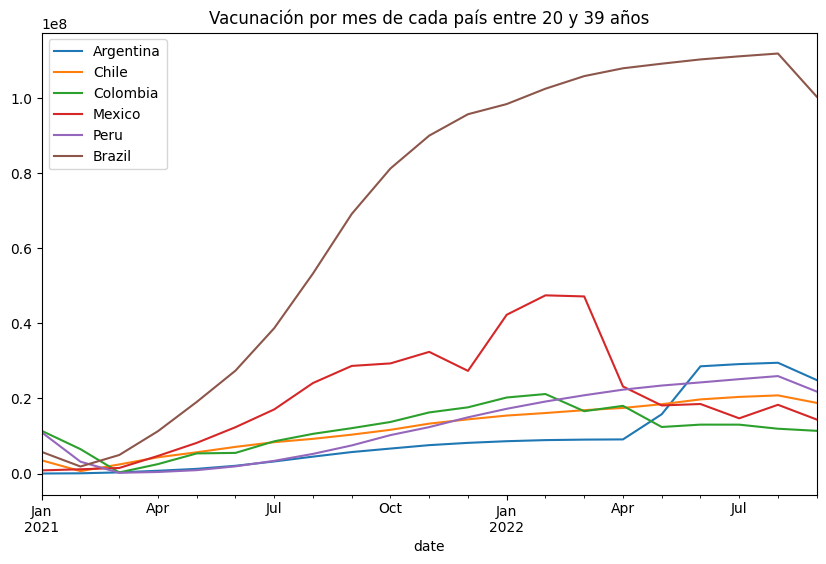

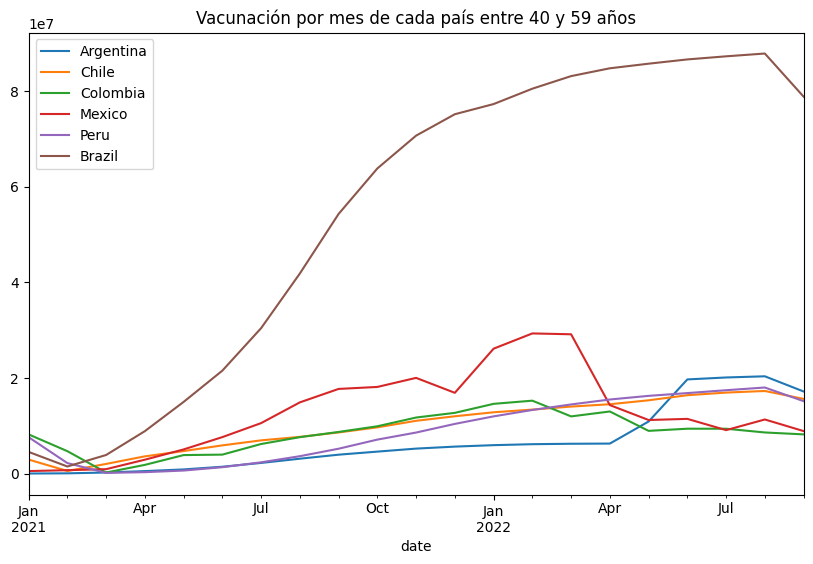

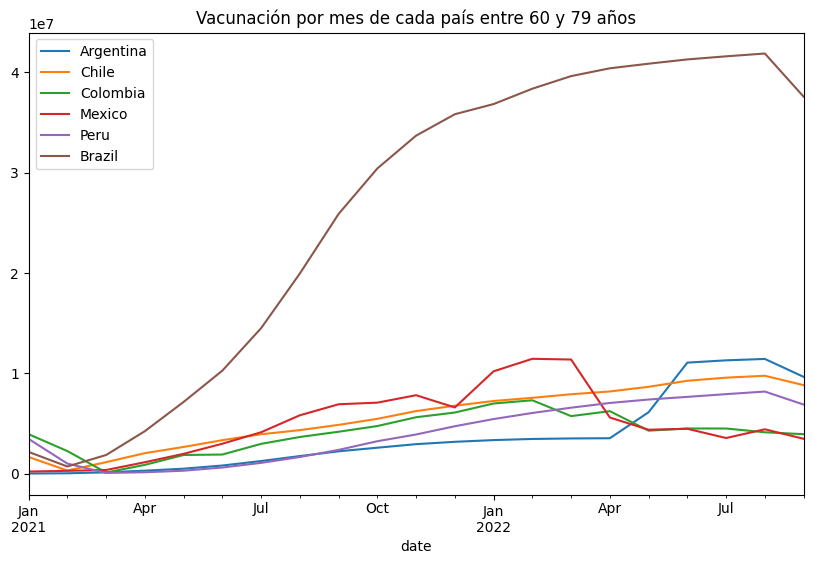

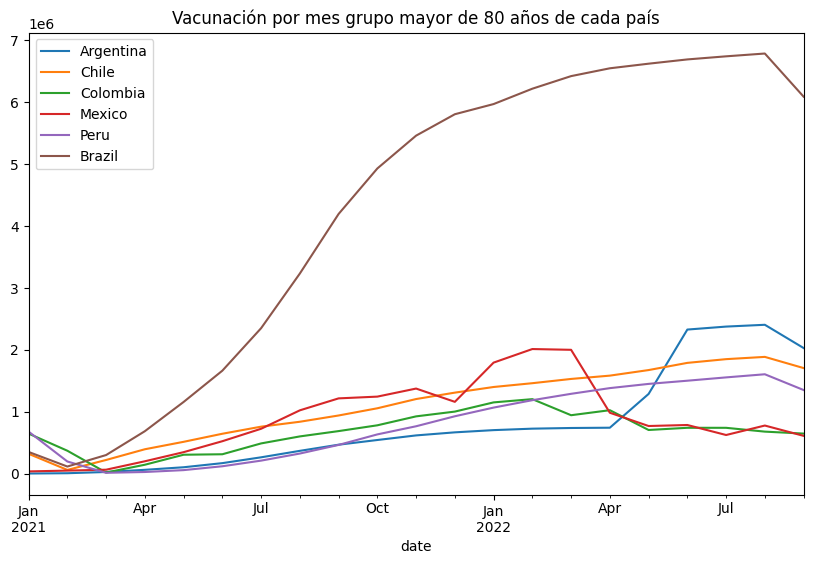

In [ ]:
# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))

for pais in paises_seleccionados:                 #Itera sobre la lista de países seleccionados.
    #A continuacion filtra los datos para c/pais // resamplea los datos mensualmente y calcula la media 
    # y grafica los datos del grupo de edad 0-19 años.
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_00_19_vacunados'].plot()
plt.title('Vacunación por mes de cada país en grupo de 0 a 19 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

#Este fragmento es similar al anterior, pero se centra en el grupo de edad 20-39 años
fig, ax = plt.subplots(figsize=(10, 6))

for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_20_39_vacunados'].plot()
plt.title('Vacunación por mes de cada país entre 20 y 39 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_40_59_vacunados'].plot()
plt.title('Vacunación por mes de cada país entre 40 y 59 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_60_79_vacunados'].plot()
plt.title('Vacunación por mes de cada país entre 60 y 79 años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['population_age_80_and_older_vacunados'].plot()
plt.title('Vacunación por mes grupo mayor de 80 años de cada país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Revisemos la mortalidad por genero para identificar la población más vulnerable en cada país, con esto ya podriamos tener una idea de cuál serían la población a vacunar primero.

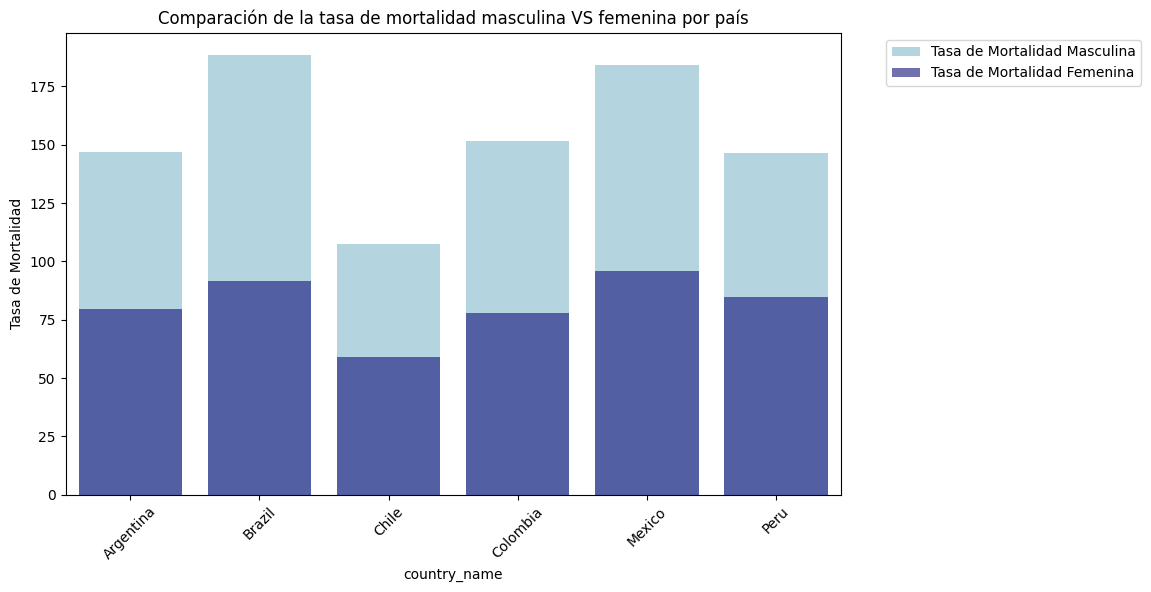

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ... (tu código existente para cargar los datos)

plt.figure(figsize=(10, 6))

sns.barplot(data=data_latinoamerica_paises, 
             x='country_name', 
             y='adult_male_mortality_rate', 
             color='lightblue', 
             label='Tasa de Mortalidad Masculina')

sns.barplot(data=data_latinoamerica_paises, 
             x='country_name', 
             y='adult_female_mortality_rate', 
             color='darkblue', 
             alpha=0.6, 
             label='Tasa de Mortalidad Femenina')

plt.xticks(rotation=45)
plt.ylabel('Tasa de Mortalidad')
plt.title('Comparación de la tasa de mortalidad masculina VS femenina por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

De acuerdo a la gráfica de mortalidad, se puede observar que en todos los paises la cantidad de muertes es mayor en los hombres que en las mujeres, por lo que se podría decir que los hombres son más vulnerables a la enfermedad o están menos protegidos.

Y si vemos las enfermedades preexistentes o comorbilidades? Podríamos ver si hay alguna enfermedad que sea más común en los paises seleccionados y que haya causado más muertes.

Veamos a ver si existe de una manera mas detallada la variables y la correlación entre ellas.

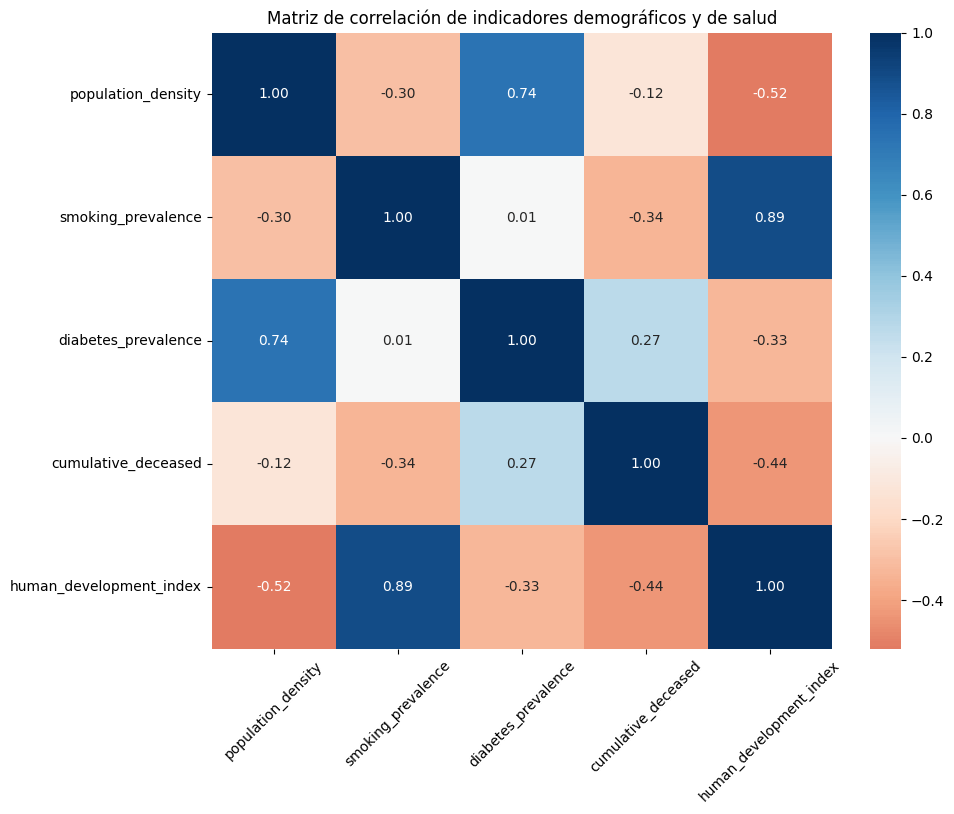

In [ ]:
# Selecciono las variables númericas que quiero correlacionar:
columns = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']
correlation_matrix = data_latinoamerica_paises[columns].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f',  # Formatea los valores como porcentajes con 2 decimales
            cmap='RdBu',  # Paleta de colores rojo-azul divergente
            center=0)

plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.xticks(rotation=45)
plt.yticks(rotation=0)  # Rota las etiquetas del eje y para mejor visualización
plt.show()

De esta matriz podemos observar que el fumar y tener diabetes son las enfermedades preexistentes que más afectan a la población en los paises seleccionados, por lo que se podría decir que estas enfermedades son las que más han causado muertes en los paises seleccionados, sin embargo esto no quiere decir que sean las únicas enfermedades que han causado muertes sino que son las más comúnes.

De acuerdo a esto veamos se comporta la mortalidad en los paises seleccionados por enfermedades preexistentes o comorbilidades.

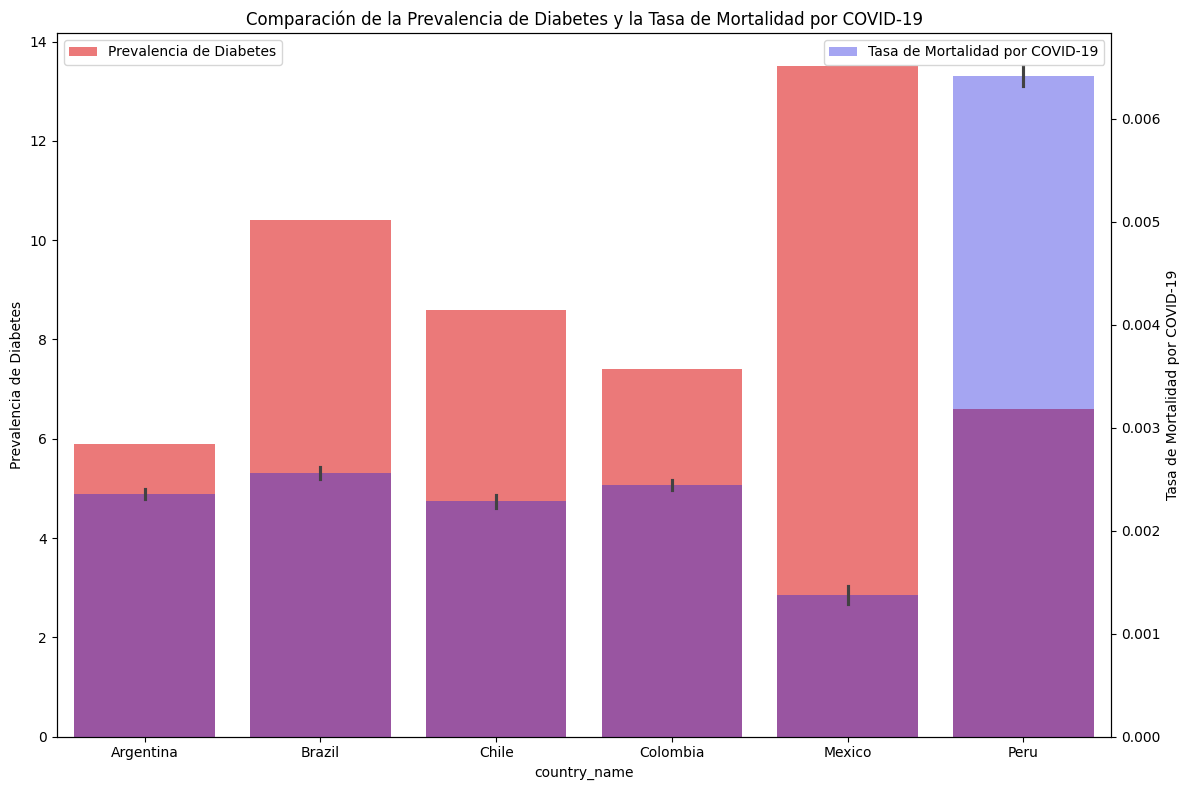

In [ ]:
# gráfico de barras dual utilizando Matplotlib y Seaborn 

# para comparar la prevalencia de diabetes y la tasa de mortalidad por COVID-19 en varios países. 



fig, ax = plt.subplots(1, 1, figsize=(12, 8))



#GRAFICO DE BARRAS PARA PREVALENCIA DE DIABETES:

sns.barplot(data=data_latinoamerica_paises, #Utiliza Seaborn para crear un gráfico de barras.
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['diabetes_prevalence'], 
            color='red', 
            label='Prevalencia de Diabetes',
            ax=ax, #Especifica el eje en el que se dibujarán las barras.
            alpha=0.6

)



ax2 = ax.twinx()  #Crea un segundo eje (ax2) que comparte el mismo eje x que el primer eje (ax). 

#Esto permite superponer dos gráficos con diferentes escalas en el eje y.



# Crear un segundo eje y el gráfico de barras para la tasa de mortalidad por COVID-19:

sns.barplot(data=data_latinoamerica_paises,
            x= data_latinoamerica_paises['country_name'], 
            y= data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population'], #Calcula la tasa de mortalidad por COVID-19 
            #dividiendo el número total de fallecidos por la población total de CADA país.
            color='blue', 
            label='Tasa de Mortalidad por COVID-19', 
            ax=ax2, #Especifica el segundo eje en el que se dibujarán las barras.
            alpha=0.4)



plt.xticks(rotation=90) #rota etiquetas

ax.set_ylabel('Prevalencia de Diabetes') #Añade una etiqueta al eje y del primer gráfico (prevalencia de diabetes).

ax.legend(loc='upper left') #Añade una leyenda para el primer gráfico en la esquina superior izquierda.

ax2.legend(loc='upper right') #Añade una leyenda para el segundo gráfico en la esquina superior derecha.

ax2.set_ylabel('Tasa de Mortalidad por COVID-19') #Añade una etiqueta al eje y del segundo gráfico (tasa de mortalidad por COVID-19).

plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19')

plt.tight_layout()

plt.show()

En los países seleccionados, tanto fumar como la diabetes presentan un comportamiento similar en términos de impacto en la mortalidad. No obstante, se observa que la diabetes ha sido la principal causa de muertes, superando al tabaquismo, que sigue en segundo lugar."

CONCLUSION

Podemos concluir que los países que más necesitan ayuda son Brasil, México y Colombia. Estos países presentan el mayor número de casos confirmados y también las tasas más altas de mortalidad. Además, se encuentran entre los países con menor número de vacunas administradas, lo que agrava aún más la situación sanitaria.

#### Factores de Riesgo
Los factores de riesgo más significativos que han afectado a la población en los países seleccionados son: fumar y presentar diabetes. Estos factores parecen estar correlacionados con un mayor número de muertes, lo que sugiere que las personas con estos antecedentes son más vulnerables a sufrir complicaciones severas. Es importante destacar que, aunque fumar y la diabetes son los factores más comunes y de los que disponemos datos, no son las únicas condiciones que han contribuido a la mortalidad. Sin embargo, su prevalencia y la gravedad de sus consecuencias hacen que se destaquen en el análisis.

# **AVANCE 3**

### ANALISIS EXPLORATORIO DE DATOS con Numpy y Pandas:

In [ ]:
# Carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

3
Realizamos un ANALISIS EXPLORATORIO detallado utilizando técnicas avanzadas de Pandas y Numpy, centrándote en el análisis de series temporales para comprender la evolución de elementos específicos del conjunto de datos. Para ello, puedes empezar por identificar tendencias, estacionalidad y patrones temporales relevantes, análisis de autocorrelación y descomposición de series temporales. 

In [ ]:
data_latinoamerica_paises = pd.read_csv('DatosFinalesFiltrado.csv')
data_latinoamerica_paises

location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-02           AR    Argentina    7767.000000   
1              AR  2021-01-03           AR    Argentina    4934.000000   
2              AR  2021-01-04           AR    Argentina   13953.000000   
3              AR  2021-01-05           AR    Argentina   14085.000000   
4              AR  2021-01-06           AR    Argentina   14496.000000   
...           ...         ...          ...          ...            ...   
3739           PE  2022-09-13           PE         Peru    1150.000000   
3740           PE  2022-09-14           PE         Peru   12911.385484   
3741           PE  2022-09-15           PE         Peru   12911.385484   
3742           PE  2022-09-16           PE         Peru   12911.385484   
3743           PE  2022-09-17           PE         Peru   12911.385484   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0       166.000000          1.670634e+06         46688.000000   
1       157.000000          1.675568e+06         46845.000000   
2       157.000000          1.689521e+06         47002.000000   
3       160.000000          1.703606e+06         47162.000000   
4       131.000000          1.718102e+06         47293.000000   
...            ...                   ...                  ...   
3739     22.000000          4.127612e+06        216173.000000   
3740    134.379032          6.079579e+06        105716.119355   
3741    134.379032          6.079579e+06        105716.119355   
3742    134.379032          6.079579e+06        105716.119355   
3743    134.379032          6.079579e+06        105716.119355   

      cumulative_vaccine_doses_administered  population  ...  \
0                              2.033400e+04  44938712.0  ...   
1                              2.052900e+04  44938712.0  ...   
2                              2.516400e+04  44938712.0  ...   
3                              2.985200e+04  44938712.0  ...   
4                              3.416200e+04  44938712.0  ...   
...                                     ...         ...  ...   
3739                           3.477897e+07  29381884.0  ...   
3740                           3.477897e+07  29381884.0  ...   
3741                           3.477897e+07  29381884.0  ...   
3742                           3.477897e+07  29381884.0  ...   
3743                           3.477897e+07  29381884.0  ...   

      population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0                  15057273.0         2690269.0           55032.0   
1                  15057273.0         2690269.0           55032.0   
2                  15057273.0         2690269.0           55032.0   
3                  15057273.0         2690269.0           55032.0   
4                  15057273.0         2690269.0           55032.0   
...                       ...               ...               ...   
3739               10554712.0         1256339.0           16425.0   
3740               10554712.0         1256339.0           16425.0   
3741               10554712.0         1256339.0           16425.0   
3742               10554712.0         1256339.0           16425.0   
3743               10554712.0         1256339.0           16425.0   

      life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0              76.520                    147.086                       79.483   
1              76.520                    147.086                       79.483   
2              76.520                    147.086                       79.483   
3              76.520                    147.086                       79.483   
4              76.520                    147.086                       79.483   
...               ...                        ...                          ...   
3739           76.516                    146.370                       84.815   
3740           76.516                    146.370                       84.815   
3741    

In [ ]:
data_latinoamerica_paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

In [ ]:
#convertimos date (objeto) a tipo datetime (fecha)
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])

data_latinoamerica_paises = data_latinoamerica_paises.set_index("date")   #y dejamos date como indice
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru   12911.385484   
2022-09-15           PE           PE         Peru   12911.385484   
2022-09-16           PE           PE         Peru   12911.385484   
2022-09-17           PE           PE         Peru   12911.385484   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    134.379032          6.079579e+06        105716.119355   
2022-09-15    134.379032          6.079579e+06        105716.119355   
2022-09-16    134.379032          6.079579e+06        105716.119355   
2022-09-17    134.379032          6.079579e+06        105716.119355   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                           2.033400e+04  44938712.0   
2021-01-03                           2.052900e+04  44938712.0   
2021-01-04                           2.516400e+04  44938712.0   
2021-01-05                           2.985200e+04  44938712.0   
2021-01-06                           3.416200e+04  44938712.0   
...                                           ...         ...   
2022-09-13                           3.477897e+07  29381884.0   
2022-09-14                           3.477897e+07  29381884.0   
2022-09-15                           3.477897e+07  29381884.0   
2022-09-16                           3.477897e+07  29381884.0   
2022-09-17                           3.477897e+07  29381884.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   
...                     ...  ...                      ...               ...   
2022-09-13       14450757.0  ...               10554712.0         1256339.0   
2022-09-14       14450757.0  ...               10554712.0         1256339.0   
2022-09-15       14450757.0  ...               10554712.0         1256339.0   
2022-09-16       14450757.0  ...               10554712.0         1256339.0   
2022-09-17       14450757.0  ...               10554712.0         1256339.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0           76.520                    147.086   
2021-01-03           55032.0           76.520                    147.086   
2021-01-04           550

In [ ]:
#creamos nueva columna week (numero de semana de cada fecha) 
data_latinoamerica_paises['week'] = data_latinoamerica_paises.index.isocalendar().week 
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru   12911.385484   
2022-09-15           PE           PE         Peru   12911.385484   
2022-09-16           PE           PE         Peru   12911.385484   
2022-09-17           PE           PE         Peru   12911.385484   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    134.379032          6.079579e+06        105716.119355   
2022-09-15    134.379032          6.079579e+06        105716.119355   
2022-09-16    134.379032          6.079579e+06        105716.119355   
2022-09-17    134.379032          6.079579e+06        105716.119355   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                           2.033400e+04  44938712.0   
2021-01-03                           2.052900e+04  44938712.0   
2021-01-04                           2.516400e+04  44938712.0   
2021-01-05                           2.985200e+04  44938712.0   
2021-01-06                           3.416200e+04  44938712.0   
...                                           ...         ...   
2022-09-13                           3.477897e+07  29381884.0   
2022-09-14                           3.477897e+07  29381884.0   
2022-09-15                           3.477897e+07  29381884.0   
2022-09-16                           3.477897e+07  29381884.0   
2022-09-17                           3.477897e+07  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2022-09-13       14450757.0  ...         1256339.0           16425.0   
2022-09-14       14450757.0  ...         1256339.0           16425.0   
2022-09-15       14450757.0  ...         1256339.0           16425.0   
2022-09-16       14450757.0  ...         1256339.0           16425.0   
2022-09-17       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

como primera aproximacion vamos a realizar un analisis del comportamiento de manera semanal y anual , para eso agrupamos los datos por semana y por año .

In [ ]:
# Filtramos el DataFrame por un rango de fechas
data_latinoamerica_paises_2021 = data_latinoamerica_paises.loc[     # Es un método de selección de datos en Pandas que permite acceder a un grupo de filas y columnas mediante etiquetas o una matriz booleana.
    (data_latinoamerica_paises.index >= '2021-01-01')     #Crea una serie booleana donde cada elemento indica si la fecha del índice es mayor o igual a 2021-01-01.
    &               # &  permite combinar las dos series booleanas 
    (data_latinoamerica_paises.index <= '2021-12-31')       #Crea una serie booleana donde cada elemento indica si la fecha del índice es menor o igual a 2021-12-31.
]
data_latinoamerica_paises_2021

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   
...                 ...          ...          ...            ...   
2021-12-27           PE           PE         Peru         3261.0   
2021-12-28           PE           PE         Peru         4270.0   
2021-12-29           PE           PE         Peru         4340.0   
2021-12-30           PE           PE         Peru         5220.0   
2021-12-31           PE           PE         Peru         4290.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   
...                  ...                   ...                  ...   
2021-12-27          29.0             2285854.0             202515.0   
2021-12-28          37.0             2290124.0             202552.0   
2021-12-29          40.0             2294464.0             202592.0   
2021-12-30          45.0             2299684.0             202637.0   
2021-12-31          37.0             2303974.0             202674.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   
...                                           ...         ...   
2021-12-27                             50186253.0  29381884.0   
2021-12-28                             50515554.0  29381884.0   
2021-12-29                             50800766.0  29381884.0   
2021-12-30                             51020490.0  29381884.0   
2021-12-31                             51092425.0  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2021-12-27       14450757.0  ...         1256339.0           16425.0   
2021-12-28       14450757.0  ...         1256339.0           16425.0   
2021-12-29       14450757.0  ...         1256339.0           16425.0   
2021-12-30       14450757.0  ...         1256339.0           16425.0   
2021-12-31       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

In [ ]:
#nuevo df que agrupe country name y week, y sume los casos nuevos confirmados y nuevas muertes/ reset indice, agrega indice por defecto
weekly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'week'])[['new_confirmed', 'new_deceased']].sum ().reset_index()
weekly_cases

country_name  week  new_confirmed  new_deceased
0      Argentina     1        85321.0        1093.0
1      Argentina     2        76129.0        1191.0
2      Argentina     3        66250.0        1321.0
3      Argentina     4        58524.0        1199.0
4      Argentina     5        50576.0        1112.0
..           ...   ...            ...           ...
313         Peru    49        10004.0         272.0
314         Peru    50        10637.0         265.0
315         Peru    51        11306.0         257.0
316         Peru    52        21381.0         188.0
317         Peru    53         3355.0         374.0

[318 rows x 4 columns]

A continuacion analizaremos como evolucionan los casos de COVID en America Latina a lo largo del tiempo, por semana:

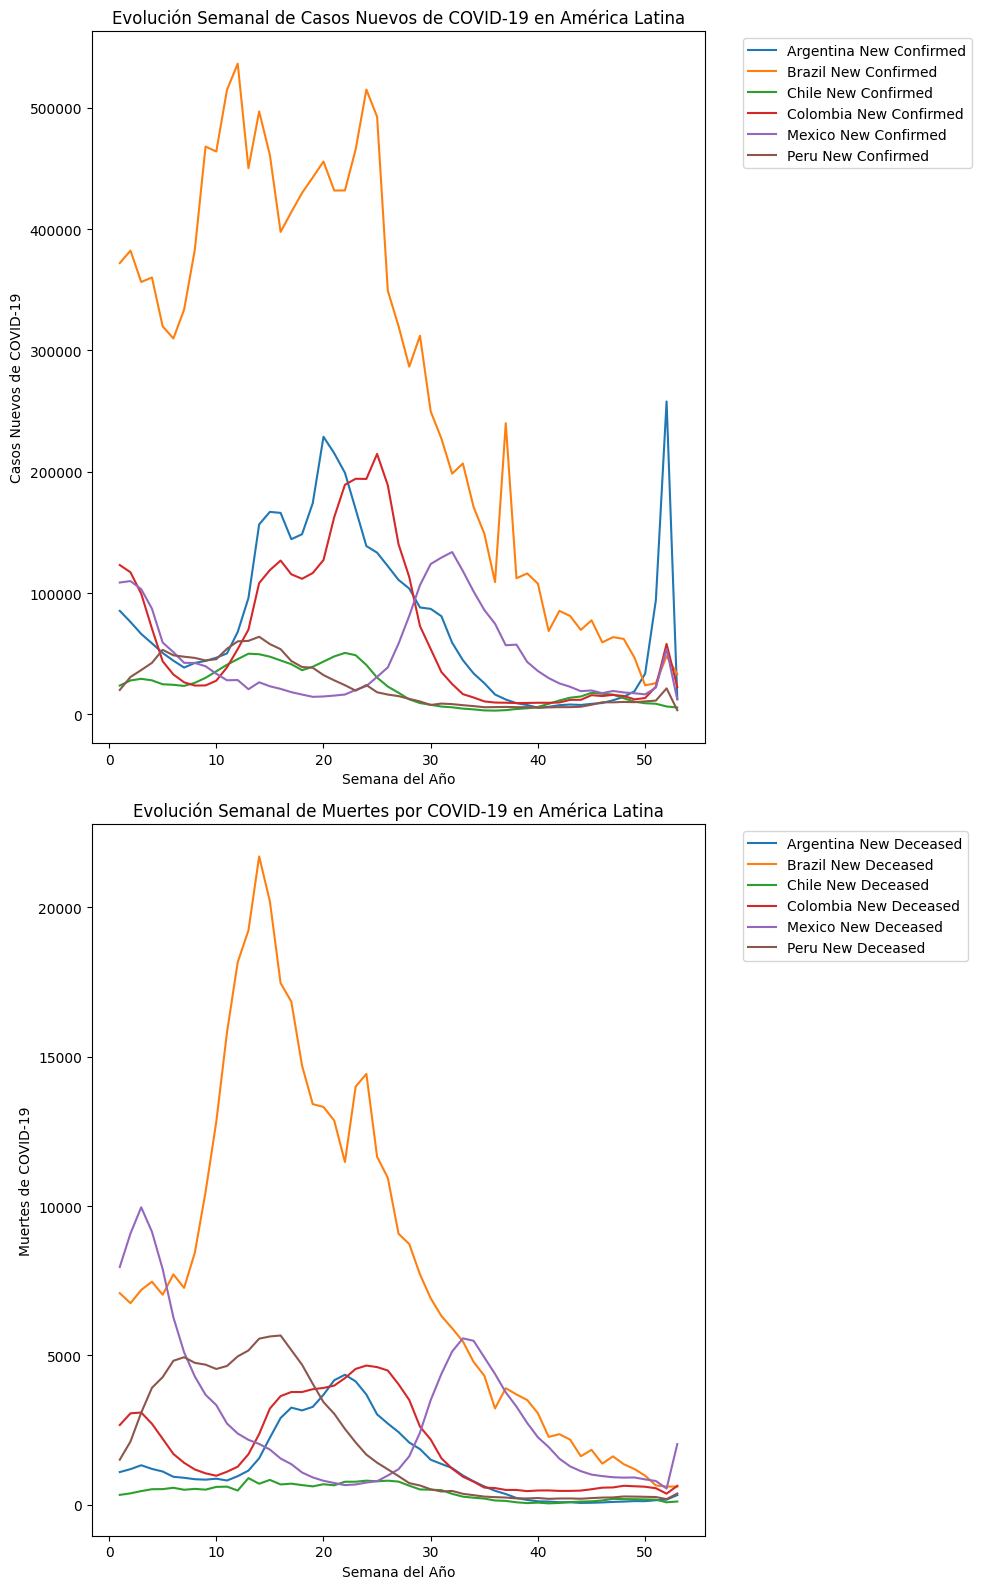

In [ ]:
# Vamos a analizar como evolucionan los casos de COVID-19 en América Latina a lo largo del tiempo por semana

weekly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'week'])[['new_confirmed', 'new_deceased']].sum().reset_index()  
# Agrupamos los datos por semana y país (agrupan las filas que tienen el mismo país y la misma semana.)
# y Calcula la suma de los nuevos casos confirmados 

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(10, 16))  #Crea una figura con dos ejes (ax) dispuestos en una columna y dos filas.
# El tamaño de la figura es de 10 pulgadas de ancho y 16 pulgadas de alto. Esto crea dos subgráficos apilados verticalmente.

for country in weekly_cases['country_name'].unique():     #Itera sobre cada país único en el DataFrame weekly_cases
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]   #Filtra los datos para el país actual.
    
    # configuramos a continuacion los ejes y las leyendas:
    ax[0].plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=f'{country} New Confirmed')
    # ax[0] Grafica los nuevos casos confirmados (new_confirmed) en el primer eje (ax[0]) para cada país. La etiqueta de la línea incluye el nombre del país y el texto "New Confirmed".
    ax[1].plot(country_weekly_cases['week'], country_weekly_cases['new_deceased'], label=f'{country} New Deceased')
    # ax[1] Grafica los nuevos fallecidos (new_deceased) en el segundo eje (ax[1]) para cada país. La etiqueta de la línea incluye el nombre del país y el texto "New Deceased"

ax[0].set_xlabel('Semana del Año')
ax[0].set_ylabel('Casos Nuevos de COVID-19')
ax[0].set_title('Evolución Semanal de Casos Nuevos de COVID-19 en América Latina')
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel('Semana del Año')
ax[1].set_ylabel('Muertes de COVID-19')
ax[1].set_title('Evolución Semanal de Muertes por COVID-19 en América Latina')
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()   #Ajusta automáticamente los parámetros de la figura para que todo encaje bien y no haya solapamiento de elementos.
plt.show()


El código anterior crea 2 gráficos de líneas verticalmente apilados que muestran la evolución semanal de los casos nuevos de COVID-19 y las muertes por COVID-19 en América Latina durante el año 2021. Cada gráfico muestra las líneas para todos los países seleccionados, con un gráfico para casos confirmados y otro para muertes. Las leyendas se colocan fuera de los gráficos a la derecha para no obstruir los datos.

C:\Users\KIM\AppData\Local\Temp\ipykernel_29328\2037798592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_2021['month'] = data_latinoamerica_paises_2021.index.month  #Extrae el mes del índice de fechas.


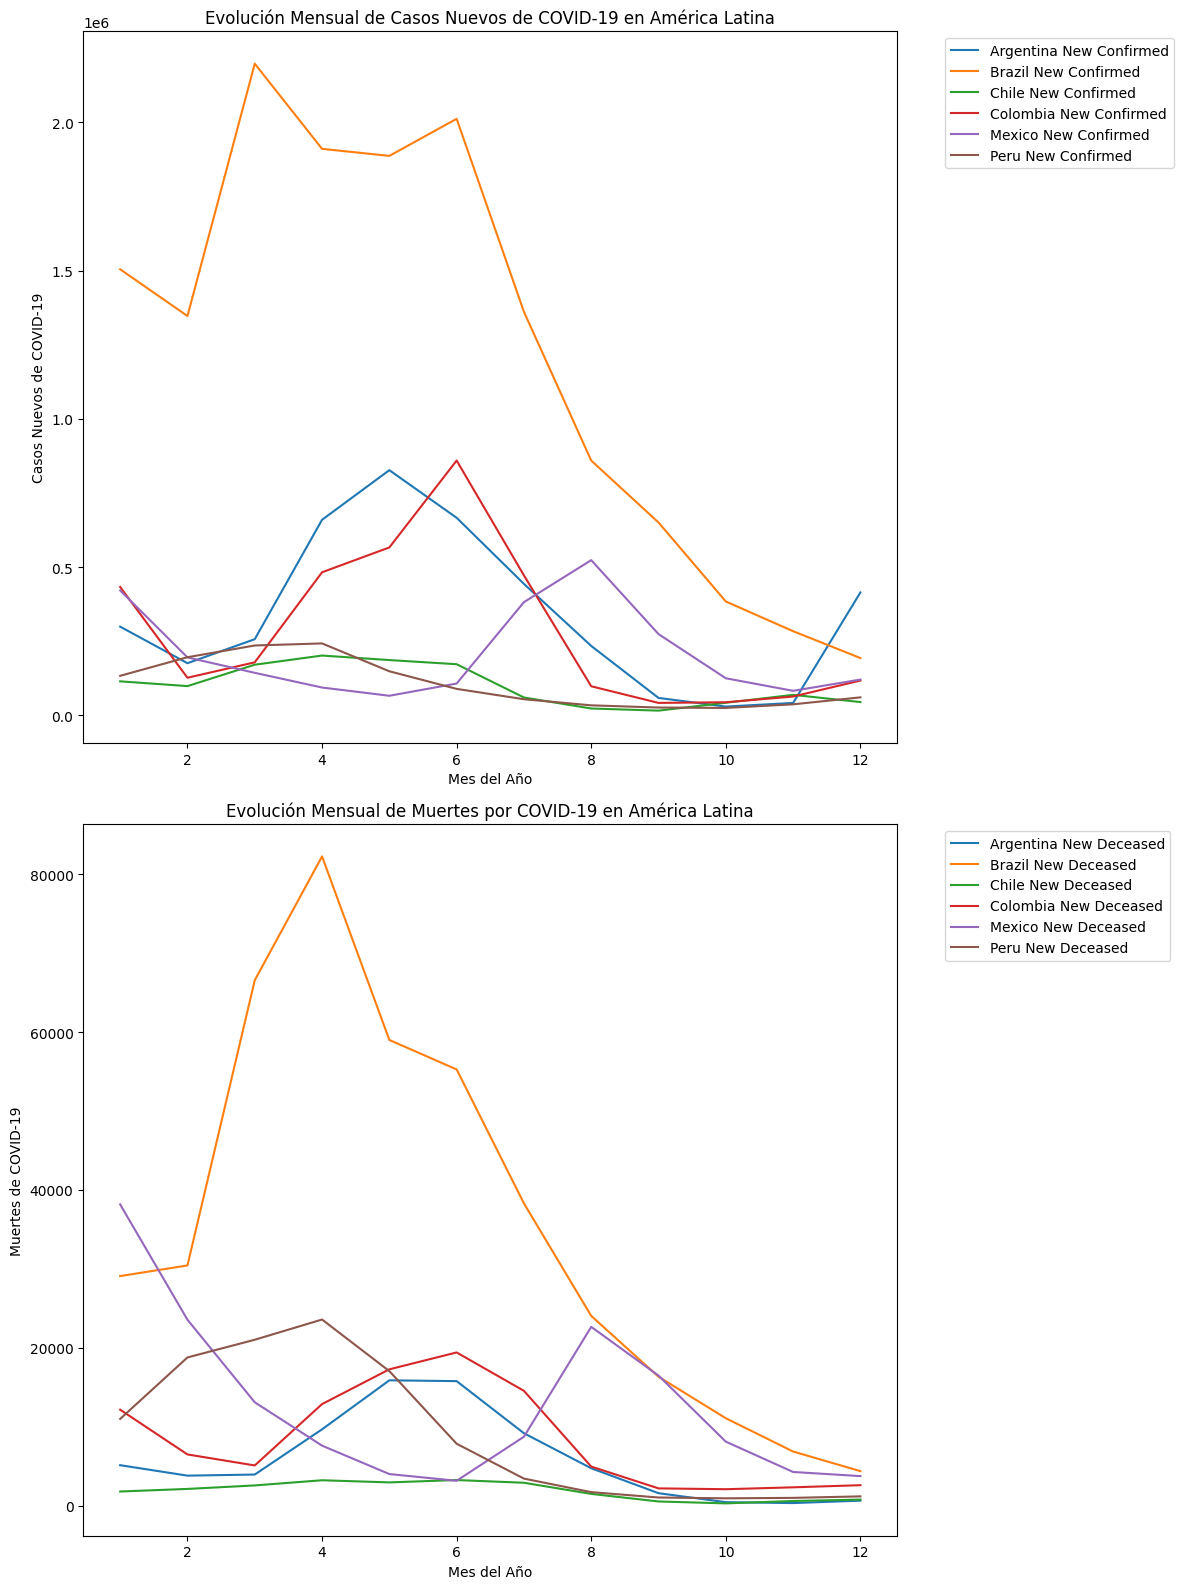

In [ ]:
# Ahora por vamos por año
data_latinoamerica_paises_2021['month'] = data_latinoamerica_paises_2021.index.month  #Extrae el mes del índice de fechas.

yearly_cases = data_latinoamerica_paises_2021.groupby(['country_name', 'month'])[['new_confirmed', 'new_deceased']].sum().reset_index()
#Agrupa los datos por país y mes. Esto significa que se agrupan las filas que tienen el mismo país y el mismo mes. 
#Calcula la suma de los nuevos casos confirmados y fallecidos por mes y país.
# Restablece el índice del DataFrame, convirtiendo los índices de grupo (país y mes) en columnas regulares.

fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(12, 16))   #Crea una figura con dos ejes (ax) dispuestos en una columna y dos filas. El tamaño de la figura es de 12 pulgadas de ancho y 16 pulgadas de alto. Esto crea dos subgráficos apilados verticalmente.

for country in yearly_cases['country_name'].unique():     #Itera sobre cada país único en el DataFrame yearly_cases.
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]   #Filtra los datos para el país actual.
    
    ax[0].plot(country_yearly_cases['month'], country_yearly_cases['new_confirmed'], label=f'{country} New Confirmed')
    # Grafica los nuevos casos confirmados (new_confirmed) en el primer eje (ax[0]) para cada país. La etiqueta de la línea incluye el nombre del país y el texto "New Confirmed".
    
    ax[1].plot(country_yearly_cases['month'], country_yearly_cases['new_deceased'], label=f'{country} New Deceased')
    #Grafica los nuevos fallecidos (new_deceased) en el segundo eje (ax[1]) para cada país. La etiqueta de la línea incluye el nombre del país y el texto "New Deceased".

ax[0].set_xlabel('Mes del Año')
ax[0].set_ylabel('Casos Nuevos de COVID-19')
ax[0].set_title('Evolución Mensual de Casos Nuevos de COVID-19 en América Latina')
ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].set_xlabel('Mes del Año')
ax[1].set_ylabel('Muertes de COVID-19')
ax[1].set_title('Evolución Mensual de Muertes por COVID-19 en América Latina')
ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


4 Genera gráficas acordes a tu análisis. 
Las mismas pueden ser:
Evolución de Casos Activos vs. Recuperados
Tasa de Crecimiento (%)
Relación entre la Cobertura de Vacunación y la Reducción de Casos
('País') Progreso de la vacunación por país
Nuevos casos y temperatura promedio
Impacto de la Urbanización en la Propagación del Covid-19
Evolución Semanal de Casos Nuevos
Evolución Anual de Casos Nuevos
Distribución de la Población por Edad en Países
Comparación de Estrategias de Vacunación en América Latina
Evolución del Número de Muertes Diarias.
Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad
Variación Mensual de Casos y Muertes
Análisis Temporal de la Mortalidad/
Comparación de la Situación Actual (Contexto de los datos)


In [ ]:
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina    7767.000000   
2021-01-03           AR           AR    Argentina    4934.000000   
2021-01-04           AR           AR    Argentina   13953.000000   
2021-01-05           AR           AR    Argentina   14085.000000   
2021-01-06           AR           AR    Argentina   14496.000000   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru    1150.000000   
2022-09-14           PE           PE         Peru   12911.385484   
2022-09-15           PE           PE         Peru   12911.385484   
2022-09-16           PE           PE         Peru   12911.385484   
2022-09-17           PE           PE         Peru   12911.385484   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02    166.000000          1.670634e+06         46688.000000   
2021-01-03    157.000000          1.675568e+06         46845.000000   
2021-01-04    157.000000          1.689521e+06         47002.000000   
2021-01-05    160.000000          1.703606e+06         47162.000000   
2021-01-06    131.000000          1.718102e+06         47293.000000   
...                  ...                   ...                  ...   
2022-09-13     22.000000          4.127612e+06        216173.000000   
2022-09-14    134.379032          6.079579e+06        105716.119355   
2022-09-15    134.379032          6.079579e+06        105716.119355   
2022-09-16    134.379032          6.079579e+06        105716.119355   
2022-09-17    134.379032          6.079579e+06        105716.119355   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                           2.033400e+04  44938712.0   
2021-01-03                           2.052900e+04  44938712.0   
2021-01-04                           2.516400e+04  44938712.0   
2021-01-05                           2.985200e+04  44938712.0   
2021-01-06                           3.416200e+04  44938712.0   
...                                           ...         ...   
2022-09-13                           3.477897e+07  29381884.0   
2022-09-14                           3.477897e+07  29381884.0   
2022-09-15                           3.477897e+07  29381884.0   
2022-09-16                           3.477897e+07  29381884.0   
2022-09-17                           3.477897e+07  29381884.0   

            population_male  ...  area_rural_sq_km  area_urban_sq_km  \
date                         ...                                       
2021-01-02       19523766.0  ...         2690269.0           55032.0   
2021-01-03       19523766.0  ...         2690269.0           55032.0   
2021-01-04       19523766.0  ...         2690269.0           55032.0   
2021-01-05       19523766.0  ...         2690269.0           55032.0   
2021-01-06       19523766.0  ...         2690269.0           55032.0   
...                     ...  ...               ...               ...   
2022-09-13       14450757.0  ...         1256339.0           16425.0   
2022-09-14       14450757.0  ...         1256339.0           16425.0   
2022-09-15       14450757.0  ...         1256339.0           16425.0   
2022-09-16       14450757.0  ...         1256339.0           16425.0   
2022-09-17       14450757.0  ...         1256339.0           16425.0   

            life_expectancy  adult_male_mortality_rate  \
date                                                     
2021-01-02           76.520                    147.086   
2021-01-03           76.520                    147.086   
2021-01-04           76.520                    147.086   
2021-01-05           76.520                    147.086   
2021-01-06           76.520                    147.086   
...          

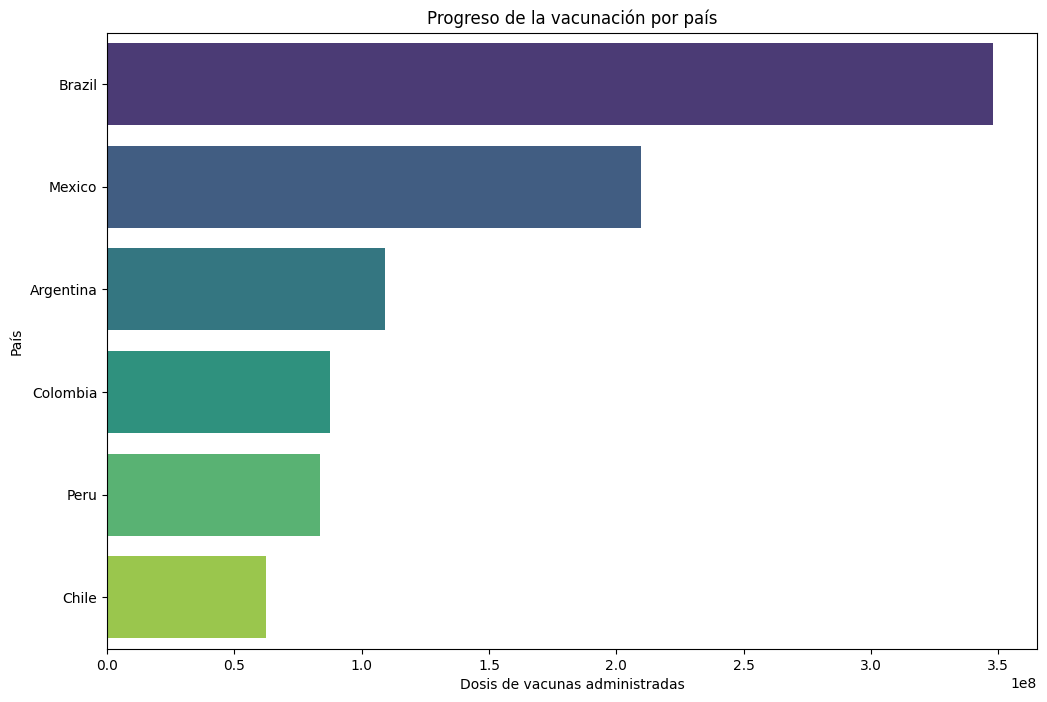

In [ ]:
# Este código crea un gráfico de barras que muestra la cantidad máxima ..
# de dosis de vacunas administradas por país en América Latina, utilizando datos agrupados del DataFrame 
vaccination_data = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)
#Agrupa los datos por el nombre del país.
#Selecciona la columna que contiene el número acumulado de dosis de vacunas administradas.
#Calcula el valor máximo de dosis de vacunas administradas para cada país.
# ordena (descendente)


plt.figure(figsize=(12, 8))

sns.barplot(                        #crea un gráfico de barras utilizando Seaborn
    x=vaccination_data.values,          #número de dosis de vacunas administradas.
    y=vaccination_data.index,           #nombres de los países.
    hue=vaccination_data.index,         #Se utiliza para diferenciar visualmente las barras por país. 
    palette='viridis')
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('País')
plt.title('Progreso de la vacunación por país')

plt.show()


El país con mayor dosis administradas es Brasil, seguido de México, Argentina, Colombia, Chile y Perú. Se contradice con los hallazgos anteriores sin embargo recordemos que se debe tener en cuenta la población de cada país y la cantidad de vacunas disponibles.

### Y la temperatura como se comporta en los paises seleccionados ? 

### Nuevos casos y temperaturas promedio: 
El siguiente código crea un gráfico con dos ejes y diferentes conjuntos de datos en el mismo gráfico. 
Uno de los ejes muestra la relación entre los nuevos casos confirmados de COVID-19 y la fecha, 
mientras que el otro eje muestra la relación entre la temperatura promedio y la fecha.

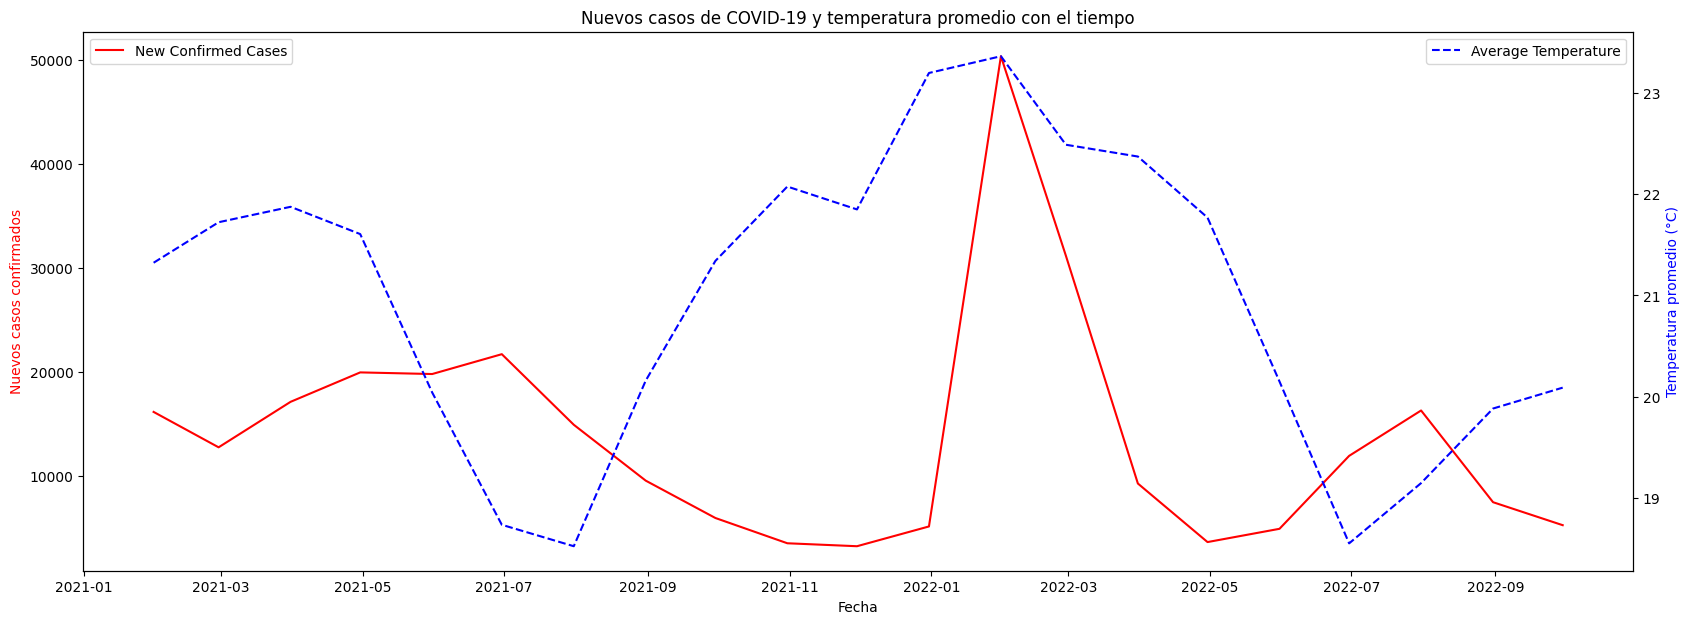

In [ ]:

# Nuevos casos y temperatura promedio
# Graficamos la relación entre la temperatura promedio y los nuevos casos confirmados de COVID-19

plt.figure(figsize=(20, 7))

ax1 = plt.gca() # Obtiene el eje actual de la gráfica y lo asigna a ax1.
ax2 = ax1.twinx() # Crea un segundo eje y que comparte el mismo x que ax1, permitiendo graficar dos conjuntos de datos con diferentes escalas y unidades.

ax1.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'], 
         color='red', 
         label= 'New Confirmed Cases')
#Este método re-muestrea los datos para obtener el promedio mensual (ME significa "mes"), calculando la media solo para las columnas numéricas.
# Grafica los nuevos casos confirmados en el eje ax1 con una línea roja.

ax2.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['average_temperature_celsius'], color='blue', label='Average Temperature',linestyle='--')
# Grafica la temperatura promedio en el eje ax2 con una línea azul y estilo de línea discontinua.

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='red')
ax2.set_ylabel('Temperatura promedio (°C)', color='blue')
plt.title('Nuevos casos de COVID-19 y temperatura promedio con el tiempo')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Podemos observar que la temperatura promedio ha ido aumentando y los casos confirmados han ido disminuyendo , sin embargo hubo un pico antes del mes de marzo pero disminuyo rapidamente, esto puede ser por la cantidad de vacunas administradas o por la cantidad de personas que se han vacunado. 

### Cada pais tiene un impacto debido a la urbanizacion y la densidad de poblacion , por lo que vamos a analizar la densidad de poblacion de cada pais 

In [ ]:
data_latinoamerica_paises.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

In [ ]:
# se utiliza para ajustar cómo se muestran los números de punto flotante (decimales) en los DataFrames y otros objetos de Pandas.
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
data_latinoamerica_paises[["population","population_urban","cumulative_confirmed"]]

population  population_urban  cumulative_confirmed
date                                                          
2021-01-02 44938712.00       41339571.00            1670634.00
2021-01-03 44938712.00       41339571.00            1675568.00
2021-01-04 44938712.00       41339571.00            1689521.00
2021-01-05 44938712.00       41339571.00            1703606.00
2021-01-06 44938712.00       41339571.00            1718102.00
...                ...               ...                   ...
2022-09-13 29381884.00       25390339.00            4127612.00
2022-09-14 29381884.00       25390339.00            6079578.72
2022-09-15 29381884.00       25390339.00            6079578.72
2022-09-16 29381884.00       25390339.00            6079578.72
2022-09-17 29381884.00       25390339.00            6079578.72

[3744 rows x 3 columns]

In [ ]:
# -Impacto de la Urbanización en la Propagación del Covid-19

# Calculamos el porcentaje de población urbana:
data_latinoamerica_paises['urban_population_percentage'] = data_latinoamerica_paises['population_urban'] / data_latinoamerica_paises['population']
#Se crea una nueva columna urban_population_percentage en el DataFrame data_latinoamerica_paises.
#  La nueva columna se obtiene dividiendo la columna population_urban (población urbana) por la columna population (población total).

#Calcular el porcentaje de casos confirmados en relación a la población total:
data_latinoamerica_paises['confirmed_population_percentage'] = data_latinoamerica_paises['cumulative_confirmed'] / data_latinoamerica_paises['population']
#Se crea otra nueva columna confirmed_population_percentage en el DataFrame.
#La nueva columna se obtiene dividiendo la columna cumulative_confirmed (casos confirmados acumulados) por la columna population.

# Obtenemos el último registro disponible para cada país y ordenarlos por el porcentaje de población urbana:
urban_cases = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_percentage')
urban_cases
#Se agrupa el DataFrame data_latinoamerica_paises por la columna country_name (nombre del país) utilizando el método groupby.
#Se selecciona el último registro de cada grupo utilizando el método last().
#Se ordenan los resultados por la columna urban_population_percentage utilizando el método sort_values.

location_key country_code  new_confirmed  new_deceased  \
country_name                                                          
Colombia               CO           CO       12911.39        134.38   
Brazil                 BR           BR       12911.39        134.38   
Peru                   PE           PE       12911.39        134.38   
Argentina              AR           AR       12911.39        134.38   
Mexico                 MX           MX       12911.39        134.38   
Chile                  CL           CL       12911.39        134.38   

              cumulative_confirmed  cumulative_deceased  \
country_name                                              
Colombia                6079578.72            105716.12   
Brazil                  6079578.72            105716.12   
Peru                    6079578.72            105716.12   
Argentina               6079578.72            105716.12   
Mexico                  6079578.72            105716.12   
Chile                   6079578.72            105716.12   

              cumulative_vaccine_doses_administered   population  \
country_name                                                       
Colombia                                34778965.87  50882884.00   
Brazil                                  34778965.87 212559409.00   
Peru                                    34778965.87  29381884.00   
Argentina                               34778965.87  44938712.00   
Mexico                                  34778965.87 110991953.00   
Chile                                   34778965.87  17574003.00   

              population_male  population_female  ...  life_expectancy  \
country_name                                      ...                    
Colombia          24984564.00        25898320.00  ...            77.11   
Brazil           104435783.00       108123626.00  ...            75.67   
Peru              14450757.00        14931127.00  ...            76.52   
Argentina         19523766.00        20593330.00  ...            76.52   
Mexico            54855231.00        57481307.00  ...            74.99   
Chile              8972014.00         8601989.00  ...            80.04   

              adult_male_mortality_rate  adult_female_mortality_rate  \
country_name                                                           
Colombia                         151.62                        78.00   
Brazil                           188.53                        91.42   
Peru                             146.37                        84.81   
Argentina                        147.09                        79.48   
Mexico                           184.38                        95.81   
Chile                            107.67                        59.03   

              pollution_mortality_rate  comorbidity_mortality_rate  \
country_name                                                         
Colombia                         37.00                       15.80   
Brazil                           29.90                       16.60   
Peru                             63.90                       12.60   
Argentina                        26.60                       15.80   
Mexico                           36.70                       15.70   
Chile                            25.30                       12.40   

              new_recovered  cumulative_recovered  week  \
country_name                                              
Colombia               0.00                  0.00    37   
Brazil                 0.00                  0.00    37   
Peru                   0.00                  0.00    37   
Argentina              0.00                  0.00    37   
Mexico                 0.00                  0.00    37   
Chile                  0.00                  0.00    37   

              urban_population_percentage  confirmed_population_percentage  
country_name                                                                
Colombia                             0.80                           

### Creamos un gráfico de barras que compara el porcentaje de población urbana y el porcentaje de casos confirmados de COVID-19 en varios países de América Latina:

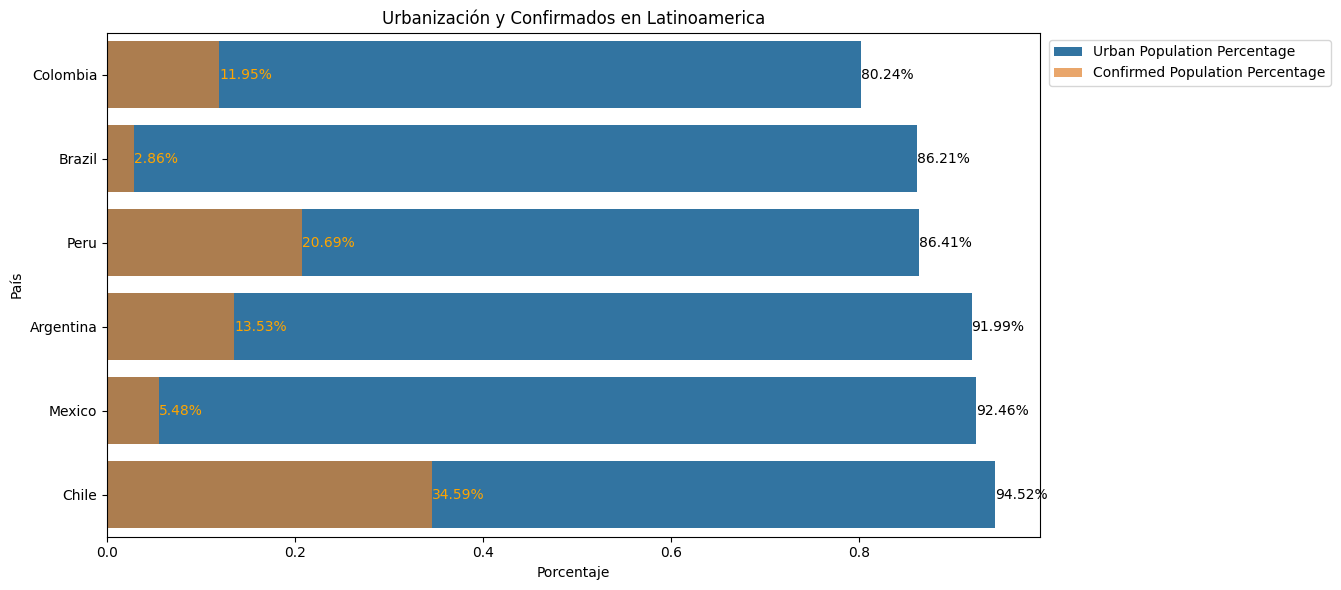

In [ ]:
# Crear una figura y un gráfico de barras para visualizar el porcentaje de población urbana:
plt.figure(figsize=(14, 6))

ax = sns.barplot(               #crea grafico barras
    x='urban_population_percentage',     #porcentaje de población urbana.
    y=urban_cases.index, data=urban_cases,   #nombres de los países.
    label='Urban Population Percentage')

# Añadir etiquetas a cada barra para urban_population_percentage
#Usar un bucle for para iterar sobre los valores de urban_population_percentage
for index, value in enumerate(urban_cases['urban_population_percentage']):    
    ax.text(value,                  # La posición en el eje x.
            index,                 # La posición en el eje y.
            f'{value*100:.2f}%',   #Formatea el valor del porcentaje multiplicado por 100 y lo muestra con dos decimales.
            color='black',              #color txt
            ha="left",                 #Alineación horizontal del texto a la izquierda.
            va="center")                #Alineación vertical del texto en el centro.

# Crear y Superponer la segunda barra para confirmed_population_percentage
ax2 = sns.barplot(                          # crea otro grafico de barras
    x='confirmed_population_percentage',     # porcentaje poblacion confirmada 
    y=urban_cases.index,                        #eje y muestra los nombres de los países.
    data=urban_cases,                           #Usa el DataFrame urban_cases para los datos.
    alpha=0.7, 
    label='Confirmed Population Percentage')

# Añadir etiquetas a cada barra para el porcentaje de población confirmada
for index, value in enumerate(urban_cases['confirmed_population_percentage']):
    ax2.text(value,             #añadir texto en la posición correspondiente a cada barra
             index, 
             f'{value*100:.2f}%',       #formatea el valor del porcentaje multiplicado por 100 y lo muestra con dos decimales.
             color='orange',                    #color txt 
             ha="left",                             #Alineación horizontal del texto a la izquierda.
             va="center")

plt.xlabel('Porcentaje')
plt.ylabel('País')
plt.title('Urbanización y Confirmados en Latinoamerica')
plt.legend(bbox_to_anchor=(1.32, 1), loc="upper right")
plt.tight_layout()
plt.show()

El pais con mayor impacto en la propagación fue chile, aunque es extraño ya que chile fue uno de los paises que mejor manejó la pandemia, sin embargo esto puede ser debido a la densidad de población en chile.

### Y la densidad de población por grupos de edad?

In [ ]:
#Cálculo del porcentaje de fallecidos:
data_latinoamerica_paises['deceased_percentage'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['population']
data_latinoamerica_paises

location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina        7767.00   
2021-01-03           AR           AR    Argentina        4934.00   
2021-01-04           AR           AR    Argentina       13953.00   
2021-01-05           AR           AR    Argentina       14085.00   
2021-01-06           AR           AR    Argentina       14496.00   
...                 ...          ...          ...            ...   
2022-09-13           PE           PE         Peru        1150.00   
2022-09-14           PE           PE         Peru       12911.39   
2022-09-15           PE           PE         Peru       12911.39   
2022-09-16           PE           PE         Peru       12911.39   
2022-09-17           PE           PE         Peru       12911.39   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02        166.00            1670634.00             46688.00   
2021-01-03        157.00            1675568.00             46845.00   
2021-01-04        157.00            1689521.00             47002.00   
2021-01-05        160.00            1703606.00             47162.00   
2021-01-06        131.00            1718102.00             47293.00   
...                  ...                   ...                  ...   
2022-09-13         22.00            4127612.00            216173.00   
2022-09-14        134.38            6079578.72            105716.12   
2022-09-15        134.38            6079578.72            105716.12   
2022-09-16        134.38            6079578.72            105716.12   
2022-09-17        134.38            6079578.72            105716.12   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                               20334.00 44938712.00   
2021-01-03                               20529.00 44938712.00   
2021-01-04                               25164.00 44938712.00   
2021-01-05                               29852.00 44938712.00   
2021-01-06                               34162.00 44938712.00   
...                                           ...         ...   
2022-09-13                            34778965.87 29381884.00   
2022-09-14                            34778965.87 29381884.00   
2022-09-15                            34778965.87 29381884.00   
2022-09-16                            34778965.87 29381884.00   
2022-09-17                            34778965.87 29381884.00   

            population_male  ...  adult_male_mortality_rate  \
date                         ...                              
2021-01-02      19523766.00  ...                     147.09   
2021-01-03      19523766.00  ...                     147.09   
2021-01-04      19523766.00  ...                     147.09   
2021-01-05      19523766.00  ...                     147.09   
2021-01-06      19523766.00  ...                     147.09   
...                     ...  ...                        ...   
2022-09-13      14450757.00  ...                     146.37   
2022-09-14      14450757.00  ...                     146.37   
2022-09-15      14450757.00  ...                     146.37   
2022-09-16      14450757.00  ...                     146.37   
2022-09-17      14450757.00  ...                     146.37   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                        79.48                     26.60   
2021-01-03                        79.48                     26.60   
2021-01-04                        79.48                     26.60   
2021-01-05                        79.48                     26.60   
2021-01-06                        79.48                     26.60   
...                                 ...              

El siguiente código tiene como objetivo identificar los cinco países de América Latina con el mayor porcentaje de fallecidos por COVID-19 respecto a su población total. Vamos a desglosarlo paso a paso:

In [ ]:
high_mortality_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False).head(5).index
high_mortality_countries

Index(['Peru', 'Chile', 'Brazil', 'Colombia', 'Argentina'], dtype='object', name='country_name')

In [ ]:
data_latinoamerica_paises.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

In [ ]:
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
data_latinoamerica_paises[age_groups]

population_age_00_09  population_age_10_19  population_age_20_29  \
date                                                                           
2021-01-02            6718871.00            7045513.00            6430658.00   
2021-01-03            6718871.00            7045513.00            6430658.00   
2021-01-04            6718871.00            7045513.00            6430658.00   
2021-01-05            6718871.00            7045513.00            6430658.00   
2021-01-06            6718871.00            7045513.00            6430658.00   
...                          ...                   ...                   ...   
2022-09-13            5140624.00            5035905.00            4895056.00   
2022-09-14            5140624.00            5035905.00            4895056.00   
2022-09-15            5140624.00            5035905.00            4895056.00   
2022-09-16            5140624.00            5035905.00            4895056.00   
2022-09-17            5140624.00            5035905.00            4895056.00   

            population_age_30_39  population_age_40_49  population_age_50_59  \
date                                                                           
2021-01-02            5777148.00            4507125.00            3911943.00   
2021-01-03            5777148.00            4507125.00            3911943.00   
2021-01-04            5777148.00            4507125.00            3911943.00   
2021-01-05            5777148.00            4507125.00            3911943.00   
2021-01-06            5777148.00            4507125.00            3911943.00   
...                          ...                   ...                   ...   
2022-09-13            4379777.00            3660378.00            2772568.00   
2022-09-14            4379777.00            3660378.00            2772568.00   
2022-09-15            4379777.00            3660378.00            2772568.00   
2022-09-16            4379777.00            3660378.00            2772568.00   
2022-09-17            4379777.00            3660378.00            2772568.00   

            population_age_60_69  population_age_70_79  \
date                                                     
2021-01-02            2914251.00            1817557.00   
2021-01-03            2914251.00            1817557.00   
2021-01-04            2914251.00            1817557.00   
2021-01-05            2914251.00            1817557.00   
2021-01-06            2914251.00            1817557.00   
...                          ...                   ...   
2022-09-13            1846407.00            1078066.00   
2022-09-14            1846407.00            1078066.00   
2022-09-15            1846407.00            1078066.00   
2022-09-16            1846407.00            1078066.00   
2022-09-17            1846407.00            1078066.00   

            population_age_80_and_older  
date                                     
2021-01-02                    994030.00  
2021-01-03                    994030.00  
2021-01-04                    994030.00  
2021-01-05                    994030.00  
2021-01-06                    994030.00  
...                                 ...  
2022-09-13                    573103.00  
2022-09-14                    573103.00  
2022-09-15                    573103.00  
2022-09-16                    573103.00  
2022-09-17                    573103.00  

[3744 rows x 9 columns]

In [ ]:
#Seleccionando un subconjunto específico de columnas 
age_distribution = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()
age_distribution

population_age_00_09  population_age_10_19  \
country_name                                               
Argentina               6718871.00            7045513.00   
Brazil                 29076910.00           31160446.00   
Chile                   2428079.00            2493879.00   
Colombia                7414155.00            8119876.00   
Peru                    5140624.00            5035905.00   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina               6430658.00            5777148.00   
Brazil                 34104643.00           34476762.00   
Chile                   2995538.00            2945404.00   
Colombia                8847061.00            7810299.00   
Peru                    4895056.00            4379777.00   

              population_age_40_49  population_age_50_59  \
country_name                                               
Argentina               4507125.00            3911943.00   
Brazil                 29462006.00           24421202.00   
Chile                   2578404.00            2352271.00   
Colombia                6450787.00            5543980.00   
Peru                    3660378.00            2772568.00   

              population_age_60_69  population_age_70_79  \
country_name                                               
Argentina               2914251.00            1817557.00   
Brazil                 16896862.00            8801551.00   
Chile                   1791787.00             993126.00   
Colombia                3771358.00            1979761.00   
Peru                    1846407.00            1078066.00   

              population_age_80_and_older  
country_name                               
Argentina                       994030.00  
Brazil                         4159027.00  
Chile                           537721.00  
Colombia                        945607.00  
Peru                            573103.00

In [ ]:
#Extaemos los datos de distribución por edad específicamente para Argentina a partir de un DataFrame age_distribution:

age_distribution_arg = age_distribution[age_distribution.index == 'Argentina']
age_distribution_arg   #lo imprimimos para ver

population_age_00_09  population_age_10_19  \
country_name                                               
Argentina               6718871.00            7045513.00   

              population_age_20_29  population_age_30_39  \
country_name                                               
Argentina               6430658.00            5777148.00   

              population_age_40_49  population_age_50_59  \
country_name                                               
Argentina               4507125.00            3911943.00   

              population_age_60_69  population_age_70_79  \
country_name                                               
Argentina               2914251.00            1817557.00   

              population_age_80_and_older  
country_name                               
Argentina                       994030.00

In [ ]:
age_distribution.index.unique()   #forma efectiva de revisar las etiquetas o categorías en el índice de tu DataFrame

Index(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Peru'], dtype='object', name='country_name')

In [ ]:
age_distribution_arg.loc["Argentina"]   #accedemos a los datos asociados con el país "Argentina" en el DataFrame age_distribution_arg

population_age_00_09          6718871.00
population_age_10_19          7045513.00
population_age_20_29          6430658.00
population_age_30_39          5777148.00
population_age_40_49          4507125.00
population_age_50_59          3911943.00
population_age_60_69          2914251.00
population_age_70_79          1817557.00
population_age_80_and_older    994030.00
Name: Argentina, dtype: float64

In [ ]:
age_distribution.loc["Argentina"].index    #obtenemos los nombres de las columnas del DataFrame age_distribution

Index(['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older'],
      dtype='object')

In [ ]:
age_distribution.loc["Argentina"].values  # obtener los valores de la fila correspondiente a "Argentina" en el DataFrame age_distribution

array([6718871., 7045513., 6430658., 5777148., 4507125., 3911943.,
       2914251., 1817557.,  994030.])

In [ ]:
age_distribution_arg.index  #obtenemos el índice de la Serie age_distribution_arg.

Index(['Argentina'], dtype='object', name='country_name')

In [ ]:
age_distribution_arg.columns

Index(['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older'],
      dtype='object')

#### A continuacion realizaremos un análisis visual de la distribución de la población por grupos etarios en los países con mayor tasa de mortalidad por COVID-19 en Latinoamérica:

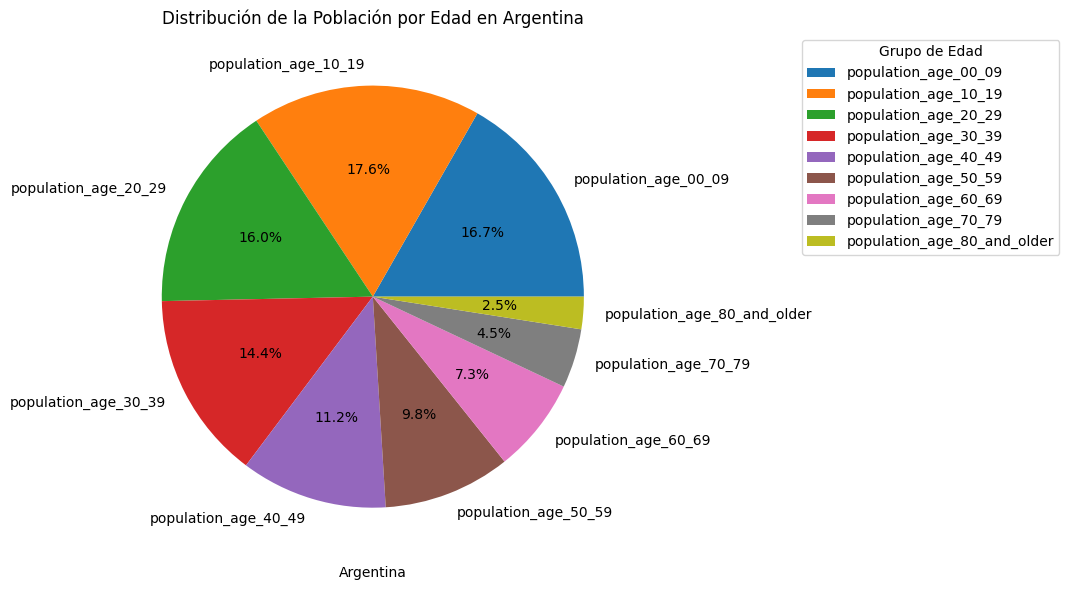

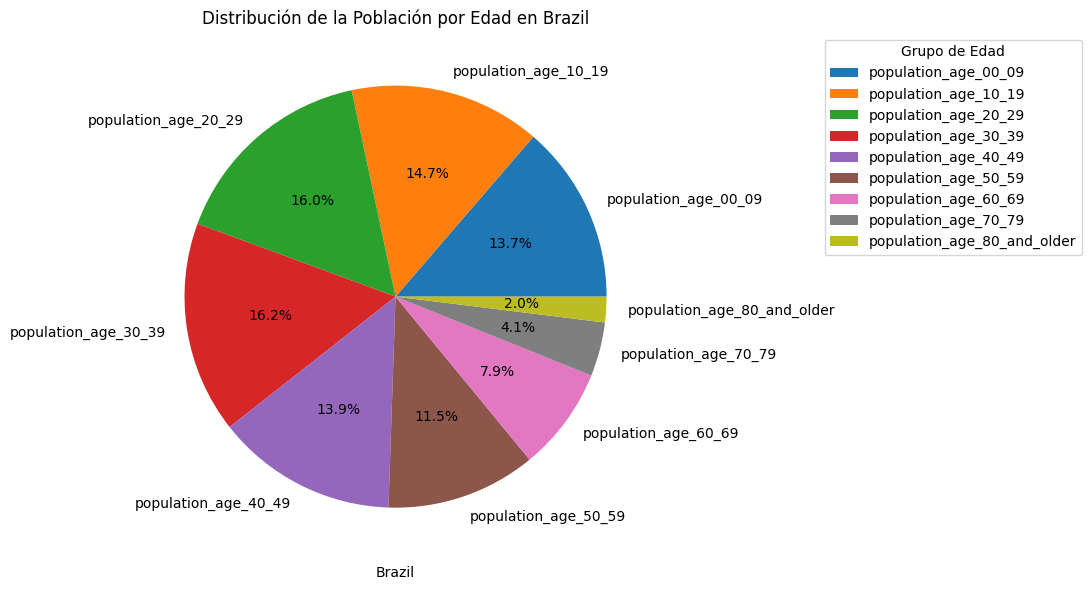

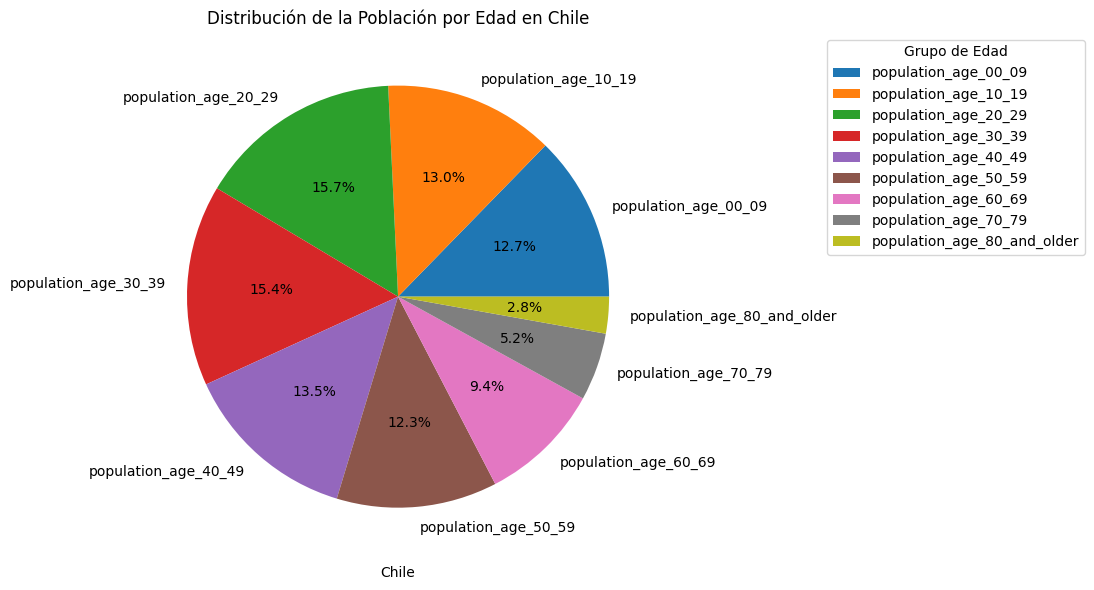

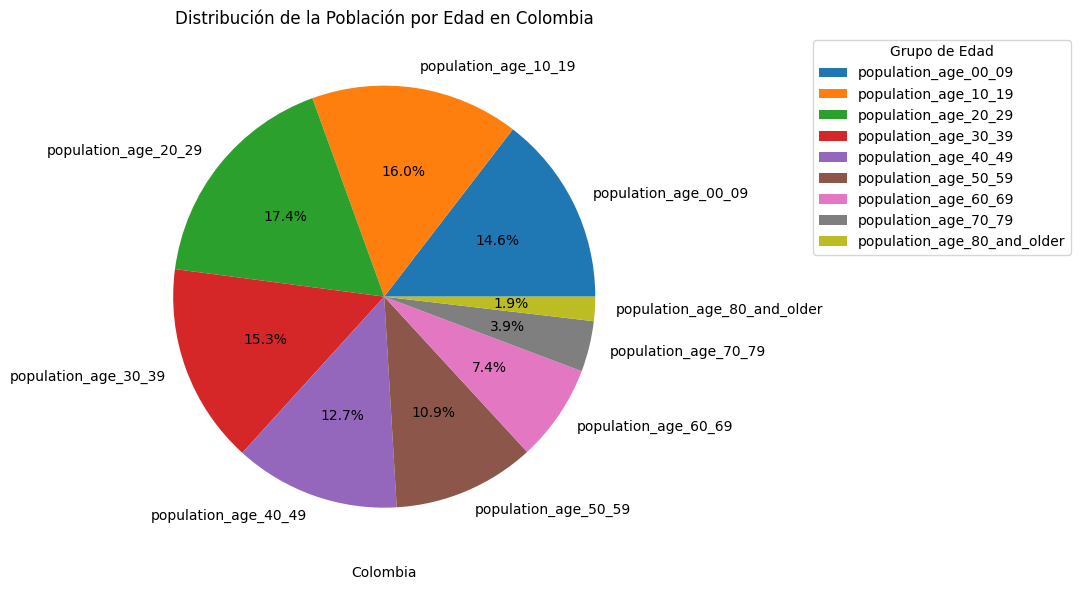

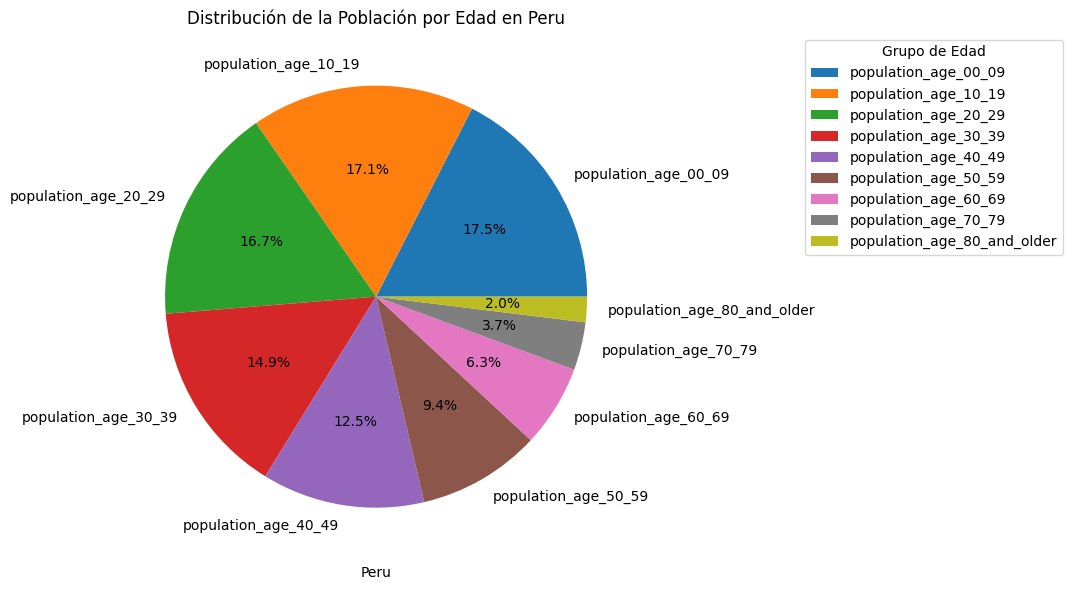

In [ ]:
# Densidad de población por grupos de edad

#Agrupa los datos por país y obtiene la tasa máxima de mortalidad para cada país.:
#los ordena x tasa mortalidad /desc 
# head / selecciona 5 c/ mayor tasa mortalidad
# index : nombre paises 
high_mortality_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False).head(5).index


# Definición de Grupos Etarios:
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']

# Cálculo de la Distribución de Edad:
# Filtra el DataFrame para incluir solo los países con alta mortalidad.
# y Agrupa los datos por país y calcula el promedio de la distribución de edad para cada país.
age_distribution = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()

#Visualización de Datos por País:
paises = age_distribution.index.unique()

for pais in paises:     #Itera sobre cada país en age_distribution.
    plt.figure(figsize=(12,6))
    plt.pie(                            #Crea un gráfico de pastel (pie chart) para mostrar la distribución de la población por edad.
        age_distribution.loc[pais].values,   #Datos de los grupos etarios para el país actual.
        labels=age_distribution.loc[pais].index,   #Etiquetas para cada segmento del gráfico.
        autopct='%1.1f%%'             #Muestra el porcentaje en cada segmento del gráfico.
    )

    # age_distribution.plot(kind='pie', stacked=True, figsize=(12, 8))
    plt.xlabel(f'{pais}')
    plt.title(f'Distribución de la Población por Edad en {pais}')
    plt.legend(bbox_to_anchor=(1.3, 1), loc='upper left', title='Grupo de Edad')
    plt.tight_layout()
    plt.show()

El gráfico muestra claramente la desigualdad en cantidades de población por grupos de edad en los paises seleccionados aunque no proporcione muchas cosas interesantes. Es bueno tenerlo en cuenta para futuros análisis.

Sin embargo podemos empezar a ver como fueron de buenas o malas las estrategias de vacunación para mitigar la mortalidad y los casos confirmados.

### Comparación de estrategias de vacunación:

In [ ]:
#realiza una serie de operaciones para obtener el número máximo de dosis de vacunas administradas acumuladas para cada país en el DataFrame data_latinoamerica_paises
data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max()

country_name
Argentina   109204825.00
Brazil      347868481.00
Chile        62204235.00
Colombia     87566541.00
Mexico      209673612.00
Peru         83624934.00
Name: cumulative_vaccine_doses_administered, dtype: float64

In [ ]:
#calcular la población promedio de cada país en el DataFrame data_latinoamerica_paises. 
data_latinoamerica_paises.groupby('country_name')['population'].mean()

country_name
Argentina    44938712.00
Brazil      212559409.00
Chile        17574003.00
Colombia     50882884.00
Mexico      110991953.00
Peru         29381884.00
Name: population, dtype: float64

In [ ]:
#realiza el cálculo del número máximo de dosis de vacuna administradas por población media en cada país. 
data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].mean()

country_name
Argentina   2.43
Brazil      1.64
Chile       3.54
Colombia    1.72
Mexico      1.89
Peru        2.85
dtype: float64

#### Realizamos el análisis y visualización de la estrategia de vacunación en América Latina, mostrando la cantidad de dosis de vacunas administradas por habitante para cada país.

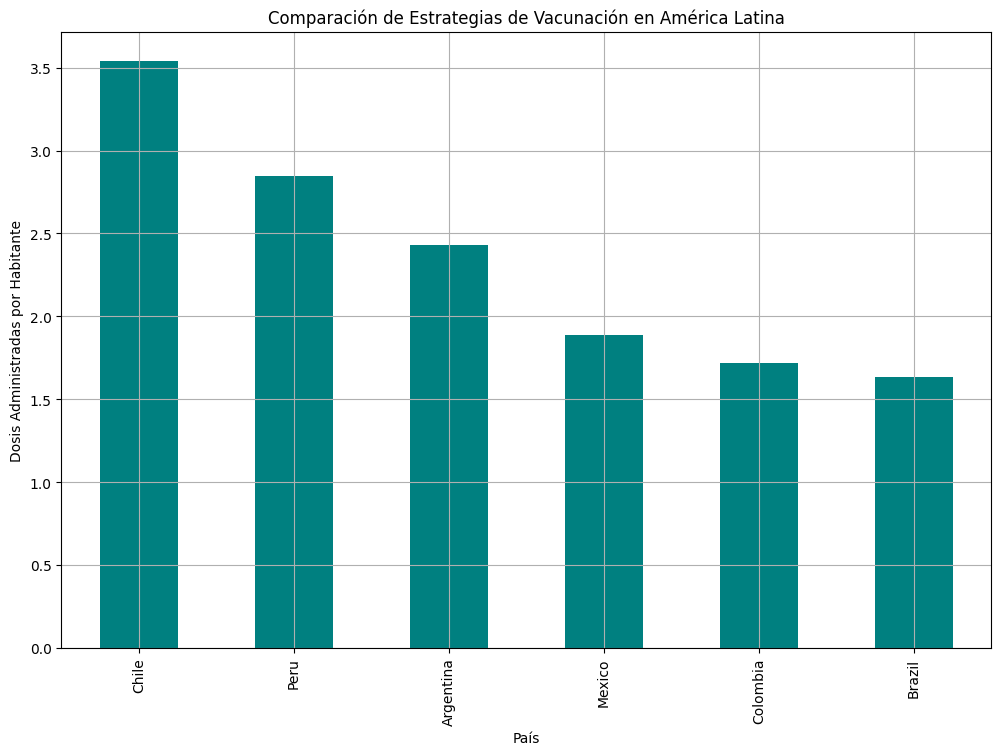

In [ ]:
vaccination_strategy = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].mean()
#Agrupa x por país y calcula el número MAX dosis vacunas administradas para c/país. 
#Agrupa los datos por país y calcula la población media para cada país.
# Divide el número máximo de dosis administradas por la población media de cada país..
# dando como resultado la cantidad de dosis administradas por habitante en promedio.

vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='teal', grid=True)
#Ordena la Serie  en orden descendente según la cantidad de dosis administradas por habitante. 
# .plot .. Crea gráfico de barras c/dosis administradas por habitante en eje y; y nombres de los países en eje x.


plt.xlabel('País')
plt.ylabel('Dosis Administradas por Habitante')
plt.title('Comparación de Estrategias de Vacunación en América Latina')
plt.show()

Nuevamente vemos el buen resultado de las politicas de chile y un clara falla en Colombia y Brasil.

Con esto vamos definiendo los paises que necesitan más ayuda y donde se deberían crear los nuevos centros.

#### Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad

In [ ]:
data_latinoamerica_paises.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

In [ ]:
# Agrupamos los datos por la columna 'country_name'.
#Dentro de cada grupo (país), se selecciona el valor máximo de la columna 'deceased_percentage'.
#Selecciona los tres valores más grandes
# Obtiene los índices (nombres de los países) de los tres valores más grandes:
top_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nlargest(3).index
top_countries

Index(['Peru', 'Chile', 'Brazil'], dtype='object', name='country_name')

El siguiente código  encuentra los países con los menores porcentajes de personas fallecidas:

In [ ]:
# Agrupa los datos del DataFrame por la columna 'country_name'
# Para cada país, selecciona el valor máximo de la columna 'deceased_percentage'
#Ordena los valores MAX de 'deceased_percentage' /ascendente y selecciona los tres valores más pequeños

bottom_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index # 5 paises con menor cantidad de muertes
bottom_countries

Index(['Mexico', 'Argentina', 'Colombia'], dtype='object', name='country_name')

El siguiente código ordena los países de acuerdo con el porcentaje máximo de fallecidos :

In [ ]:
#Agrupa los datos del DataFrame data_latinoamerica_paises por la columna 'country_name
# Dentro de cada grupo (país), se selecciona el valor máximo de la columna 'deceased_percentage' y  Ordena
all_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().sort_values(ascending=False) # 5 paises con menor cantidad de muertes
all_countries

country_name
Peru        0.01
Chile       0.01
Brazil      0.00
Colombia    0.00
Argentina   0.00
Mexico      0.00
Name: deceased_percentage, dtype: float64

A continuacion nos enfocamos en analizar la prevalencia de condiciones preexistentes, específicamente diabetes y el hábito de fumar, en países con altas y bajas tasas de mortalidad por COVID-19. 

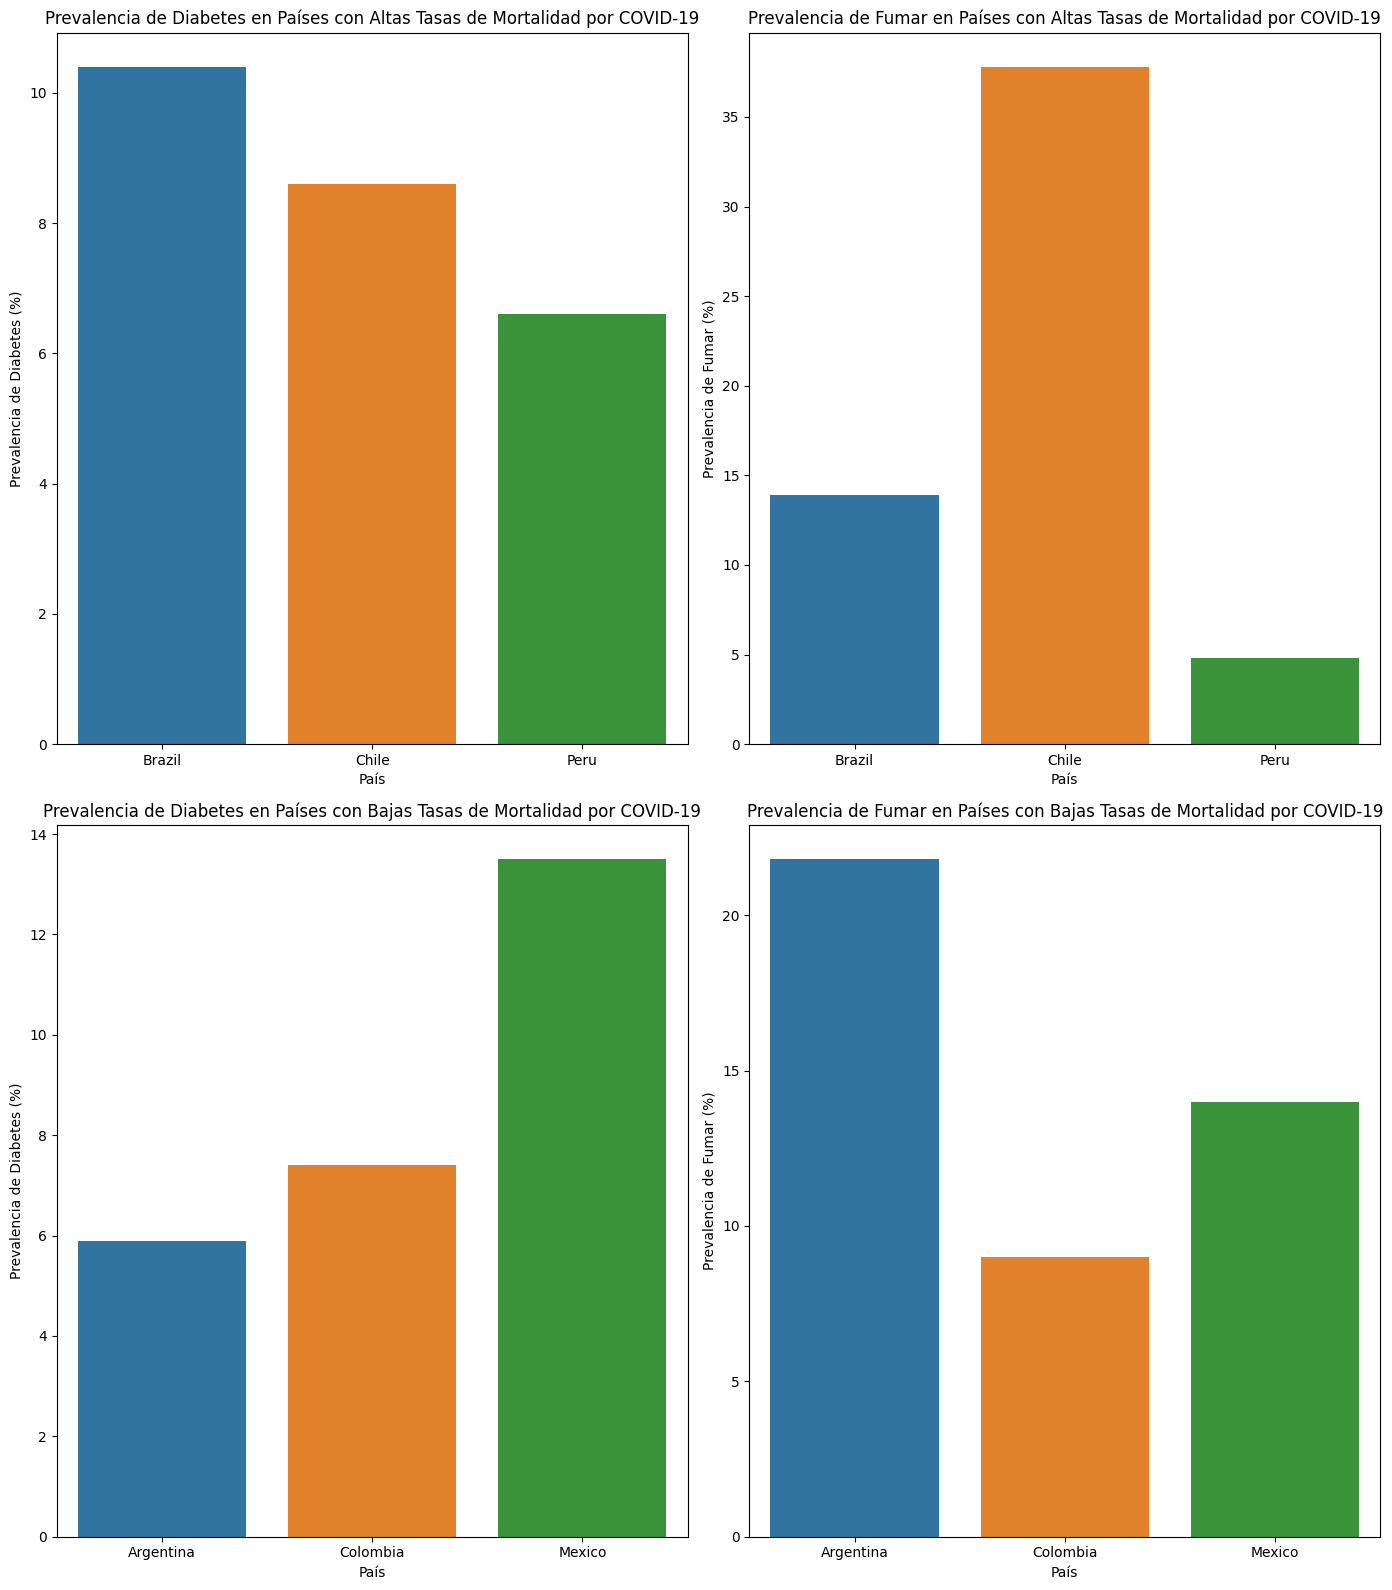

In [ ]:
# Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad.
# Selecciona los 3 países con los porcentajes más altos de fallecidos ('deceased_percentage').
# bottom_countries: Selecciona los nombres de los tres países con los porcentajes más bajos de fallecidos.
top_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nlargest(3).index # 5 paises con mayor cantidad de muertes
bottom_countries = data_latinoamerica_paises.groupby('country_name')['deceased_percentage'].max().nsmallest(3).index # 5 paises con menor cantidad de muertes

#Filtrado de datos para los países seleccionados:
conditions_top_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(top_countries)]
conditions_bottom_data = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(bottom_countries)]

#Gráfico de barras para la prevalencia de diabetes en países con altas tasas de mortalidad:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    ncols=2,
    nrows=2,
    figsize=(14, 16)
)


# Prevalencia de diabetes en top
sns.barplot(
    data=conditions_top_data, 
    x='country_name', 
    y='diabetes_prevalence', 
    hue='country_name', 
    ax=ax1)

ax1.set_xlabel('País')
ax1.set_ylabel('Prevalencia de Diabetes (%)')
ax1.set_title('Prevalencia de Diabetes en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(
    data=conditions_top_data, 
    x='country_name', 
    y='smoking_prevalence', 
    hue='country_name', 
    ax=ax2)

ax2.set_xlabel('País')
ax2.set_ylabel('Prevalencia de Fumar (%)')
ax2.set_title('Prevalencia de Fumar en Países con Altas Tasas de Mortalidad por COVID-19')

# Prevalencia de diabetes en top
sns.barplot(
    data=conditions_bottom_data, 
    x='country_name', 
    y='diabetes_prevalence', 
    hue='country_name', 
    ax=ax3)

ax3.set_xlabel('País')
ax3.set_ylabel('Prevalencia de Diabetes (%)')
ax3.set_title('Prevalencia de Diabetes en Países con Bajas Tasas de Mortalidad por COVID-19')

# Prevalencia de fumar en top
sns.barplot(
    data=conditions_bottom_data, 
    x='country_name', 
    y='smoking_prevalence', 
    hue='country_name', 
    ax=ax4)

ax4.set_xlabel('País')
ax4.set_ylabel('Prevalencia de Fumar (%)')
ax4.set_title('Prevalencia de Fumar en Países con Bajas Tasas de Mortalidad por COVID-19')

plt.tight_layout()

plt.show()

Ahora identificamos que la diabetes afecta mucho mas a México y Brasil, por lo que se podría decir que estos paises son los que más han sufrido por la diabetes. Respecto a fumar se puede observar que afecta más a Chile y Argentina, por lo que se podría decir que estos paises son los que más han sufrido por el fumar.

Sin embargo mientras Brasil aparece entre los países con mayor tasa de mortalidad, México aparece entre los ménores. 
Lo mismo pasas entre Chile (mayor) y Argentina (menor)

Por lo que dificilmente pueda entenderse una correlación entre Situaciones Preexistentes y Mortalidad por Covid. 

Y viendo todo esto, ¿cómo se ha visto la fatalidad por país?

#### Fatalidad por país:

In [ ]:
# calculamos la tasa de letalidad de COVID-19 para cada país y la ordena:
data_latinoamerica_paises['case_fatality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed'] # Otro indice de fatalidad posible. Muertos sobre contagiados. 

# Agrupación y selección de la última tasa de letalidad por país:
fatality_rates = data_latinoamerica_paises.groupby('country_name')['case_fatality_rate'].last().sort_values()
fatality_rates

country_name
Argentina   0.02
Brazil      0.02
Chile       0.02
Colombia    0.02
Mexico      0.02
Peru        0.02
Name: case_fatality_rate, dtype: float64

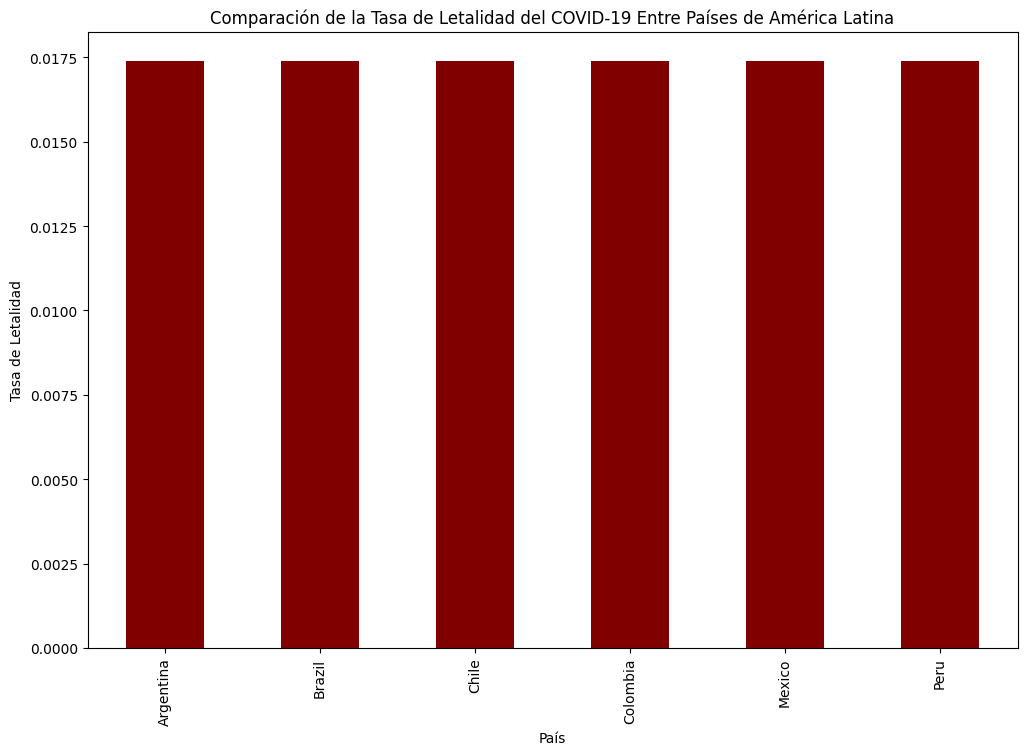

In [ ]:
#   creamos un gráfico de barras para visualizar 
# y comparamos las tasas de letalidad del COVID-19 entre diferentes países de América Latina:

plt.figure(figsize=(12, 8))

fatality_rates.plot(kind='bar', color='maroon')
plt.xlabel('País')
plt.ylabel('Tasa de Letalidad')
plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina')
plt.show()

Todos los países han tenido un comportamiento similar en cuanto a la fatalidad, sin embargo apoyandose con las otras gráficas se puede observar que ha disminuido.

Los casos nuevos y las muestes nuevas ha variado de la siguiente manera esto debido a la vacucación y a las medidas tomadas por los paises, ademas de que se ha disminuido la cantidad de personas que se han contagiado y fallecido.

 A continuacion graficamos la evolución de la vacunación y la reducción de casos de COVID-19 en América Latina mediante un gráfico combinado de líneas: 

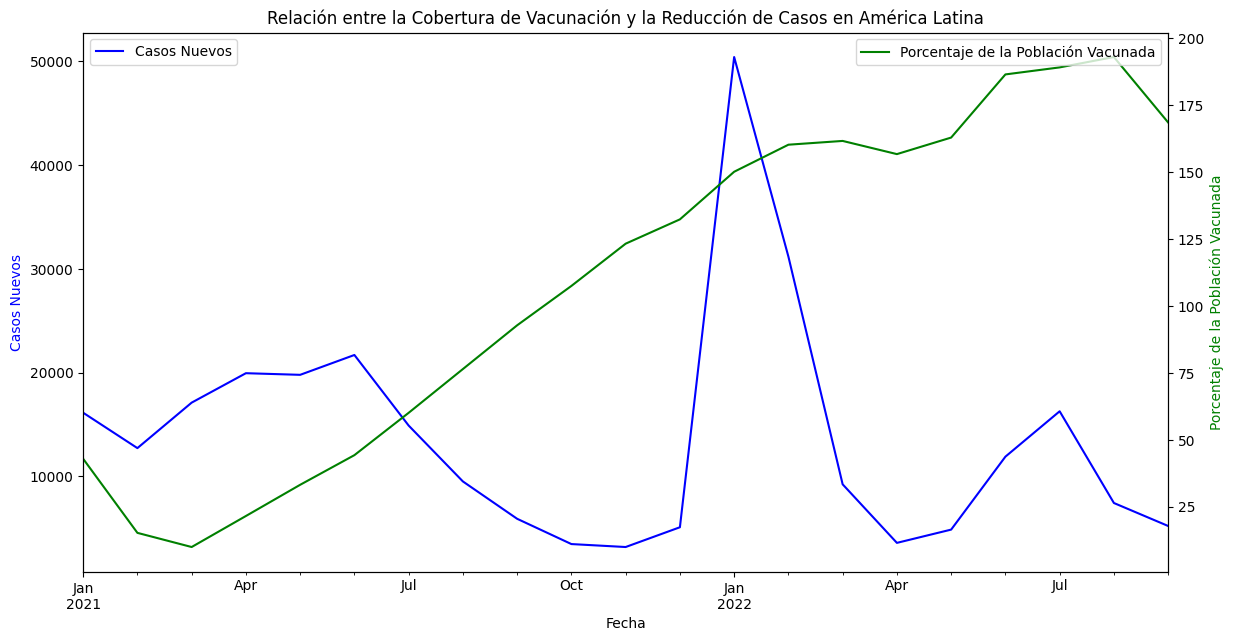

In [ ]:
# Como evoluciona la vacunación en América Latina y la reducción de casos de COVID-19

plt.figure(figsize=(14, 7))
ax1 = plt.gca()
ax2 = ax1.twinx()

#calculamos percentajes de vacunacion
data_latinoamerica_paises['percentage_vaccinated'] = data_latinoamerica_paises['cumulative_vaccine_doses_administered'] / data_latinoamerica_paises['population'] * 100

# Gráfico mis dos lineplots//agrupa por mes/calcula media
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')


ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

Los datos parecerían indicar que cuando se incrementó la población vacunada la cantidad de casos que venia creciendo comenzó a estabilizarse en valores de inicio de pandemia. 

#### A continuacion visualizamos la evolución temporal de la tasa de mortalidad por COVID-19 en América Latina utilizando un gráfico de líneas:

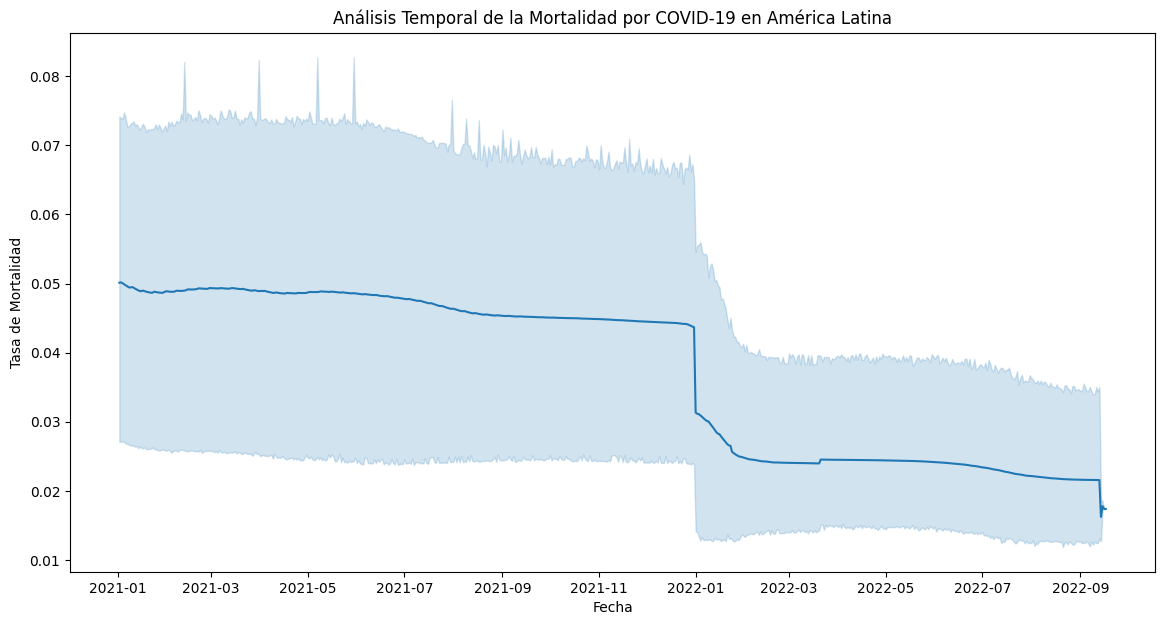

In [ ]:
# cómo evolucionó la mortalidad
#/: Realiza la división elemento a elemento para calcular la tasa de mortalidad:
data_latinoamerica_paises['mortality_rate'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']

plt.figure(figsize=(14, 7))
sns.lineplot(                   #usamos la función lineplot de la biblioteca Seaborn para crear un gráfico de líneas.
    data=data_latinoamerica_paises, #df
    x='date', 
    y='mortality_rate', 
    estimator='mean'    #Indica que, si hay múltiples valores para la misma fecha, se debe calcular la media para esa fecha.
)
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()

La mortalidad por Covid 19 fue cayendo de manera pronunciada en la medidad en que avanzó la campaña de vacunación en America Latina. 

#### A continuacion veremos la evolución de los casos activos y recuperados de COVID-19 en América Latina mediante un gráfico de líneas:

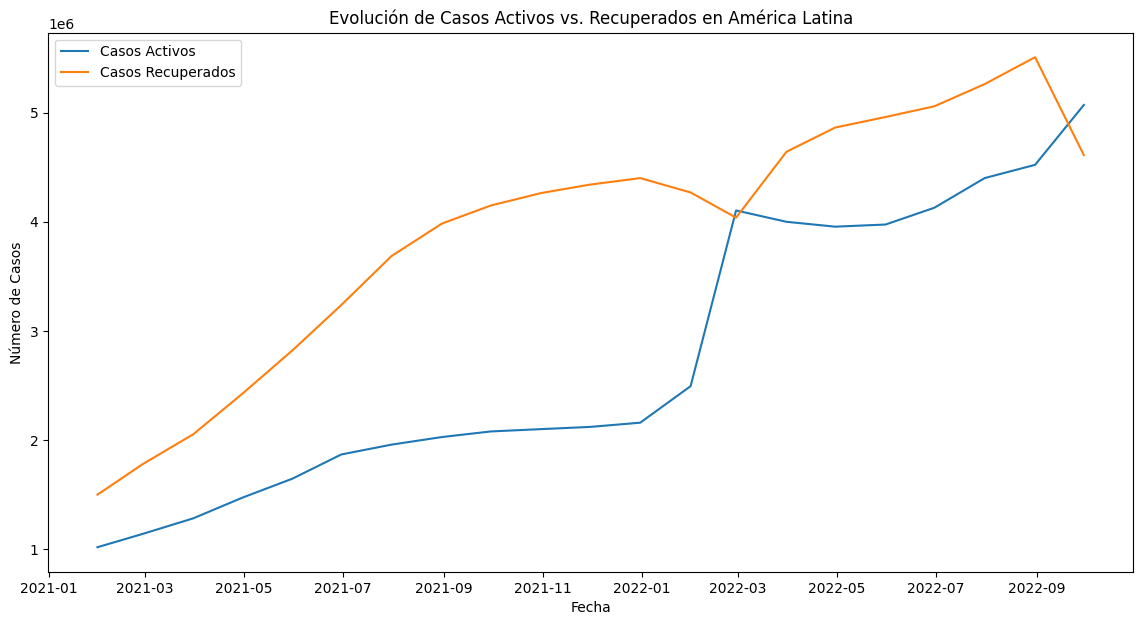

In [ ]:
# Como evolucionan los casos activos y recuperados en América Latina
## Creo la columna active cases, calculamos / restamos los fallecidos y los recuperados del número total de casos confirmados para calcular los casos activos 
data_latinoamerica_paises['active_cases'] = data_latinoamerica_paises['cumulative_confirmed'] - data_latinoamerica_paises['cumulative_deceased'] - data_latinoamerica_paises['cumulative_recovered']

# Grafico dos lineas sobre el mismo eje: 
plt.figure(figsize=(14, 7))

#usamos función lineplot de la biblioteca Seaborn para crear gráficos de líneas:
#agrupamos x mes/ se calcula media de los valores numericos
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')

plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Evolución de Casos Activos vs. Recuperados en América Latina')
plt.legend()
plt.show()

La cantidad de casos activos fue creciendo mientras crecia a la par la cantidad de casos recuperados. 

In [ ]:
# DataFrame que muestra la situación actual de COVID-19 en los países de América Latina en términos de casos activos, casos recuperados y fallecidos
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].last().sort_values(by="active_cases")
current_situation

active_cases  cumulative_recovered  cumulative_deceased
country_name                                                         
Argentina       5973862.60                  0.00            105716.12
Brazil          5973862.60                  0.00            105716.12
Chile           5973862.60                  0.00            105716.12
Colombia        5973862.60                  0.00            105716.12
Mexico          5973862.60                  0.00            105716.12
Peru            5973862.60                  0.00            105716.12

In [ ]:
# Debo usar max() porque last no registra el acumulado de recovered
#  se utiliza la función max() en lugar de last() 
# para asegurar que se obtenga el valor acumulado más reciente de los casos recuperados, fallecidos y activos.
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases")
current_situation

active_cases  cumulative_recovered  cumulative_deceased
country_name                                                         
Chile           5973862.60                  0.00            105716.12
Mexico          5973862.60                  0.00            304025.00
Peru            5973862.60                  0.00            216173.00
Colombia        6162609.00            5441021.00            155770.00
Argentina       9567933.00                  0.00            129830.00
Brazil         33819307.00           33706231.00            685203.00

In [ ]:
data_latinoamerica_paises[['country_name','active_cases', 'cumulative_recovered', 'cumulative_deceased']].loc[
    (data_latinoamerica_paises.index >= data_latinoamerica_paises.index.max())]

country_name  active_cases  cumulative_recovered  \
date                                                          
2022-09-17    Argentina    5973862.60                  0.00   
2022-09-17       Brazil    5973862.60                  0.00   
2022-09-17        Chile    5973862.60                  0.00   
2022-09-17     Colombia    5973862.60                  0.00   
2022-09-17       Mexico    5973862.60                  0.00   
2022-09-17         Peru    5973862.60                  0.00   

            cumulative_deceased  
date                             
2022-09-17            105716.12  
2022-09-17            105716.12  
2022-09-17            105716.12  
2022-09-17            105716.12  
2022-09-17            105716.12  
2022-09-17            105716.12

#### Creamos un gráfico de barras para visualizar la situación actual de COVID-19 en diferentes países de América Latina:

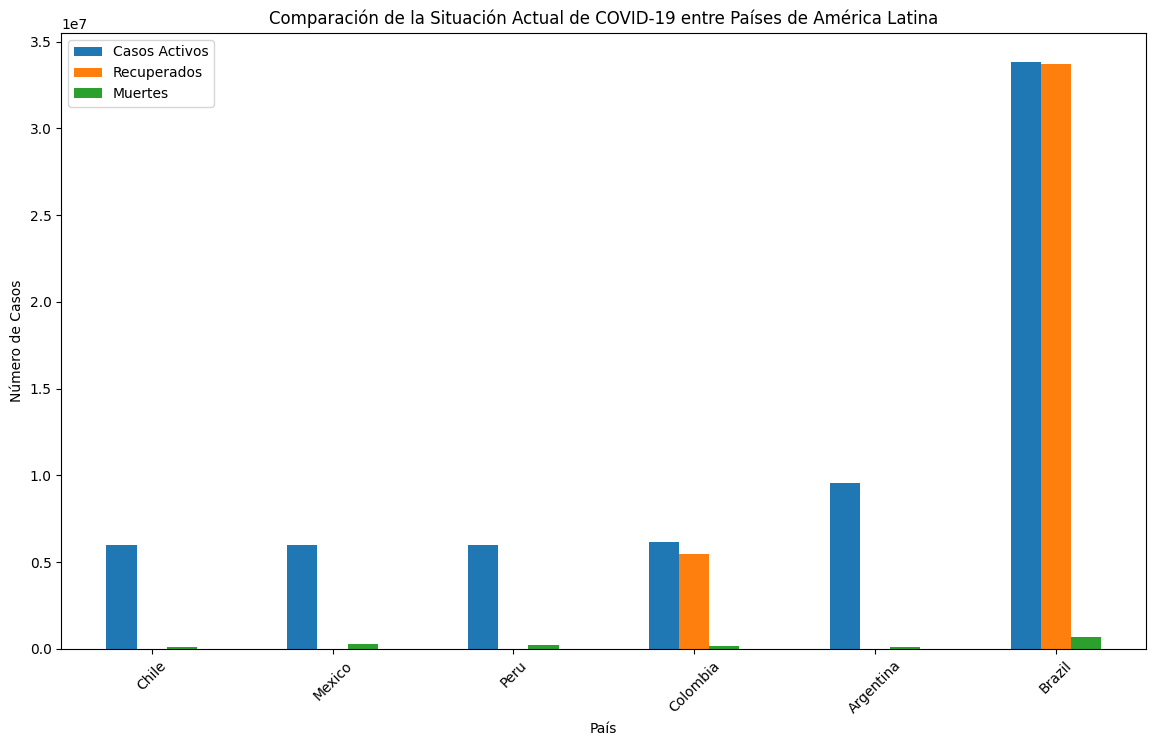

In [ ]:
# No se tienen dato pero hay datos de recuperados y muertes en algunos paises
#Agrupa el DataFrame data_latinoamerica_paises por 'country_name' y selecciona las columnas:'active_cases', 'cumulative_recovered' y 'cumulative_deceased'./ ordena
current_situation = data_latinoamerica_paises.groupby('country_name')[['active_cases', 'cumulative_recovered', 'cumulative_deceased']].max().sort_values(by="active_cases")


current_situation.plot(
    kind='bar',   #se debe crear un gráfico de barras.
    stacked=False,      #Indica que las barras no deben apilarse
    figsize=(14, 8))

plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina')
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation=45)
plt.show()

Por algún mótivo el dataset no está persistiendo los datos acumulados de recuperados. Lo cual no nos permite ver la cantidad de recuperados actuales de cada pais

## EXTRA CREDIT

Para tener un mejor contexto graficamos la cantidad de vacunas administradas,los casos confirmados, muertes y recuperados.

#### Creamos un mapa interactivo para visualizar la distribución de casos confirmados, muertes, vacunas administradas y casos recuperados en América Latina utilizando la biblioteca Folium:

In [ ]:
# mapa para ver la distribución de casos confirmado, muertes, vacuna y recuperados
import folium               # Biblioteca para crear mapas interactivos en Python.
from folium.plugins import HeatMap              #Plugin de Folium para generar mapas de calor

# Seleccionamos las columnas que vamos a utilizar
columns = ['latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'cumulative_recovered']
data_map = data_latinoamerica_paises[columns].dropna()     #elimina las filas con valores nulos usando dropna().

# Creamos un mapa centrado en América Latina 
map = folium.Map(location=[-14.235004, -51.92528], zoom_start=3)

# Creamos un mapa de calor para los casos confirmados
heat_map_confirmed = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_confirmed']], radius=15)
map.add_child(heat_map_confirmed)    # Añade cada mapa de calor al mapa base.

# Creamos un mapa de calor para las muertes
heat_map_deceased = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_deceased']], radius=15)
map.add_child(heat_map_deceased)

# Creamos un mapa de calor para las vacunas administradas
heat_map_vaccine = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_vaccine_doses_administered']], radius=15)
map.add_child(heat_map_vaccine)

# Creamos un mapa de calor para los recuperados
heat_map_recovered = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_recovered']], radius=15)
map.add_child(heat_map_recovered)

map.save('mapa.html')

map

No se ve muy detallado en las anteriores gráficas, por lo que vamos a realizar un análisis más detallado de las dosis administradas, casos confirmados, muertes y recuperados en cada país pero con gráficos mas básicos manteniendo los mapas.

In [ ]:
# bibliotecas de Python utilizadas para el trabajo con datos geoespaciales.
import geopandas as gpd
import geodatasets

#### Cargamos y explora un archivo de datos geoespaciales utilizando geopandas:

In [ ]:
# Path del Geo Dataframe descargado desde la siguiente pagina : https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
# path = "ne_110m_admin_0_countries.zip"
path = "ne_110m_admin_0_countries_lakes" # lo guardamos en la variable path

# Cargo el dataset con el archivo
world = gpd.read_file(path)    #usamos de geopanda read_file , me devuelve un dataset de referencias geograficas --> world 

# Visualizo las columnas de mi dataframe world
for column in world.columns:
    print(column)

featurecla
scalerank
LABELRANK
SOVEREIGNT
SOV_A3
ADM0_DIF
LEVEL
TYPE
TLC
ADMIN
ADM0_A3
GEOU_DIF
GEOUNIT
GU_A3
SU_DIF
SUBUNIT
SU_A3
BRK_DIFF
NAME
NAME_LONG
BRK_A3
BRK_NAME
BRK_GROUP
ABBREV
POSTAL
FORMAL_EN
FORMAL_FR
NAME_CIAWF
NOTE_ADM0
NOTE_BRK
NAME_SORT
NAME_ALT
MAPCOLOR7
MAPCOLOR8
MAPCOLOR9
MAPCOLOR13
POP_EST
POP_RANK
POP_YEAR
GDP_MD
GDP_YEAR
ECONOMY
INCOME_GRP
FIPS_10
ISO_A2
ISO_A2_EH
ISO_A3
ISO_A3_EH
ISO_N3
ISO_N3_EH
UN_A3
WB_A2
WB_A3
WOE_ID
WOE_ID_EH
WOE_NOTE
ADM0_ISO
ADM0_DIFF
ADM0_TLC
ADM0_A3_US
ADM0_A3_FR
ADM0_A3_RU
ADM0_A3_ES
ADM0_A3_CN
ADM0_A3_TW
ADM0_A3_IN
ADM0_A3_NP
ADM0_A3_PK
ADM0_A3_DE
ADM0_A3_GB
ADM0_A3_BR
ADM0_A3_IL
ADM0_A3_PS
ADM0_A3_SA
ADM0_A3_EG
ADM0_A3_MA
ADM0_A3_PT
ADM0_A3_AR
ADM0_A3_JP
ADM0_A3_KO
ADM0_A3_VN
ADM0_A3_TR
ADM0_A3_ID
ADM0_A3_PL
ADM0_A3_GR
ADM0_A3_IT
ADM0_A3_NL
ADM0_A3_SE
ADM0_A3_BD
ADM0_A3_UA
ADM0_A3_UN
ADM0_A3_WB
CONTINENT
REGION_UN
SUBREGION
REGION_WB
NAME_LEN
LONG_LEN
ABBREV_LEN
TINY
HOMEPART
MIN_ZOOM
MIN_LABEL
MAX_LABEL
LABEL_X
LABEL_Y
NE_ID
WIKIDA

In [ ]:
world.NAME

0                          Fiji
1                      Tanzania
2                     W. Sahara
3                        Canada
4      United States of America
                 ...           
172                      Serbia
173                  Montenegro
174                      Kosovo
175         Trinidad and Tobago
176                    S. Sudan
Name: NAME, Length: 177, dtype: object

In [ ]:
# Filtrado de world/ filtra el GeoDataFrame world para incluir solo las filas que corresponden a ciertos países.
world = world[(world.NAME=="Argentina") | (world.NAME=="Chile") | (world.NAME=="Colombia") | (world.NAME=="Mexico") | (world.NAME=="Peru") | (world.NAME=="Brazil")]
world

featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
9   Admin-0 country          1          2  Argentina    ARG         0      2   
10  Admin-0 country          1          2      Chile    CHL         0      2   
27  Admin-0 country          1          2     Mexico    MEX         0      2   
29  Admin-0 country          1          2     Brazil    BRA         0      2   
31  Admin-0 country          1          2       Peru    PER         0      2   
32  Admin-0 country          1          2   Colombia    COL         0      2   

                 TYPE TLC      ADMIN  ... FCLASS_TR  FCLASS_ID FCLASS_PL  \
9   Sovereign country   1  Argentina  ...      None       None      None   
10  Sovereign country   1      Chile  ...      None       None      None   
27  Sovereign country   1     Mexico  ...      None       None      None   
29  Sovereign country   1     Brazil  ...      None       None      None   
31  Sovereign country   1       Peru  ...      None       None      None   
32  Sovereign country   1   Colombia  ...      None       None      None   

   FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
9       None       None      None      None       None      None   
10      None       None      None      None       None      None   
27      None       None      None      None       None      None   
29      None       None      None      None       None      None   
31      None       None      None      None       None      None   
32      None       None      None      None       None      None   

                                             geometry  
9   MULTIPOLYGON (((-68.63401 -52.63637, -68.25 -5...  
10  MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...  
27  POLYGON ((-117.12776 32.53534, -115.99135 32.6...  
29  POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...  
31  POLYGON ((-69.89364 -4.29819, -70.79477 -4.251...  
32  POLYGON ((-66.87633 1.25336, -67.06505 1.13011...  

[6 rows x 169 columns]

In [ ]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 6 entries, 9 to 32
Columns: 169 entries, featurecla to geometry
dtypes: float64(6), geometry(1), int32(24), int64(1), object(137)
memory usage: 7.4+ KB


In [ ]:
world = world.rename(columns={"NAME":"country_name"})
world["country_name"]

9     Argentina
10        Chile
27       Mexico
29       Brazil
31         Peru
32     Colombia
Name: country_name, dtype: object

In [ ]:
# Mergeo con mi dataset agrupado
world = world.merge(data_latinoamerica_paises.groupby('country_name')['cumulative_confirmed'].max().reset_index(), on="country_name")
world

featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
0  Admin-0 country          1          2  Argentina    ARG         0      2   
1  Admin-0 country          1          2      Chile    CHL         0      2   
2  Admin-0 country          1          2     Mexico    MEX         0      2   
3  Admin-0 country          1          2     Brazil    BRA         0      2   
4  Admin-0 country          1          2       Peru    PER         0      2   
5  Admin-0 country          1          2   Colombia    COL         0      2   

                TYPE TLC      ADMIN  ... FCLASS_ID  FCLASS_PL FCLASS_GR  \
0  Sovereign country   1  Argentina  ...      None       None      None   
1  Sovereign country   1      Chile  ...      None       None      None   
2  Sovereign country   1     Mexico  ...      None       None      None   
3  Sovereign country   1     Brazil  ...      None       None      None   
4  Sovereign country   1       Peru  ...      None       None      None   
5  Sovereign country   1   Colombia  ...      None       None      None   

  FCLASS_IT  FCLASS_NL FCLASS_SE FCLASS_BD  FCLASS_UA  \
0      None       None      None      None       None   
1      None       None      None      None       None   
2      None       None      None      None       None   
3      None       None      None      None       None   
4      None       None      None      None       None   
5      None       None      None      None       None   

                                            geometry cumulative_confirmed  
0  MULTIPOLYGON (((-68.63401 -52.63637, -68.25 -5...           9697763.00  
1  MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...           6079578.72  
2  POLYGON ((-117.12776 32.53534, -115.99135 32.6...           6079578.72  
3  POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...          34568833.00  
4  POLYGON ((-69.89364 -4.29819, -70.79477 -4.251...           6079578.72  
5  POLYGON ((-66.87633 1.25336, -67.06505 1.13011...           6304317.00  

[6 rows x 170 columns]

#### Generamos un mapa temático de casos confirmados acumulados de COVID-19 en América Latina utilizando geopandas y matplotlib

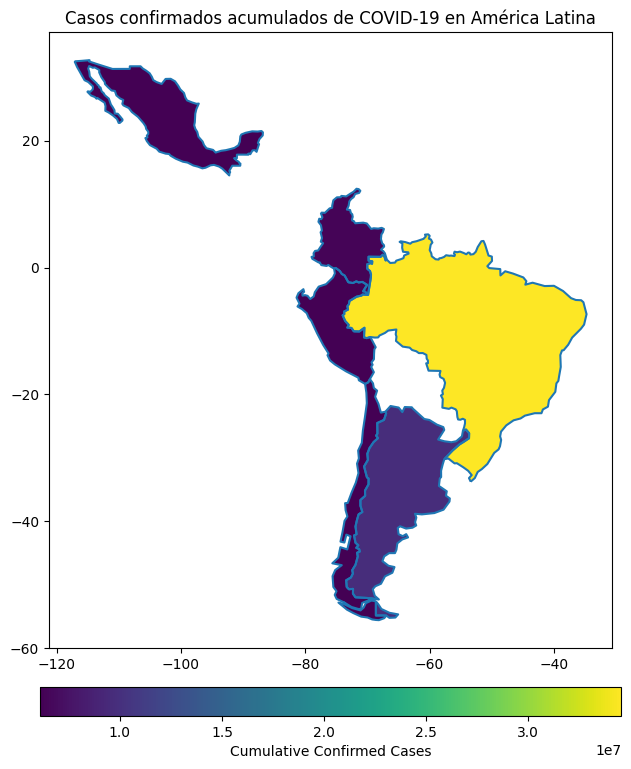

In [ ]:
#  El siguiente  mapa es útil para visualizar la distribución geográfica de los casos acumulados en la región.
fig, ax = plt.subplots(1, 1, figsize=(15, 10))   #figura/eje

world.boundary.plot(ax=ax)    #Dibuja las fronteras de los países en el GeoDataFrame 

world.plot(column='cumulative_confirmed', 
           ax=ax, 
           legend=True, 
           legend_kwds={'label': "Cumulative Confirmed Cases", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})

plt.title('Casos confirmados acumulados de COVID-19 en América Latina')
plt.show()

#### Generamos a continuacion un mapa temático que muestra la distribución de las Dosis acumuladas de vacunas administradas en América Latina por país, utilizando el paquete geopandas y matplotlib:

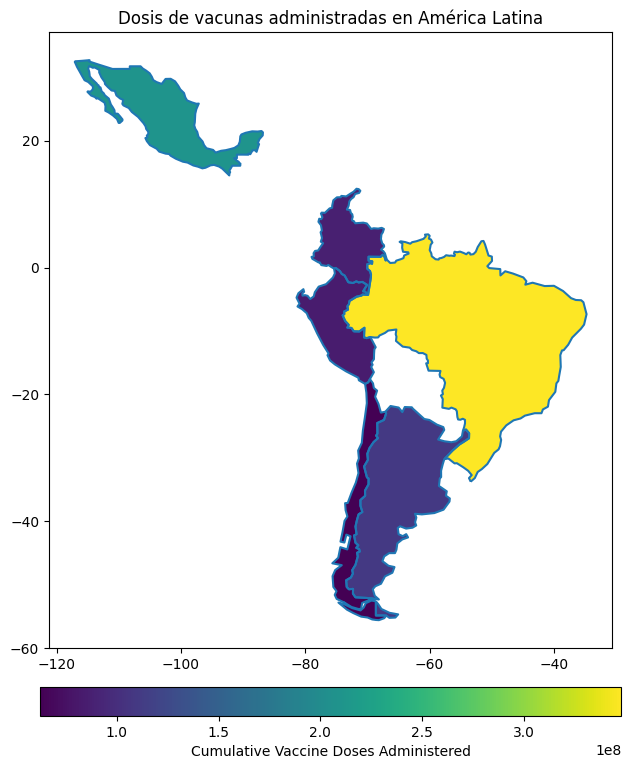

In [ ]:
# mapa para ver la distribución de vacunados en latinoamerica por país

world = world.merge(data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().reset_index(), on="country_name")
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

world.boundary.plot(ax=ax)
world.plot(
    column='cumulative_vaccine_doses_administered', 
    ax=ax, legend=True, 
    legend_kwds={'label': "Cumulative Vaccine Doses Administered", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})

plt.title('Dosis de vacunas administradas en América Latina')
plt.show()

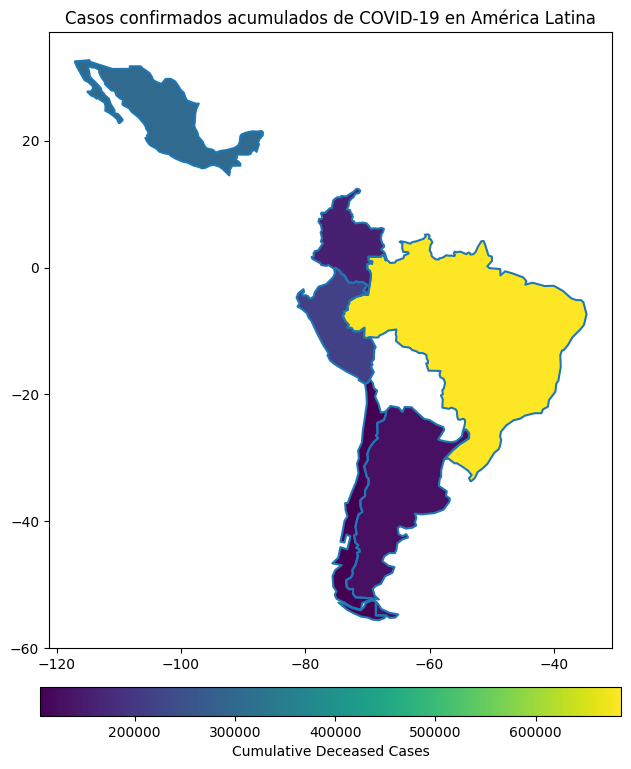

In [ ]:
# mapa para ver la distribución muertes en latinoamerica por país

world = world.merge(data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().reset_index(), on="country_name")

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

world.boundary.plot(ax=ax)

world.plot(
    column='cumulative_deceased', 
    ax=ax, legend=True, 
    legend_kwds={'label': "Cumulative Deceased Cases", 'orientation': "horizontal", 'shrink': 0.5, 'pad': 0.05, 'aspect': 20})

plt.title('Casos confirmados acumulados de COVID-19 en América Latina')
plt.show()

## EXTRA CREDIT / Modelado para Machine Learning:

In [ ]:
#PASO 1  importamos librerias necesarias para el ML 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv("DatosFinalesFiltrado.csv")
# Exploración inicial
print(data.head())
print(data.info())

  location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-02           AR    Argentina        7767.00   
1           AR  2021-01-03           AR    Argentina        4934.00   
2           AR  2021-01-04           AR    Argentina       13953.00   
3           AR  2021-01-05           AR    Argentina       14085.00   
4           AR  2021-01-06           AR    Argentina       14496.00   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0        166.00            1670634.00             46688.00   
1        157.00            1675568.00             46845.00   
2        157.00            1689521.00             47002.00   
3        160.00            1703606.00             47162.00   
4        131.00            1718102.00             47293.00   

   cumulative_vaccine_doses_administered  population  ...  \
0                               20334.00 44938712.00  ...   
1                               20529.00 44938712.00  ...   
2                

In [ ]:
# Imprimir nombres de las columnas para verificar la columna objetivo
print(data.columns)

Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_

In [ ]:
# PASO 2 Imputación de valores faltantes (ejemplo usando la media)

for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        data[column].fillna(data[column].mean(), inplace=True)   #Rellena los valores faltantes en las columnas numéricas con la media.
        
    else:
        data[column].fillna(data[column].mode()[0], inplace=True)    # Rellena los valores faltantes en las columnas categóricas con la moda.

C:\Users\KIM\AppData\Local\Temp\ipykernel_29328\1545058370.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)    # Rellena los valores faltantes en las columnas categóricas con la moda.
C:\Users\KIM\AppData\Local\Temp\ipykernel_29328\1545058370.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inte

In [ ]:
# PASO 3 NORMALIZACION DE DATOS / Normalizamos las columnas numéricas para tener datos en la misma escala.
# Seleccionar columnas numéricas para normalización
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns   #Selecciona las columnas numéricas.

# Normalizar datos
scaler = StandardScaler()               #Crea un objeto StandardScaler para la normalización.
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])   #Normaliza las columnas numéricas.

In [ ]:
# Paso 4: Transformación de Variables
# Convertimos las variables categóricas en variables dummy para poder usarlas en modelos de Machine Learning:
data = pd.get_dummies(data, drop_first=True)   
#Convierte las variables categóricas en variables dummy, eliminando la primera categoría 
# para evitar multicolinealidad.

In [ ]:
#PASO 5 / Definir Variables Independientes y Dependientes: Elección de la Columna Objetivo
#Tomar como columna objetivo los casos nuevos confirmados ('new_confirmed_cases') 
# es una buena elección si el objetivo del análisis es predecir la incidencia futura de COVID-19 en diferentes regiones. 
# Esto puede ayudar a identificar áreas con alta necesidad de recursos adicionales,
#como laboratorios y centros de vacunación.

# tomamos como variable objetivo los casos nuevos confirmados para la predicción:

target_variable = 'new_confirmed'  # Reemplazar con el nombre de la columna objetivo real

In [ ]:
# Seleccionamos la columna objetivo y separamos las variables independientes (X) de la dependiente (y).
#   la columna objetivo 'new_confirmed' en los datos
if target_variable in data.columns:
    X = data.drop(target_variable, axis=1)   # Elimina la columna objetivo del DataFrame, dejando solo las variables independientes.
    y = data[target_variable]                 # Selecciona la columna objetivo.
else:
    raise ValueError(f"La columna objetivo '{target_variable}' no existe en los datos.")

In [ ]:
print(data)

      new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
0             -0.25         -0.22                 -0.64                -0.80   
1             -0.37         -0.24                 -0.64                -0.80   
2              0.00         -0.24                 -0.64                -0.80   
3              0.01         -0.23                 -0.64                -0.80   
4              0.02         -0.29                 -0.63                -0.80   
...             ...           ...                   ...                  ...   
3739          -0.53         -0.50                 -0.33                 0.13   
3740          -0.04         -0.28                 -0.09                -0.48   
3741          -0.04         -0.28                 -0.09                -0.48   
3742          -0.04         -0.28                 -0.09                -0.48   
3743          -0.04         -0.28                 -0.09                -0.48   

      cumulative_vaccine_doses_administ

In [ ]:
# Paso 6: División del Dataset
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

#Divide los datos en un 80% para entrenamiento y un 20% para prueba.

In [ ]:
# Paso 7: Entrenamiento y Evaluación de Modelos
# Modelo de Regresión Lineal
lr = LinearRegression()    #Crea un objeto de regresión lineal.
lr.fit(X_train, y_train)     

y_pred_lr = lr.predict(X_test)         #Predice los valores de la variable objetivo para los datos de prueba.


mse_lr = mean_squared_error(y_test, y_pred_lr)      #Calcula el error cuadrático medio (MSE) entre los valores reales y los predichos.

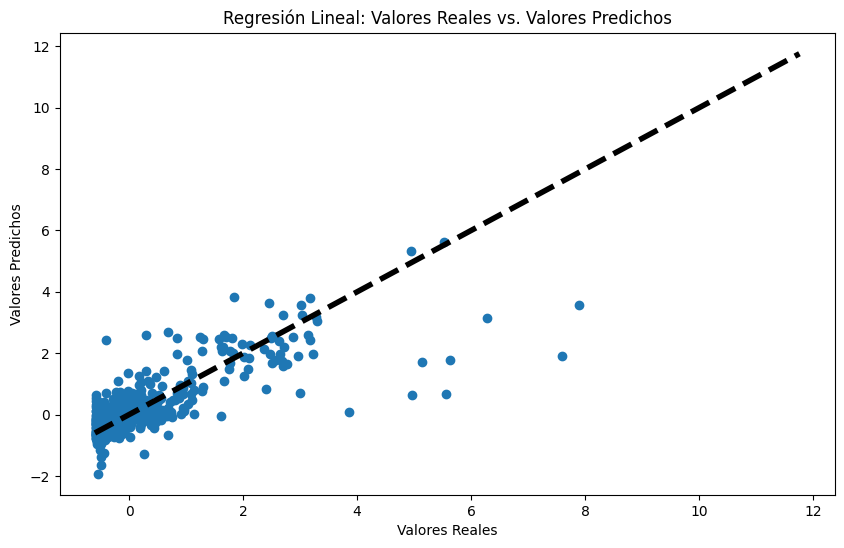

In [ ]:
# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión Lineal: Valores Reales vs. Valores Predichos')
plt.show()

## AVANCE 4

In [ ]:
import pandas as pd
data_latinoamerica_paises = pd.read_csv("DatosFinalesFiltrado.csv")
print(data_latinoamerica_paises)

     location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-02           AR    Argentina        7767.00   
1              AR  2021-01-03           AR    Argentina        4934.00   
2              AR  2021-01-04           AR    Argentina       13953.00   
3              AR  2021-01-05           AR    Argentina       14085.00   
4              AR  2021-01-06           AR    Argentina       14496.00   
...           ...         ...          ...          ...            ...   
3739           PE  2022-09-13           PE         Peru        1150.00   
3740           PE  2022-09-14           PE         Peru       12911.39   
3741           PE  2022-09-15           PE         Peru       12911.39   
3742           PE  2022-09-16           PE         Peru       12911.39   
3743           PE  2022-09-17           PE         Peru       12911.39   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0           166.00            1670634.00      

In [ ]:
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date', inplace=True)
data_latinoamerica_paises.head()


location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina        7767.00   
2021-01-03           AR           AR    Argentina        4934.00   
2021-01-04           AR           AR    Argentina       13953.00   
2021-01-05           AR           AR    Argentina       14085.00   
2021-01-06           AR           AR    Argentina       14496.00   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02        166.00            1670634.00             46688.00   
2021-01-03        157.00            1675568.00             46845.00   
2021-01-04        157.00            1689521.00             47002.00   
2021-01-05        160.00            1703606.00             47162.00   
2021-01-06        131.00            1718102.00             47293.00   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                               20334.00 44938712.00   
2021-01-03                               20529.00 44938712.00   
2021-01-04                               25164.00 44938712.00   
2021-01-05                               29852.00 44938712.00   
2021-01-06                               34162.00 44938712.00   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02      19523766.00  ...              15057273.00        2690269.00   
2021-01-03      19523766.00  ...              15057273.00        2690269.00   
2021-01-04      19523766.00  ...              15057273.00        2690269.00   
2021-01-05      19523766.00  ...              15057273.00        2690269.00   
2021-01-06      19523766.00  ...              15057273.00        2690269.00   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02          55032.00            76.52                     147.09   
2021-01-03          55032.00            76.52                     147.09   
2021-01-04          55032.00            76.52                     147.09   
2021-01-05          55032.00            76.52                     147.09   
2021-01-06          55032.00            76.52                     147.09   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                        79.48                     26.60   
2021-01-03                        79.48                     26.60   
2021-01-04                        79.48                     26.60   
2021-01-05                        79.48                     26.60   
2021-01-06                        79.48                     26.60   

            comorbidity_mortality_rate  new_recovered  cumulative_recovered  
date                                                                         
2021-01-02                       15.80           0.00                  0.00  
2021-01-03                       15.80           0.00                  0.00  
2021-01-04                       15.80           0.00                  0.00  
2021-01-05                       15.80           0.00                  0.00  
2021-01-06                       15.80           0.00                  0.00  

[5 rows x 49 columns]

In [ ]:
montly_sum = data_latinoamerica_paises[['new_confirmed', 'new_deceased']].resample('ME').sum()
montly_sum.head()

new_confirmed  new_deceased
date                                   
2021-01-31     2904533.00      97330.00
2021-02-28     2138410.00      85189.00
2021-03-31     3182040.00     112297.00
2021-04-30     3589445.00     139216.00
2021-05-31     3679939.00     116165.00

#### Creamos una visualización de la evolución de los casos activos y recuperados de COVID-19 en América Latina, utilizando las bibliotecas pandas, matplotlib, y seaborn:

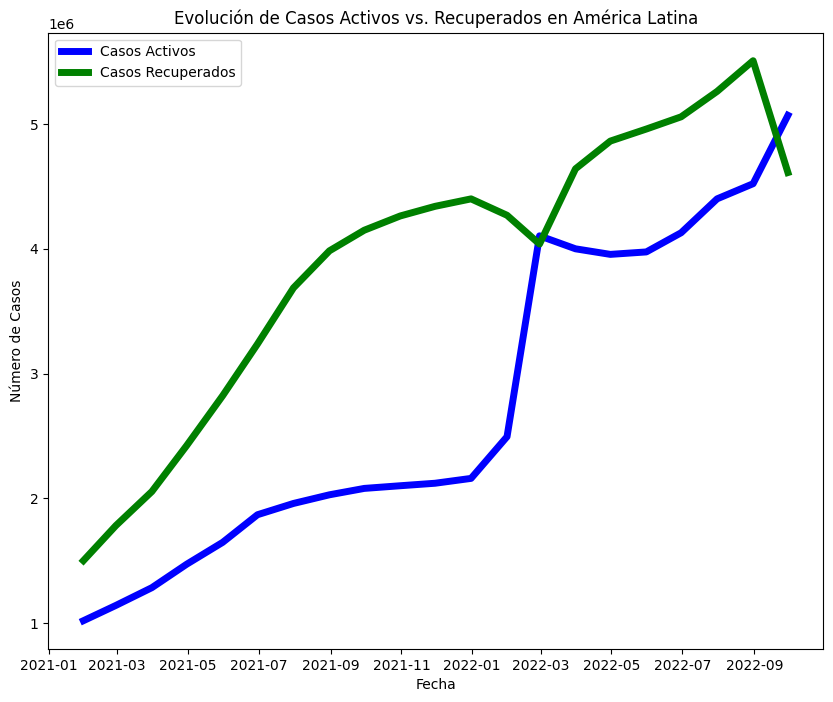

In [ ]:
# Gráficos con Power BI usando Matplotlib y Seaborn
# Cómo evolucionaron los casos activos y recuperados en América Latina
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Manipulation / cargamos datos
data_latinoamerica_paises = pd.read_csv("DatosFinalesFiltrado.csv")
# convertimos la columna Date to Datetime
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date'])
#establecemos date como indice del df
data_latinoamerica_paises.set_index('date', inplace=True)
# Crear una nueva columna 'active_cases' calculando la diferencia entre confirmados, fallecidos y recuperados:
data_latinoamerica_paises['active_cases'] = data_latinoamerica_paises['cumulative_confirmed'] - data_latinoamerica_paises['cumulative_deceased'] - data_latinoamerica_paises['cumulative_recovered']

# Graficamos;
plt.figure(figsize=(10, 8))

# Engrosar líneas y cambiar colores
sns.lineplot(data=data_latinoamerica_paises.select_dtypes(
    include=['float64', 'int64']).resample('ME').mean(), #resamplea los datos por mes y calcula la media mensual para suavizar las fluctuaciones diarias.
             x='date', 
             y='active_cases', 
             label='Casos Activos', 
             linewidth=5, 
             color='blue')

sns.lineplot(data=data_latinoamerica_paises.select_dtypes(
    include=['float64', 'int64']).resample('ME').mean(), 
             x='date', 
             y='cumulative_recovered', 
             label='Casos Recuperados', 
             linewidth=5, 
             color='green')

plt.xlabel('Fecha')
plt.ylabel('Número de Casos')
plt.title('Evolución de Casos Activos vs. Recuperados en América Latina')
plt.legend()
plt.show()

In [ ]:
print(data_latinoamerica_paises.head())

           location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina        7767.00   
2021-01-03           AR           AR    Argentina        4934.00   
2021-01-04           AR           AR    Argentina       13953.00   
2021-01-05           AR           AR    Argentina       14085.00   
2021-01-06           AR           AR    Argentina       14496.00   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02        166.00            1670634.00             46688.00   
2021-01-03        157.00            1675568.00             46845.00   
2021-01-04        157.00            1689521.00             47002.00   
2021-01-05        160.00            1703606.00             47162.00   
2021-01-06        131.00            1718102.00             47293.00   

            cumulative_va

In [ ]:
# Supongamos que las columnas son 'pais' y 'muertes_acumuladas'
# Agrupa por país y suma las muertes acumuladas
muertes_por_pais = data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max()

print(muertes_por_pais)

country_name
Argentina   129830.00
Brazil      685203.00
Chile       105716.12
Colombia    155770.00
Mexico      304025.00
Peru        216173.00
Name: cumulative_deceased, dtype: float64


In [ ]:
# Calcular la población total por país
poblacion_por_pais = data_latinoamerica_paises.groupby('country_name')['population'].max().reset_index()

# Imprimir el resultado
print(poblacion_por_pais)

  country_name   population
0    Argentina  44938712.00
1       Brazil 212559409.00
2        Chile  17574003.00
3     Colombia  50882884.00
4       Mexico 110991953.00
5         Peru  29381884.00


In [ ]:
#calcular dosis acumuladas por pais 
vacunas_acumuladas_por_pais = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().reset_index()

# Imprimir el resultado
print(vacunas_acumuladas_por_pais)

  country_name  cumulative_vaccine_doses_administered
0    Argentina                            109204825.0
1       Brazil                            347868481.0
2        Chile                             62204235.0
3     Colombia                             87566541.0
4       Mexico                            209673612.0
5         Peru                             83624934.0


#### CALCULOS PARA INFRAESTRUCTURA SANITARIA:

In [17]:
import pandas as pd

# Leer los archivos CSV
hospital_beds_path = 'API_SH.MED.BEDS.ZS_DS2_en_csv_v2_10935/API_SH.MED.BEDS.ZS_DS2_en_csv_v2_10935.csv'

data_path = 'DatosFinalesFiltrado.csv'

#### buscamos informacion adicional para nuestras conclusiones:

In [18]:
hospital_beds = pd.read_csv(hospital_beds_path)
data = pd.read_csv(data_path)


In [19]:
# Calcular incidencias de COVID-19
data['incidences'] = data.groupby('country_name')['cumulative_confirmed'].transform('max')

In [20]:
# Calcular la tasa de vacunación
data['vaccination_rate'] = data['cumulative_vaccine_doses_administered'] / data['population']

In [21]:
merged_data = pd.merge(data, hospital_beds, on='country_name', how='left')

In [22]:
# Unir los datos basados en el nombre del país
merged_data = pd.merge(data, hospital_beds, on='country_name', how='left')

In [23]:
# Mostrar las primeras filas del DataFrame unido
merged_data

location_key        date country_code country_name  new_confirmed  \
0              AR  2021-01-02           AR    Argentina    7767.000000   
1              AR  2021-01-03           AR    Argentina    4934.000000   
2              AR  2021-01-04           AR    Argentina   13953.000000   
3              AR  2021-01-05           AR    Argentina   14085.000000   
4              AR  2021-01-06           AR    Argentina   14496.000000   
...           ...         ...          ...          ...            ...   
3739           PE  2022-09-13           PE         Peru    1150.000000   
3740           PE  2022-09-14           PE         Peru   12911.385484   
3741           PE  2022-09-15           PE         Peru   12911.385484   
3742           PE  2022-09-16           PE         Peru   12911.385484   
3743           PE  2022-09-17           PE         Peru   12911.385484   

      new_deceased  cumulative_confirmed  cumulative_deceased  \
0       166.000000          1.670634e+06         46688.000000   
1       157.000000          1.675568e+06         46845.000000   
2       157.000000          1.689521e+06         47002.000000   
3       160.000000          1.703606e+06         47162.000000   
4       131.000000          1.718102e+06         47293.000000   
...            ...                   ...                  ...   
3739     22.000000          4.127612e+06        216173.000000   
3740    134.379032          6.079579e+06        105716.119355   
3741    134.379032          6.079579e+06        105716.119355   
3742    134.379032          6.079579e+06        105716.119355   
3743    134.379032          6.079579e+06        105716.119355   

      cumulative_vaccine_doses_administered  population  ...  2014  2015  \
0                              2.033400e+04  44938712.0  ...  4.86  4.97   
1                              2.052900e+04  44938712.0  ...  4.86  4.97   
2                              2.516400e+04  44938712.0  ...  4.86  4.97   
3                              2.985200e+04  44938712.0  ...  4.86  4.97   
4                              3.416200e+04  44938712.0  ...  4.86  4.97   
...                                     ...         ...  ...   ...   ...   
3739                           3.477897e+07  29381884.0  ...  1.59  1.58   
3740                           3.477897e+07  29381884.0  ...  1.59  1.58   
3741                           3.477897e+07  29381884.0  ...  1.59  1.58   
3742                           3.477897e+07  29381884.0  ...  1.59  1.58   
3743                           3.477897e+07  29381884.0  ...  1.59  1.58   

      2016  2017  2018  2019  2020  2021  2022  2023  
0     4.97  5.02  3.71  3.71  3.20  3.34   NaN   NaN  
1     4.97  5.02  3.71  3.71  3.20  3.34   NaN   NaN  
2     4.97  5.02  3.71  3.71  3.20  3.34   NaN   NaN  
3     4.97  5.02  3.71  3.71  3.20  3.34   NaN   NaN  
4     4.97  5.02  3.71  3.71  3.20  3.34   NaN   NaN  
...    ...   ...   ...   ...   ...   ...   ...   ...  
3739  1.62  1.62  1.59  1.58  1.64  1.60   NaN   NaN  
3740  1.62  1.62  1.59  1.58  1.64  1.60   NaN   NaN  
3741  1.62  1.62  1.59  1.58  1.64  1.60   NaN   NaN  
3742  1.62  1.62  1.59  1.58  1.64  1.60   NaN   NaN  
3743  1.62  1.62  1.59  1.58  1.64  1.60   NaN   NaN  

[3744 rows x 119 columns]

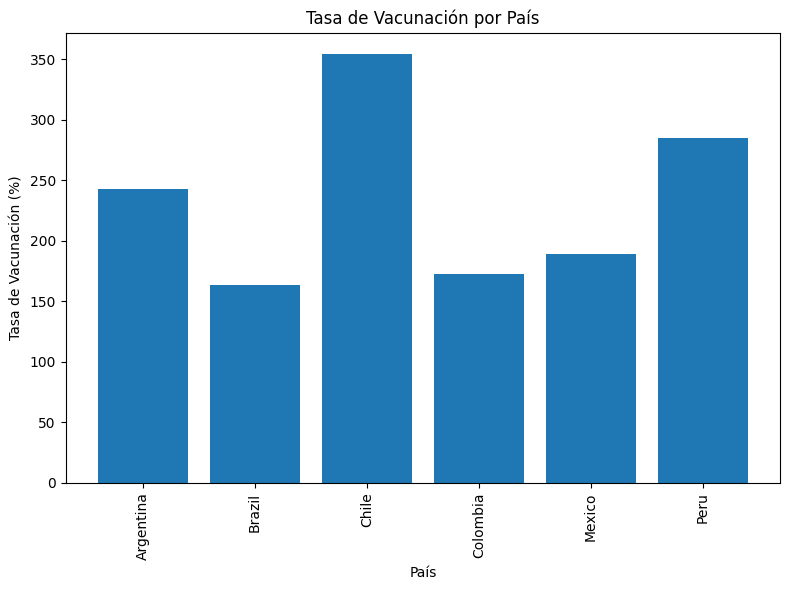

In [24]:

import matplotlib.pyplot as plt
# Visualizar los datos
# Graficar la tasa de vacunación por país
plt.figure(figsize=(8, 6))
plt.bar(merged_data['country_name'], merged_data['vaccination_rate'] * 100)   #proporciona las alturas de las barras (las tasas de vacunación), multiplicadas por 100 para convertirlas a porcentajes.
plt.xlabel('País')
plt.ylabel('Tasa de Vacunación (%)')
plt.title('Tasa de Vacunación por País')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


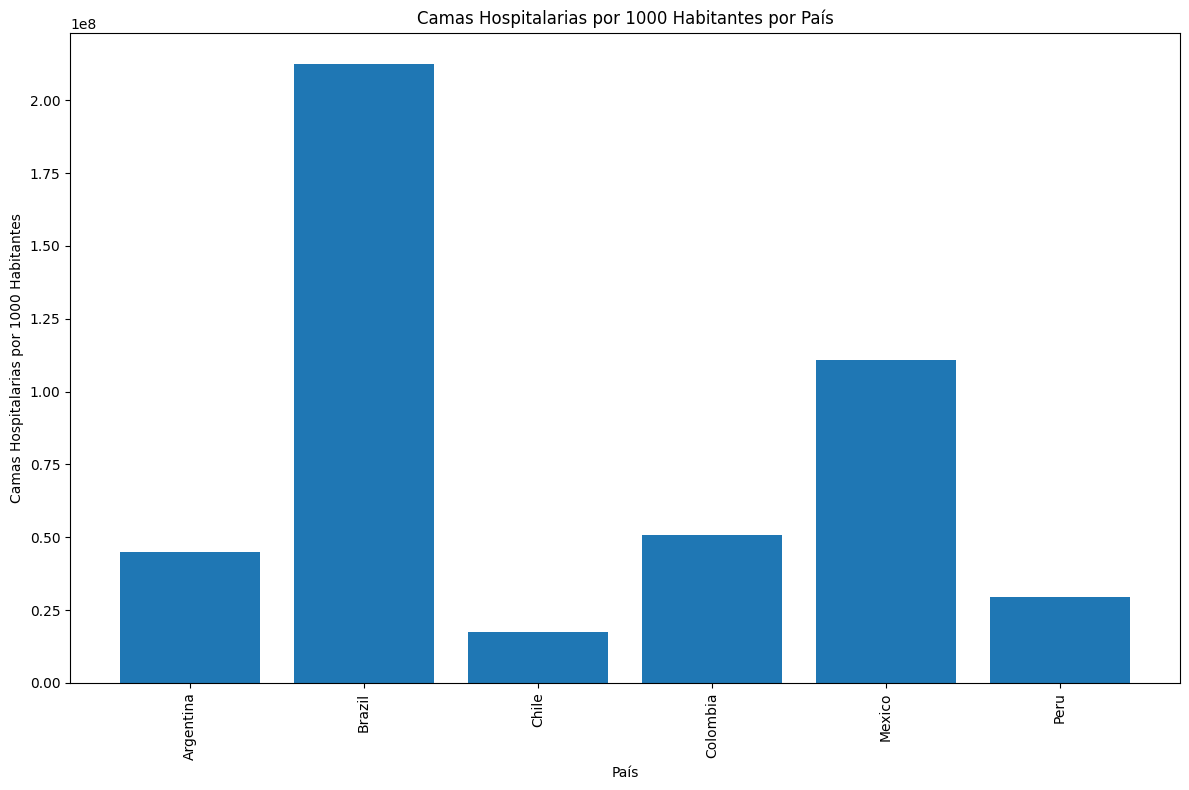

In [25]:
# Graficar el número de camas hospitalarias por país
plt.figure(figsize=(12, 8))
plt.bar(merged_data['country_name'],merged_data['population'])
plt.xlabel('País')
plt.ylabel('Camas Hospitalarias por 1000 Habitantes')
plt.title('Camas Hospitalarias por 1000 Habitantes por País')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [26]:
# Guardar el DataFrame unido en un archivo CSV
merged_data.to_csv('merged_data.csv', index=False)


In [27]:

# Asegurarse de que la columna de fechas esté en formato datetime
merged_data['date'] = pd.to_datetime(merged_data['date'])

# Ordenar los datos por fecha y pais

merged_data = merged_data.sort_values(by=['country_name', 'date'])

In [28]:
print(merged_data[merged_data['country_name'] == 'Brazil'][['country_name', 'date', 'incidences']].head(20))
print(merged_data[merged_data['country_name'] == 'Chile'][['country_name', 'date', 'incidences']].head(20))

    country_name       date  incidences
624       Brazil 2021-01-02  34568833.0
625       Brazil 2021-01-03  34568833.0
626       Brazil 2021-01-04  34568833.0
627       Brazil 2021-01-05  34568833.0
628       Brazil 2021-01-06  34568833.0
629       Brazil 2021-01-07  34568833.0
630       Brazil 2021-01-08  34568833.0
631       Brazil 2021-01-09  34568833.0
632       Brazil 2021-01-10  34568833.0
633       Brazil 2021-01-11  34568833.0
634       Brazil 2021-01-12  34568833.0
635       Brazil 2021-01-13  34568833.0
636       Brazil 2021-01-14  34568833.0
637       Brazil 2021-01-15  34568833.0
638       Brazil 2021-01-16  34568833.0
639       Brazil 2021-01-17  34568833.0
640       Brazil 2021-01-18  34568833.0
641       Brazil 2021-01-19  34568833.0
642       Brazil 2021-01-20  34568833.0
643       Brazil 2021-01-21  34568833.0
     country_name       date    incidences
1248        Chile 2021-01-02  6.079579e+06
1249        Chile 2021-01-03  6.079579e+06
1250        Chile 2021-01-04  6